In [1]:
import gym
import gym_anytrading

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = r"D:\pythonProject\Trading Environment\Dataset\Download Data - CRYPTOCURRENCY_US_COINDESK_BTCUSD.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

Date    Open    High     Low   Close
0  10/13/2022  19,163  19,501  18,271  19,382
1  10/12/2022  19,026  19,188  18,999  19,148
2  10/11/2022  19,243  19,270  18,888  19,026
3  10/10/2022  19,477  19,518  19,137  19,243
4  10/09/2022  19,461  19,558  19,278  19,477

In [4]:
df.dtypes

Date     object
Open     object
High     object
Low      object
Close    object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Open             object
High             object
Low              object
Close            object
dtype: object

In [6]:
def preprocess_data(df):
    print("Columns dtypes")
    print(df.dtypes)
    
    df['Date'] = pd.to_datetime(df['Date'])
    
    columns = ['Open', 'High', 'Low', 'Close']
    
    for column in columns:
        df[column] = df[column].apply(lambda val: remove_comma(val))
        
    return df
    

def remove_comma(value):
    if "," in value:
        value = value.replace(",", "")
        
    return float(value)


In [7]:
df1 = preprocess_data(df)

Columns dtypes
Date     datetime64[ns]
Open             object
High             object
Low              object
Close            object
dtype: object


In [8]:
df1.head()

Date     Open     High      Low    Close
0 2022-10-13  19163.0  19501.0  18271.0  19382.0
1 2022-10-12  19026.0  19188.0  18999.0  19148.0
2 2022-10-11  19243.0  19270.0  18888.0  19026.0
3 2022-10-10  19477.0  19518.0  19137.0  19243.0
4 2022-10-09  19461.0  19558.0  19278.0  19477.0

In [9]:
df1.set_index('Date', inplace=True)
df1.head()

Open     High      Low    Close
Date                                          
2022-10-13  19163.0  19501.0  18271.0  19382.0
2022-10-12  19026.0  19188.0  18999.0  19148.0
2022-10-11  19243.0  19270.0  18888.0  19026.0
2022-10-10  19477.0  19518.0  19137.0  19243.0
2022-10-09  19461.0  19558.0  19278.0  19477.0

In [10]:
df1.isnull().any()

Open     False
High     False
Low      False
Close    False
dtype: bool

In [11]:
df1.shape

(366, 4)

In [12]:
env = gym.make('stocks-v0', df=df1, frame_bound=(5,365), window_size=5)

In [13]:
env.signal_features

array([[ 1.9382e+04,  0.0000e+00],
       [ 1.9148e+04, -2.3400e+02],
       [ 1.9026e+04, -1.2200e+02],
       [ 1.9243e+04,  2.1700e+02],
       [ 1.9477e+04,  2.3400e+02],
       [ 1.9461e+04, -1.6000e+01],
       [ 1.9549e+04,  8.8000e+01],
       [ 2.0049e+04,  5.0000e+02],
       [ 2.0022e+04, -2.7000e+01],
       [ 2.0350e+04,  3.2800e+02],
       [ 1.9590e+04, -7.6000e+02],
       [ 1.9231e+04, -3.5900e+02],
       [ 1.9250e+04,  1.9000e+01],
       [ 1.9420e+04,  1.7000e+02],
       [ 1.9483e+04,  6.3000e+01],
       [ 1.9565e+04,  8.2000e+01],
       [ 1.9055e+04, -5.1000e+02],
       [ 1.9135e+04,  8.0000e+01],
       [ 1.8888e+04, -2.4700e+02],
       [ 1.9138e+04,  2.5000e+02],
       [ 1.8852e+04, -2.8600e+02],
       [ 1.9247e+04,  3.9500e+02],
       [ 1.8918e+04, -3.2900e+02],
       [ 1.8970e+04,  5.2000e+01],
       [ 1.9520e+04,  5.5000e+02],
       [ 1.9721e+04,  2.0100e+02],
       [ 2.0081e+04,  3.6000e+02],
       [ 1.9743e+04, -3.3800e+02],
       [ 1.9836e+04,

In [14]:
env.action_space


Discrete(2)

info {'total_reward': 18527.0, 'total_profit': 0.4510120741832853, 'position': 0}


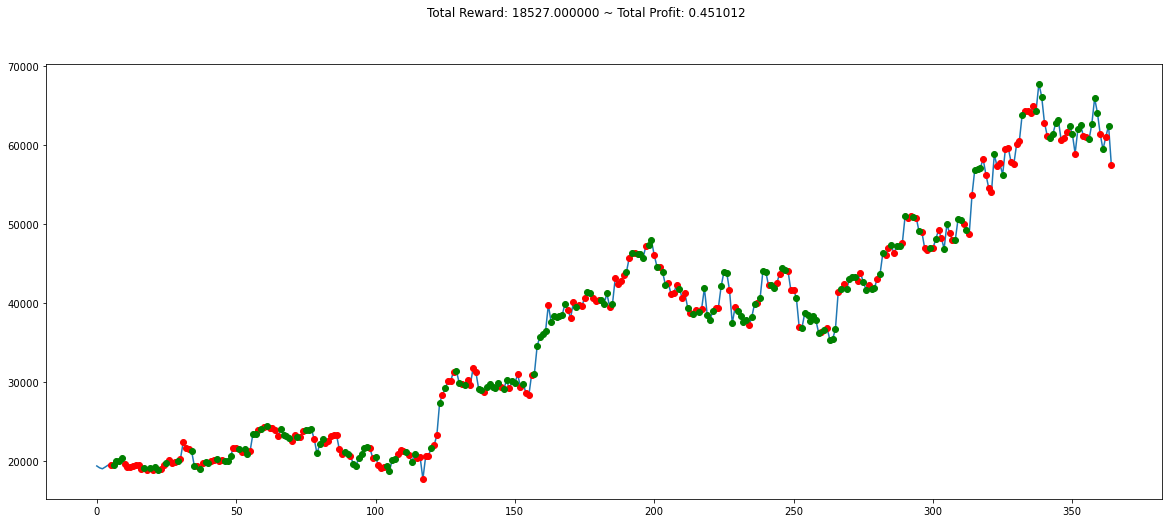

In [15]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(20,8))
plt.cla()
env.render_all()
plt.show()

A2C Model Training

In [16]:
env_maker = lambda: gym.make('stocks-v0', df=df1, frame_bound=(5,365), window_size=5)
env = DummyVecEnv([env_maker])

In [26]:
import os


model_dir = "models/A2C"
log_dir = "logs"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)


model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=log_dir)

TIMESTAMPS = 100000

for i in range(1,50):
    model.learn(total_timesteps=TIMESTAMPS, reset_num_timesteps=False, tb_log_name="A2C")
    model.save(f"{model_dir}/{TIMESTAMPS*i}")
    
env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs\A2C_0
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 437       |
| time/                 |           |
|    fps                | 724       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.692    |
|    explained_variance | -7.65e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 505       |
|    value_loss         | 8.75e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 521      |
| time/                 |          |
|    fps                | 714      |
|    iterations 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 716      |
| time/                 |          |
|    fps                | 736      |
|    iterations         | 1400     |
|    time_elapsed       | 9        |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.379   |
|    explained_variance | -0.00183 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.166   |
|    value_loss         | 9.31     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 789      |
| time/                 |          |
|    fps                | 741      |
|    iterations         | 1500     |
|    time_elapsed       | 10       |
|    total_timesteps    | 7500     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.59e+03 |
| time/                 |          |
|    fps                | 764      |
|    iterations         | 2700     |
|    time_elapsed       | 17       |
|    total_timesteps    | 13500    |
| train/                |          |
|    entropy_loss       | -0.346   |
|    explained_variance | 4.35e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2699     |
|    policy_loss        | 653      |
|    value_loss         | 2.24e+06 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.68e+03 |
| time/                 |          |
|    fps                | 765      |
|    iterations         | 2800     |
|    time_elapsed       | 18       |
|    total_timesteps    | 14000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.64e+03  |
| time/                 |           |
|    fps                | 780       |
|    iterations         | 4000      |
|    time_elapsed       | 25        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.144    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3999      |
|    policy_loss        | 87.9      |
|    value_loss         | 1.32e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.51e+03  |
| time/                 |           |
|    fps                | 781       |
|    iterations         | 4100      |
|    time_elapsed       | 26        |
|    total_timesteps    | 20500     |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.49e+03 |
| time/                 |          |
|    fps                | 790      |
|    iterations         | 5300     |
|    time_elapsed       | 33       |
|    total_timesteps    | 26500    |
| train/                |          |
|    entropy_loss       | -0.037   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 5299     |
|    policy_loss        | 4.08     |
|    value_loss         | 8.08e+05 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.52e+03 |
| time/                 |          |
|    fps                | 790      |
|    iterations         | 5400     |
|    time_elapsed       | 34       |
|    total_timesteps    | 27000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.54e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 6600     |
|    time_elapsed       | 41       |
|    total_timesteps    | 33000    |
| train/                |          |
|    entropy_loss       | -0.131   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 6599     |
|    policy_loss        | -50.3    |
|    value_loss         | 7.75e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.62e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 6700      |
|    time_elapsed       | 42        |
|    total_timesteps    | 33500     |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.45e+03 |
| time/                 |          |
|    fps                | 802      |
|    iterations         | 7900     |
|    time_elapsed       | 49       |
|    total_timesteps    | 39500    |
| train/                |          |
|    entropy_loss       | -0.0742  |
|    explained_variance | -1.47    |
|    learning_rate      | 0.0007   |
|    n_updates          | 7899     |
|    policy_loss        | -0.0388  |
|    value_loss         | 3.1      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.47e+03 |
| time/                 |          |
|    fps                | 802      |
|    iterations         | 8000     |
|    time_elapsed       | 49       |
|    total_timesteps    | 40000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.47e+03 |
| time/                 |          |
|    fps                | 805      |
|    iterations         | 9200     |
|    time_elapsed       | 57       |
|    total_timesteps    | 46000    |
| train/                |          |
|    entropy_loss       | -0.00453 |
|    explained_variance | -0.838   |
|    learning_rate      | 0.0007   |
|    n_updates          | 9199     |
|    policy_loss        | -0.00175 |
|    value_loss         | 2.89     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.47e+03 |
| time/                 |          |
|    fps                | 805      |
|    iterations         | 9300     |
|    time_elapsed       | 57       |
|    total_timesteps    | 46500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.46e+03 |
| time/                 |          |
|    fps                | 807      |
|    iterations         | 10500    |
|    time_elapsed       | 64       |
|    total_timesteps    | 52500    |
| train/                |          |
|    entropy_loss       | -0.00531 |
|    explained_variance | -0.749   |
|    learning_rate      | 0.0007   |
|    n_updates          | 10499    |
|    policy_loss        | -0.163   |
|    value_loss         | 4.13e+04 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.46e+03 |
| time/                 |          |
|    fps                | 808      |
|    iterations         | 10600    |
|    time_elapsed       | 65       |
|    total_timesteps    | 53000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.47e+03  |
| time/                 |           |
|    fps                | 809       |
|    iterations         | 11800     |
|    time_elapsed       | 72        |
|    total_timesteps    | 59000     |
| train/                |           |
|    entropy_loss       | -0.000966 |
|    explained_variance | -3.71e-05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11799     |
|    policy_loss        | 0.027     |
|    value_loss         | 9.78e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.43e+03  |
| time/                 |           |
|    fps                | 809       |
|    iterations         | 11900     |
|    time_elapsed       | 73        |
|    total_timesteps    | 59500     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.05e+03  |
| time/                 |           |
|    fps                | 809       |
|    iterations         | 13100     |
|    time_elapsed       | 80        |
|    total_timesteps    | 65500     |
| train/                |           |
|    entropy_loss       | -0.00253  |
|    explained_variance | -6.08e-06 |
|    learning_rate      | 0.0007    |
|    n_updates          | 13099     |
|    policy_loss        | -0.00754  |
|    value_loss         | 1.69e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.06e+03  |
| time/                 |           |
|    fps                | 809       |
|    iterations         | 13200     |
|    time_elapsed       | 81        |
|    total_timesteps    | 66000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.47e+03  |
| time/                 |           |
|    fps                | 810       |
|    iterations         | 14400     |
|    time_elapsed       | 88        |
|    total_timesteps    | 72000     |
| train/                |           |
|    entropy_loss       | -0.000282 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14399     |
|    policy_loss        | 0.00615   |
|    value_loss         | 3.58e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.46e+03  |
| time/                 |           |
|    fps                | 810       |
|    iterations         | 14500     |
|    time_elapsed       | 89        |
|    total_timesteps    | 72500     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.47e+03  |
| time/                 |           |
|    fps                | 811       |
|    iterations         | 15700     |
|    time_elapsed       | 96        |
|    total_timesteps    | 78500     |
| train/                |           |
|    entropy_loss       | -0.000225 |
|    explained_variance | 7.08e-05  |
|    learning_rate      | 0.0007    |
|    n_updates          | 15699     |
|    policy_loss        | -6.53e-05 |
|    value_loss         | 5.29      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.45e+03  |
| time/                 |           |
|    fps                | 811       |
|    iterations         | 15800     |
|    time_elapsed       | 97        |
|    total_timesteps    | 79000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 811       |
|    iterations         | 17000     |
|    time_elapsed       | 104       |
|    total_timesteps    | 85000     |
| train/                |           |
|    entropy_loss       | -0.00475  |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16999     |
|    policy_loss        | 0.191     |
|    value_loss         | 1.84e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 811      |
|    iterations         | 17100    |
|    time_elapsed       | 105      |
|    total_timesteps    | 85500    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 812       |
|    iterations         | 18300     |
|    time_elapsed       | 112       |
|    total_timesteps    | 91500     |
| train/                |           |
|    entropy_loss       | -0.000364 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 18299     |
|    policy_loss        | -7.95e-05 |
|    value_loss         | 6.29      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 812       |
|    iterations         | 18400     |
|    time_elapsed       | 113       |
|    total_timesteps    | 92000     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 19600     |
|    time_elapsed       | 120       |
|    total_timesteps    | 98000     |
| train/                |           |
|    entropy_loss       | -0.000195 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 19599     |
|    policy_loss        | -3.91e-05 |
|    value_loss         | 6.74      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 19700     |
|    time_elapsed       | 121       |
|    total_timesteps    | 98500     |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 900       |
|    time_elapsed       | 5         |
|    total_timesteps    | 104500    |
| train/                |           |
|    entropy_loss       | -0.000216 |
|    explained_variance | 0.207     |
|    learning_rate      | 0.0007    |
|    n_updates          | 20899     |
|    policy_loss        | 0.00572   |
|    value_loss         | 8.93e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 821       |
|    iterations         | 1000      |
|    time_elapsed       | 6         |
|    total_timesteps    | 105000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 820       |
|    iterations         | 2200      |
|    time_elapsed       | 13        |
|    total_timesteps    | 111000    |
| train/                |           |
|    entropy_loss       | -0.000212 |
|    explained_variance | 0.00868   |
|    learning_rate      | 0.0007    |
|    n_updates          | 22199     |
|    policy_loss        | 0.00107   |
|    value_loss         | 5.47e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 2300      |
|    time_elapsed       | 14        |
|    total_timesteps    | 111500    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.32e+03 |
| time/                 |          |
|    fps                | 820      |
|    iterations         | 3500     |
|    time_elapsed       | 21       |
|    total_timesteps    | 117500   |
| train/                |          |
|    entropy_loss       | -0.00255 |
|    explained_variance | 0.0135   |
|    learning_rate      | 0.0007   |
|    n_updates          | 23499    |
|    policy_loss        | 0.0203   |
|    value_loss         | 3.24e+04 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.32e+03 |
| time/                 |          |
|    fps                | 819      |
|    iterations         | 3600     |
|    time_elapsed       | 21       |
|    total_timesteps    | 118000   |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 4800      |
|    time_elapsed       | 29        |
|    total_timesteps    | 124000    |
| train/                |           |
|    entropy_loss       | -0.000149 |
|    explained_variance | 0.0112    |
|    learning_rate      | 0.0007    |
|    n_updates          | 24799     |
|    policy_loss        | -0.00072  |
|    value_loss         | 5.61e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 4900      |
|    time_elapsed       | 29        |
|    total_timesteps    | 124500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 6100      |
|    time_elapsed       | 37        |
|    total_timesteps    | 130500    |
| train/                |           |
|    entropy_loss       | -0.000118 |
|    explained_variance | 0.0126    |
|    learning_rate      | 0.0007    |
|    n_updates          | 26099     |
|    policy_loss        | -0.00056  |
|    value_loss         | 6.36e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 820       |
|    iterations         | 6200      |
|    time_elapsed       | 37        |
|    total_timesteps    | 131000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 7400      |
|    time_elapsed       | 45        |
|    total_timesteps    | 137000    |
| train/                |           |
|    entropy_loss       | -0.000162 |
|    explained_variance | -0.00388  |
|    learning_rate      | 0.0007    |
|    n_updates          | 27399     |
|    policy_loss        | 0.0088    |
|    value_loss         | 7.1e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 7500      |
|    time_elapsed       | 45        |
|    total_timesteps    | 137500    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 819      |
|    iterations         | 8700     |
|    time_elapsed       | 53       |
|    total_timesteps    | 143500   |
| train/                |          |
|    entropy_loss       | -0.00015 |
|    explained_variance | -0.00168 |
|    learning_rate      | 0.0007   |
|    n_updates          | 28699    |
|    policy_loss        | 0.00424  |
|    value_loss         | 3.61e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 8800      |
|    time_elapsed       | 53        |
|    total_timesteps    | 144000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 10000     |
|    time_elapsed       | 61        |
|    total_timesteps    | 150000    |
| train/                |           |
|    entropy_loss       | -9.05e-05 |
|    explained_variance | -0.673    |
|    learning_rate      | 0.0007    |
|    n_updates          | 29999     |
|    policy_loss        | -6.38e-05 |
|    value_loss         | 36.8      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 10100     |
|    time_elapsed       | 61        |
|    total_timesteps    | 150500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 11300     |
|    time_elapsed       | 68        |
|    total_timesteps    | 156500    |
| train/                |           |
|    entropy_loss       | -9.91e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 31299     |
|    policy_loss        | -2.36e-06 |
|    value_loss         | 33.7      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 11400     |
|    time_elapsed       | 69        |
|    total_timesteps    | 157000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 12600     |
|    time_elapsed       | 76        |
|    total_timesteps    | 163000    |
| train/                |           |
|    entropy_loss       | -2.99e-05 |
|    explained_variance | 0.357     |
|    learning_rate      | 0.0007    |
|    n_updates          | 32599     |
|    policy_loss        | -9.11e-06 |
|    value_loss         | 20.2      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 12700     |
|    time_elapsed       | 77        |
|    total_timesteps    | 163500    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 818      |
|    iterations         | 13900    |
|    time_elapsed       | 84       |
|    total_timesteps    | 169500   |
| train/                |          |
|    entropy_loss       | -3.5e-05 |
|    explained_variance | 0.00789  |
|    learning_rate      | 0.0007   |
|    n_updates          | 33899    |
|    policy_loss        | 0.000252 |
|    value_loss         | 6.98e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 14000     |
|    time_elapsed       | 85        |
|    total_timesteps    | 170000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 15200     |
|    time_elapsed       | 92        |
|    total_timesteps    | 176000    |
| train/                |           |
|    entropy_loss       | -3.39e-05 |
|    explained_variance | 0.00995   |
|    learning_rate      | 0.0007    |
|    n_updates          | 35199     |
|    policy_loss        | 0.000349  |
|    value_loss         | 5.94e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 15300     |
|    time_elapsed       | 93        |
|    total_timesteps    | 176500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 16500     |
|    time_elapsed       | 100       |
|    total_timesteps    | 182500    |
| train/                |           |
|    entropy_loss       | -4.44e-05 |
|    explained_variance | 0.0165    |
|    learning_rate      | 0.0007    |
|    n_updates          | 36499     |
|    policy_loss        | -0.000621 |
|    value_loss         | 3.45e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 16600     |
|    time_elapsed       | 101       |
|    total_timesteps    | 183000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 17800     |
|    time_elapsed       | 108       |
|    total_timesteps    | 189000    |
| train/                |           |
|    entropy_loss       | -4.4e-05  |
|    explained_variance | 0.00674   |
|    learning_rate      | 0.0007    |
|    n_updates          | 37799     |
|    policy_loss        | -0.000379 |
|    value_loss         | 2.89e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 17900     |
|    time_elapsed       | 109       |
|    total_timesteps    | 189500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 19100     |
|    time_elapsed       | 116       |
|    total_timesteps    | 195500    |
| train/                |           |
|    entropy_loss       | -4.79e-05 |
|    explained_variance | 0.000862  |
|    learning_rate      | 0.0007    |
|    n_updates          | 39099     |
|    policy_loss        | 0.00342   |
|    value_loss         | 7.24e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 19200     |
|    time_elapsed       | 117       |
|    total_timesteps    | 196000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 400       |
|    time_elapsed       | 2         |
|    total_timesteps    | 202000    |
| train/                |           |
|    entropy_loss       | -6.91e-05 |
|    explained_variance | -0.000822 |
|    learning_rate      | 0.0007    |
|    n_updates          | 40399     |
|    policy_loss        | 0.00207   |
|    value_loss         | 5.32e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 824       |
|    iterations         | 500       |
|    time_elapsed       | 3         |
|    total_timesteps    | 202500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 1700      |
|    time_elapsed       | 10        |
|    total_timesteps    | 208500    |
| train/                |           |
|    entropy_loss       | -6.43e-05 |
|    explained_variance | -0.00121  |
|    learning_rate      | 0.0007    |
|    n_updates          | 41699     |
|    policy_loss        | 0.00159   |
|    value_loss         | 1.8e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 1800      |
|    time_elapsed       | 11        |
|    total_timesteps    | 209000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 3000      |
|    time_elapsed       | 18        |
|    total_timesteps    | 215000    |
| train/                |           |
|    entropy_loss       | -4.16e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 42999     |
|    policy_loss        | -2.82e-05 |
|    value_loss         | 92.8      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 3100      |
|    time_elapsed       | 19        |
|    total_timesteps    | 215500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 4300      |
|    time_elapsed       | 26        |
|    total_timesteps    | 221500    |
| train/                |           |
|    entropy_loss       | -2.42e-05 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 44299     |
|    policy_loss        | -1.19e-05 |
|    value_loss         | 69.9      |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 816       |
|    iterations         | 4400      |
|    time_elapsed       | 26        |
|    total_timesteps    | 222000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 816       |
|    iterations         | 5600      |
|    time_elapsed       | 34        |
|    total_timesteps    | 228000    |
| train/                |           |
|    entropy_loss       | -3.01e-05 |
|    explained_variance | 0.191     |
|    learning_rate      | 0.0007    |
|    n_updates          | 45599     |
|    policy_loss        | 0.000597  |
|    value_loss         | 8.51e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 5700      |
|    time_elapsed       | 34        |
|    total_timesteps    | 228500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 6900      |
|    time_elapsed       | 42        |
|    total_timesteps    | 234500    |
| train/                |           |
|    entropy_loss       | -3.28e-05 |
|    explained_variance | 0.00975   |
|    learning_rate      | 0.0007    |
|    n_updates          | 46899     |
|    policy_loss        | 0.00016   |
|    value_loss         | 5.13e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 7000      |
|    time_elapsed       | 43        |
|    total_timesteps    | 235000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 814      |
|    iterations         | 8200     |
|    time_elapsed       | 50       |
|    total_timesteps    | 241000   |
| train/                |          |
|    entropy_loss       | -4.4e-05 |
|    explained_variance | 0.0111   |
|    learning_rate      | 0.0007   |
|    n_updates          | 48199    |
|    policy_loss        | 0.000174 |
|    value_loss         | 3.01e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 8300      |
|    time_elapsed       | 50        |
|    total_timesteps    | 241500    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 9500      |
|    time_elapsed       | 58        |
|    total_timesteps    | 247500    |
| train/                |           |
|    entropy_loss       | -4.08e-05 |
|    explained_variance | -0.00103  |
|    learning_rate      | 0.0007    |
|    n_updates          | 49499     |
|    policy_loss        | -0.000571 |
|    value_loss         | 8.32e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 9600      |
|    time_elapsed       | 58        |
|    total_timesteps    | 248000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 10800     |
|    time_elapsed       | 66        |
|    total_timesteps    | 254000    |
| train/                |           |
|    entropy_loss       | -4.32e-05 |
|    explained_variance | 0.00372   |
|    learning_rate      | 0.0007    |
|    n_updates          | 50799     |
|    policy_loss        | -0.000553 |
|    value_loss         | 5.58e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 10900     |
|    time_elapsed       | 66        |
|    total_timesteps    | 254500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 12100     |
|    time_elapsed       | 74        |
|    total_timesteps    | 260500    |
| train/                |           |
|    entropy_loss       | -6.11e-05 |
|    explained_variance | -0.00341  |
|    learning_rate      | 0.0007    |
|    n_updates          | 52099     |
|    policy_loss        | 0.00302   |
|    value_loss         | 6.98e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 12200     |
|    time_elapsed       | 74        |
|    total_timesteps    | 261000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 13400     |
|    time_elapsed       | 82        |
|    total_timesteps    | 267000    |
| train/                |           |
|    entropy_loss       | -5.83e-05 |
|    explained_variance | -0.00154  |
|    learning_rate      | 0.0007    |
|    n_updates          | 53399     |
|    policy_loss        | 0.0015    |
|    value_loss         | 3.53e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 13500     |
|    time_elapsed       | 82        |
|    total_timesteps    | 267500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 816       |
|    iterations         | 14700     |
|    time_elapsed       | 90        |
|    total_timesteps    | 273500    |
| train/                |           |
|    entropy_loss       | -3.62e-05 |
|    explained_variance | -0.21     |
|    learning_rate      | 0.0007    |
|    n_updates          | 54699     |
|    policy_loss        | -5.5e-05  |
|    value_loss         | 198       |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 816      |
|    iterations         | 14800    |
|    time_elapsed       | 90       |
|    total_timesteps    | 274000   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 816       |
|    iterations         | 16000     |
|    time_elapsed       | 97        |
|    total_timesteps    | 280000    |
| train/                |           |
|    entropy_loss       | -1.88e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 55999     |
|    policy_loss        | -1.21e-05 |
|    value_loss         | 194       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 816       |
|    iterations         | 16100     |
|    time_elapsed       | 98        |
|    total_timesteps    | 280500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 17300     |
|    time_elapsed       | 105       |
|    total_timesteps    | 286500    |
| train/                |           |
|    entropy_loss       | -2.49e-05 |
|    explained_variance | 0.174     |
|    learning_rate      | 0.0007    |
|    n_updates          | 57299     |
|    policy_loss        | -2.41e-05 |
|    value_loss         | 161       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 17400     |
|    time_elapsed       | 106       |
|    total_timesteps    | 287000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 817      |
|    iterations         | 18600    |
|    time_elapsed       | 113      |
|    total_timesteps    | 293000   |
| train/                |          |
|    entropy_loss       | -2.7e-05 |
|    explained_variance | 0.00805  |
|    learning_rate      | 0.0007   |
|    n_updates          | 58599    |
|    policy_loss        | 0.000131 |
|    value_loss         | 6.58e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 18700     |
|    time_elapsed       | 114       |
|    total_timesteps    | 293500    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 19900     |
|    time_elapsed       | 121       |
|    total_timesteps    | 299500    |
| train/                |           |
|    entropy_loss       | -2.67e-05 |
|    explained_variance | 0.01      |
|    learning_rate      | 0.0007    |
|    n_updates          | 59899     |
|    policy_loss        | 0.000219  |
|    value_loss         | 5.57e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 20000     |
|    time_elapsed       | 122       |
|    total_timesteps    | 300000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 1200      |
|    time_elapsed       | 7         |
|    total_timesteps    | 306000    |
| train/                |           |
|    entropy_loss       | -4.04e-05 |
|    explained_variance | 0.016     |
|    learning_rate      | 0.0007    |
|    n_updates          | 61199     |
|    policy_loss        | -0.00133  |
|    value_loss         | 1.87e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 823       |
|    iterations         | 1300      |
|    time_elapsed       | 7         |
|    total_timesteps    | 306500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 2500      |
|    time_elapsed       | 15        |
|    total_timesteps    | 312500    |
| train/                |           |
|    entropy_loss       | -4e-05    |
|    explained_variance | 0.0023    |
|    learning_rate      | 0.0007    |
|    n_updates          | 62499     |
|    policy_loss        | -0.000719 |
|    value_loss         | 1.31e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 2600      |
|    time_elapsed       | 15        |
|    total_timesteps    | 313000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 3800      |
|    time_elapsed       | 23        |
|    total_timesteps    | 319000    |
| train/                |           |
|    entropy_loss       | -4.23e-05 |
|    explained_variance | 0.000715  |
|    learning_rate      | 0.0007    |
|    n_updates          | 63799     |
|    policy_loss        | 0.00295   |
|    value_loss         | 7.53e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 3900      |
|    time_elapsed       | 23        |
|    total_timesteps    | 319500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 5100      |
|    time_elapsed       | 31        |
|    total_timesteps    | 325500    |
| train/                |           |
|    entropy_loss       | -6.14e-05 |
|    explained_variance | -0.000838 |
|    learning_rate      | 0.0007    |
|    n_updates          | 65099     |
|    policy_loss        | 0.00159   |
|    value_loss         | 5.2e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 5200      |
|    time_elapsed       | 31        |
|    total_timesteps    | 326000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 6400      |
|    time_elapsed       | 38        |
|    total_timesteps    | 332000    |
| train/                |           |
|    entropy_loss       | -5.67e-05 |
|    explained_variance | -0.00125  |
|    learning_rate      | 0.0007    |
|    n_updates          | 66399     |
|    policy_loss        | 0.00128   |
|    value_loss         | 1.75e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 6500      |
|    time_elapsed       | 39        |
|    total_timesteps    | 332500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 7700      |
|    time_elapsed       | 46        |
|    total_timesteps    | 338500    |
| train/                |           |
|    entropy_loss       | -3.65e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 67699     |
|    policy_loss        | -4.61e-05 |
|    value_loss         | 318       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 7800      |
|    time_elapsed       | 47        |
|    total_timesteps    | 339000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 9000      |
|    time_elapsed       | 54        |
|    total_timesteps    | 345000    |
| train/                |           |
|    entropy_loss       | -2.04e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 68999     |
|    policy_loss        | -2.03e-05 |
|    value_loss         | 274       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 9100      |
|    time_elapsed       | 55        |
|    total_timesteps    | 345500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 10300     |
|    time_elapsed       | 62        |
|    total_timesteps    | 351500    |
| train/                |           |
|    entropy_loss       | -2.42e-05 |
|    explained_variance | 0.142     |
|    learning_rate      | 0.0007    |
|    n_updates          | 70299     |
|    policy_loss        | 0.000496  |
|    value_loss         | 8.08e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 10400     |
|    time_elapsed       | 63        |
|    total_timesteps    | 352000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 822      |
|    iterations         | 11600    |
|    time_elapsed       | 70       |
|    total_timesteps    | 358000   |
| train/                |          |
|    entropy_loss       | -2.6e-05 |
|    explained_variance | 0.0103   |
|    learning_rate      | 0.0007   |
|    n_updates          | 71599    |
|    policy_loss        | 0.00012  |
|    value_loss         | 4.79e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 11700     |
|    time_elapsed       | 71        |
|    total_timesteps    | 358500    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 12900     |
|    time_elapsed       | 78        |
|    total_timesteps    | 364500    |
| train/                |           |
|    entropy_loss       | -3.71e-05 |
|    explained_variance | 0.0118    |
|    learning_rate      | 0.0007    |
|    n_updates          | 72899     |
|    policy_loss        | 0.000103  |
|    value_loss         | 2.77e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 13000     |
|    time_elapsed       | 79        |
|    total_timesteps    | 365000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 14200     |
|    time_elapsed       | 86        |
|    total_timesteps    | 371000    |
| train/                |           |
|    entropy_loss       | -3.47e-05 |
|    explained_variance | -0.00111  |
|    learning_rate      | 0.0007    |
|    n_updates          | 74199     |
|    policy_loss        | -0.000817 |
|    value_loss         | 2.64e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 822      |
|    iterations         | 14300    |
|    time_elapsed       | 86       |
|    total_timesteps    | 371500   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 15500     |
|    time_elapsed       | 94        |
|    total_timesteps    | 377500    |
| train/                |           |
|    entropy_loss       | -3.57e-05 |
|    explained_variance | 0.00229   |
|    learning_rate      | 0.0007    |
|    n_updates          | 75499     |
|    policy_loss        | -0.000803 |
|    value_loss         | 1.57e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 15600     |
|    time_elapsed       | 94        |
|    total_timesteps    | 378000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.2e+03   |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 16800     |
|    time_elapsed       | 102       |
|    total_timesteps    | 384000    |
| train/                |           |
|    entropy_loss       | -4.93e-05 |
|    explained_variance | -0.0261   |
|    learning_rate      | 0.0007    |
|    n_updates          | 76799     |
|    policy_loss        | 0.00365   |
|    value_loss         | 6.81e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.2e+03   |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 16900     |
|    time_elapsed       | 102       |
|    total_timesteps    | 384500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 18100     |
|    time_elapsed       | 110       |
|    total_timesteps    | 390500    |
| train/                |           |
|    entropy_loss       | -2.81e-05 |
|    explained_variance | -0.00169  |
|    learning_rate      | 0.0007    |
|    n_updates          | 78099     |
|    policy_loss        | 0.00105   |
|    value_loss         | 3.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 18200     |
|    time_elapsed       | 110       |
|    total_timesteps    | 391000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 19400     |
|    time_elapsed       | 117       |
|    total_timesteps    | 397000    |
| train/                |           |
|    entropy_loss       | -2.64e-05 |
|    explained_variance | -0.131    |
|    learning_rate      | 0.0007    |
|    n_updates          | 79399     |
|    policy_loss        | -5.83e-05 |
|    value_loss         | 505       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 822       |
|    iterations         | 19500     |
|    time_elapsed       | 118       |
|    total_timesteps    | 397500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 820       |
|    iterations         | 700       |
|    time_elapsed       | 4         |
|    total_timesteps    | 403500    |
| train/                |           |
|    entropy_loss       | -1.71e-05 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 80699     |
|    policy_loss        | -1.81e-05 |
|    value_loss         | 497       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 819       |
|    iterations         | 800       |
|    time_elapsed       | 4         |
|    total_timesteps    | 404000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 818       |
|    iterations         | 2000      |
|    time_elapsed       | 12        |
|    total_timesteps    | 410000    |
| train/                |           |
|    entropy_loss       | -2.46e-05 |
|    explained_variance | 0.119     |
|    learning_rate      | 0.0007    |
|    n_updates          | 81999     |
|    policy_loss        | -3.99e-05 |
|    value_loss         | 441       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 817       |
|    iterations         | 2100      |
|    time_elapsed       | 12        |
|    total_timesteps    | 410500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 3300      |
|    time_elapsed       | 20        |
|    total_timesteps    | 416500    |
| train/                |           |
|    entropy_loss       | -2.67e-05 |
|    explained_variance | 0.00897   |
|    learning_rate      | 0.0007    |
|    n_updates          | 83299     |
|    policy_loss        | 0.000123  |
|    value_loss         | 6.18e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 3400      |
|    time_elapsed       | 20        |
|    total_timesteps    | 417000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 4600      |
|    time_elapsed       | 28        |
|    total_timesteps    | 423000    |
| train/                |           |
|    entropy_loss       | -2.69e-05 |
|    explained_variance | 0.0109    |
|    learning_rate      | 0.0007    |
|    n_updates          | 84599     |
|    policy_loss        | 0.000203  |
|    value_loss         | 5.2e+04   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 813      |
|    iterations         | 4700     |
|    time_elapsed       | 28       |
|    total_timesteps    | 423500   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 5900      |
|    time_elapsed       | 36        |
|    total_timesteps    | 429500    |
| train/                |           |
|    entropy_loss       | -4.24e-05 |
|    explained_variance | 0.0168    |
|    learning_rate      | 0.0007    |
|    n_updates          | 85899     |
|    policy_loss        | -0.00226  |
|    value_loss         | 4.77e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 6000      |
|    time_elapsed       | 36        |
|    total_timesteps    | 430000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 7200      |
|    time_elapsed       | 44        |
|    total_timesteps    | 436000    |
| train/                |           |
|    entropy_loss       | -4.18e-05 |
|    explained_variance | 0.00137   |
|    learning_rate      | 0.0007    |
|    n_updates          | 87199     |
|    policy_loss        | -0.00117  |
|    value_loss         | 3.17e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 7300      |
|    time_elapsed       | 44        |
|    total_timesteps    | 436500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 8500      |
|    time_elapsed       | 52        |
|    total_timesteps    | 442500    |
| train/                |           |
|    entropy_loss       | -4.35e-05 |
|    explained_variance | 0.000645  |
|    learning_rate      | 0.0007    |
|    n_updates          | 88499     |
|    policy_loss        | 0.00311   |
|    value_loss         | 8.1e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 8600      |
|    time_elapsed       | 52        |
|    total_timesteps    | 443000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 9800      |
|    time_elapsed       | 60        |
|    total_timesteps    | 449000    |
| train/                |           |
|    entropy_loss       | -6.17e-05 |
|    explained_variance | -0.000912 |
|    learning_rate      | 0.0007    |
|    n_updates          | 89799     |
|    policy_loss        | 0.00166   |
|    value_loss         | 5.09e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 9900      |
|    time_elapsed       | 60        |
|    total_timesteps    | 449500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 11100     |
|    time_elapsed       | 68        |
|    total_timesteps    | 455500    |
| train/                |           |
|    entropy_loss       | -5.62e-05 |
|    explained_variance | -0.00137  |
|    learning_rate      | 0.0007    |
|    n_updates          | 91099     |
|    policy_loss        | 0.00124   |
|    value_loss         | 1.71e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 11200     |
|    time_elapsed       | 68        |
|    total_timesteps    | 456000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 12400     |
|    time_elapsed       | 76        |
|    total_timesteps    | 462000    |
| train/                |           |
|    entropy_loss       | -3.61e-05 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 92399     |
|    policy_loss        | -6.82e-05 |
|    value_loss         | 697       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 12500     |
|    time_elapsed       | 76        |
|    total_timesteps    | 462500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 13700     |
|    time_elapsed       | 84        |
|    total_timesteps    | 468500    |
| train/                |           |
|    entropy_loss       | -2e-05    |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 93699     |
|    policy_loss        | -3.04e-05 |
|    value_loss         | 625       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 13800     |
|    time_elapsed       | 84        |
|    total_timesteps    | 469000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 15000     |
|    time_elapsed       | 92        |
|    total_timesteps    | 475000    |
| train/                |           |
|    entropy_loss       | -2.35e-05 |
|    explained_variance | 0.118     |
|    learning_rate      | 0.0007    |
|    n_updates          | 94999     |
|    policy_loss        | 0.000476  |
|    value_loss         | 7.65e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 15100     |
|    time_elapsed       | 92        |
|    total_timesteps    | 475500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 16300     |
|    time_elapsed       | 99        |
|    total_timesteps    | 481500    |
| train/                |           |
|    entropy_loss       | -2.52e-05 |
|    explained_variance | 0.0114    |
|    learning_rate      | 0.0007    |
|    n_updates          | 96299     |
|    policy_loss        | 0.000109  |
|    value_loss         | 4.45e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 815       |
|    iterations         | 16400     |
|    time_elapsed       | 100       |
|    total_timesteps    | 482000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 17600     |
|    time_elapsed       | 108       |
|    total_timesteps    | 488000    |
| train/                |           |
|    entropy_loss       | -3.62e-05 |
|    explained_variance | 0.0131    |
|    learning_rate      | 0.0007    |
|    n_updates          | 97599     |
|    policy_loss        | 8.47e-05  |
|    value_loss         | 2.53e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 814       |
|    iterations         | 17700     |
|    time_elapsed       | 108       |
|    total_timesteps    | 488500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 813       |
|    iterations         | 18900     |
|    time_elapsed       | 116       |
|    total_timesteps    | 494500    |
| train/                |           |
|    entropy_loss       | -3.4e-05  |
|    explained_variance | -0.000968 |
|    learning_rate      | 0.0007    |
|    n_updates          | 98899     |
|    policy_loss        | -0.00117  |
|    value_loss         | 5.64e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 813      |
|    iterations         | 19000    |
|    time_elapsed       | 116      |
|    total_timesteps    | 495000   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 798       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 501000    |
| train/                |           |
|    entropy_loss       | -3.45e-05 |
|    explained_variance | 0.00173   |
|    learning_rate      | 0.0007    |
|    n_updates          | 100199    |
|    policy_loss        | -0.00106  |
|    value_loss         | 3.19e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 801       |
|    iterations         | 300       |
|    time_elapsed       | 1         |
|    total_timesteps    | 501500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 798       |
|    iterations         | 1500      |
|    time_elapsed       | 9         |
|    total_timesteps    | 507500    |
| train/                |           |
|    entropy_loss       | -4.88e-05 |
|    explained_variance | -0.00389  |
|    learning_rate      | 0.0007    |
|    n_updates          | 101499    |
|    policy_loss        | 0.00226   |
|    value_loss         | 6.71e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 1600      |
|    time_elapsed       | 10        |
|    total_timesteps    | 508000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 2800      |
|    time_elapsed       | 17        |
|    total_timesteps    | 514000    |
| train/                |           |
|    entropy_loss       | -4.68e-05 |
|    explained_variance | -0.00177  |
|    learning_rate      | 0.0007    |
|    n_updates          | 102799    |
|    policy_loss        | 0.00109   |
|    value_loss         | 3.36e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 2900      |
|    time_elapsed       | 18        |
|    total_timesteps    | 514500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 709       |
|    iterations         | 4100      |
|    time_elapsed       | 28        |
|    total_timesteps    | 520500    |
| train/                |           |
|    entropy_loss       | -2.85e-05 |
|    explained_variance | -0.0995   |
|    learning_rate      | 0.0007    |
|    n_updates          | 104099    |
|    policy_loss        | -8.92e-05 |
|    value_loss         | 977       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 705       |
|    iterations         | 4200      |
|    time_elapsed       | 29        |
|    total_timesteps    | 521000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 694       |
|    iterations         | 5400      |
|    time_elapsed       | 38        |
|    total_timesteps    | 527000    |
| train/                |           |
|    entropy_loss       | -1.42e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 105399    |
|    policy_loss        | -1.99e-05 |
|    value_loss         | 965       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 695       |
|    iterations         | 5500      |
|    time_elapsed       | 39        |
|    total_timesteps    | 527500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 662       |
|    iterations         | 6700      |
|    time_elapsed       | 50        |
|    total_timesteps    | 533500    |
| train/                |           |
|    entropy_loss       | -1.84e-05 |
|    explained_variance | 0.0945    |
|    learning_rate      | 0.0007    |
|    n_updates          | 106699    |
|    policy_loss        | -4.01e-05 |
|    value_loss         | 879       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 660       |
|    iterations         | 6800      |
|    time_elapsed       | 51        |
|    total_timesteps    | 534000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 649       |
|    iterations         | 8000      |
|    time_elapsed       | 61        |
|    total_timesteps    | 540000    |
| train/                |           |
|    entropy_loss       | -1.93e-05 |
|    explained_variance | 0.0104    |
|    learning_rate      | 0.0007    |
|    n_updates          | 107999    |
|    policy_loss        | 6.82e-05  |
|    value_loss         | 5.78e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 649       |
|    iterations         | 8100      |
|    time_elapsed       | 62        |
|    total_timesteps    | 540500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 647       |
|    iterations         | 9300      |
|    time_elapsed       | 71        |
|    total_timesteps    | 546500    |
| train/                |           |
|    entropy_loss       | -1.89e-05 |
|    explained_variance | 0.0122    |
|    learning_rate      | 0.0007    |
|    n_updates          | 109299    |
|    policy_loss        | 0.000119  |
|    value_loss         | 4.83e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 648       |
|    iterations         | 9400      |
|    time_elapsed       | 72        |
|    total_timesteps    | 547000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 653       |
|    iterations         | 10600     |
|    time_elapsed       | 81        |
|    total_timesteps    | 553000    |
| train/                |           |
|    entropy_loss       | -2.84e-05 |
|    explained_variance | 0.0183    |
|    learning_rate      | 0.0007    |
|    n_updates          | 110599    |
|    policy_loss        | -0.00194  |
|    value_loss         | 9.26e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 653       |
|    iterations         | 10700     |
|    time_elapsed       | 81        |
|    total_timesteps    | 553500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 656       |
|    iterations         | 11900     |
|    time_elapsed       | 90        |
|    total_timesteps    | 559500    |
| train/                |           |
|    entropy_loss       | -2.71e-05 |
|    explained_variance | 0.00101   |
|    learning_rate      | 0.0007    |
|    n_updates          | 111899    |
|    policy_loss        | -0.000998 |
|    value_loss         | 5.98e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 656       |
|    iterations         | 12000     |
|    time_elapsed       | 91        |
|    total_timesteps    | 560000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 651      |
|    iterations         | 13200    |
|    time_elapsed       | 101      |
|    total_timesteps    | 566000   |
| train/                |          |
|    entropy_loss       | -2.9e-05 |
|    explained_variance | 0.000611 |
|    learning_rate      | 0.0007   |
|    n_updates          | 113199   |
|    policy_loss        | 0.00194  |
|    value_loss         | 8.99e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 650       |
|    iterations         | 13300     |
|    time_elapsed       | 102       |
|    total_timesteps    | 566500    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 644       |
|    iterations         | 14500     |
|    time_elapsed       | 112       |
|    total_timesteps    | 572500    |
| train/                |           |
|    entropy_loss       | -4.15e-05 |
|    explained_variance | -0.00103  |
|    learning_rate      | 0.0007    |
|    n_updates          | 114499    |
|    policy_loss        | 0.00103   |
|    value_loss         | 4.97e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 644       |
|    iterations         | 14600     |
|    time_elapsed       | 113       |
|    total_timesteps    | 573000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 647      |
|    iterations         | 15800    |
|    time_elapsed       | 121      |
|    total_timesteps    | 579000   |
| train/                |          |
|    entropy_loss       | -3.8e-05 |
|    explained_variance | -0.00155 |
|    learning_rate      | 0.0007   |
|    n_updates          | 115799   |
|    policy_loss        | 0.000795 |
|    value_loss         | 1.66e+05 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 648      |
|    iterations         | 15900    |
|    time_elapsed       | 122      |
|    total_timesteps    | 579500   |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 645       |
|    iterations         | 17100     |
|    time_elapsed       | 132       |
|    total_timesteps    | 585500    |
| train/                |           |
|    entropy_loss       | -2.49e-05 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 117099    |
|    policy_loss        | -6.1e-05  |
|    value_loss         | 1.25e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 645       |
|    iterations         | 17200     |
|    time_elapsed       | 133       |
|    total_timesteps    | 586000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 648       |
|    iterations         | 18400     |
|    time_elapsed       | 141       |
|    total_timesteps    | 592000    |
| train/                |           |
|    entropy_loss       | -1.47e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 118399    |
|    policy_loss        | -2.98e-05 |
|    value_loss         | 1.15e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 648      |
|    iterations         | 18500    |
|    time_elapsed       | 142      |
|    total_timesteps    | 592500   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 650       |
|    iterations         | 19700     |
|    time_elapsed       | 151       |
|    total_timesteps    | 598500    |
| train/                |           |
|    entropy_loss       | -1.76e-05 |
|    explained_variance | 0.106     |
|    learning_rate      | 0.0007    |
|    n_updates          | 119699    |
|    policy_loss        | 0.000282  |
|    value_loss         | 7.21e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 650       |
|    iterations         | 19800     |
|    time_elapsed       | 152       |
|    total_timesteps    | 599000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 683       |
|    iterations         | 1000      |
|    time_elapsed       | 7         |
|    total_timesteps    | 605000    |
| train/                |           |
|    entropy_loss       | -1.95e-05 |
|    explained_variance | 0.0131    |
|    learning_rate      | 0.0007    |
|    n_updates          | 120999    |
|    policy_loss        | 5.49e-05  |
|    value_loss         | 4.11e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 672       |
|    iterations         | 1100      |
|    time_elapsed       | 8         |
|    total_timesteps    | 605500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 651       |
|    iterations         | 2300      |
|    time_elapsed       | 17        |
|    total_timesteps    | 611500    |
| train/                |           |
|    entropy_loss       | -2.81e-05 |
|    explained_variance | 0.0151    |
|    learning_rate      | 0.0007    |
|    n_updates          | 122299    |
|    policy_loss        | 5.86e-05  |
|    value_loss         | 2.3e+04   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 652       |
|    iterations         | 2400      |
|    time_elapsed       | 18        |
|    total_timesteps    | 612000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 662       |
|    iterations         | 3600      |
|    time_elapsed       | 27        |
|    total_timesteps    | 618000    |
| train/                |           |
|    entropy_loss       | -2.71e-05 |
|    explained_variance | -0.000879 |
|    learning_rate      | 0.0007    |
|    n_updates          | 123599    |
|    policy_loss        | -0.00122  |
|    value_loss         | 1e+06     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 662       |
|    iterations         | 3700      |
|    time_elapsed       | 27        |
|    total_timesteps    | 618500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 666       |
|    iterations         | 4900      |
|    time_elapsed       | 36        |
|    total_timesteps    | 624500    |
| train/                |           |
|    entropy_loss       | -2.82e-05 |
|    explained_variance | 0.00147   |
|    learning_rate      | 0.0007    |
|    n_updates          | 124899    |
|    policy_loss        | -0.00116  |
|    value_loss         | 5.52e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 667       |
|    iterations         | 5000      |
|    time_elapsed       | 37        |
|    total_timesteps    | 625000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 671       |
|    iterations         | 6200      |
|    time_elapsed       | 46        |
|    total_timesteps    | 631000    |
| train/                |           |
|    entropy_loss       | -4.08e-05 |
|    explained_variance | -0.0044   |
|    learning_rate      | 0.0007    |
|    n_updates          | 126199    |
|    policy_loss        | 0.0018    |
|    value_loss         | 6.57e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 670       |
|    iterations         | 6300      |
|    time_elapsed       | 46        |
|    total_timesteps    | 631500    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 673      |
|    iterations         | 7500     |
|    time_elapsed       | 55       |
|    total_timesteps    | 637500   |
| train/                |          |
|    entropy_loss       | -4e-05   |
|    explained_variance | -0.00202 |
|    learning_rate      | 0.0007   |
|    n_updates          | 127499   |
|    policy_loss        | 0.000898 |
|    value_loss         | 3.27e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 672       |
|    iterations         | 7600      |
|    time_elapsed       | 56        |
|    total_timesteps    | 638000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 8800      |
|    time_elapsed       | 65        |
|    total_timesteps    | 644000    |
| train/                |           |
|    entropy_loss       | -2.53e-05 |
|    explained_variance | -0.0855   |
|    learning_rate      | 0.0007    |
|    n_updates          | 128799    |
|    policy_loss        | -0.000105 |
|    value_loss         | 1.65e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 8900      |
|    time_elapsed       | 65        |
|    total_timesteps    | 644500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 675       |
|    iterations         | 10100     |
|    time_elapsed       | 74        |
|    total_timesteps    | 650500    |
| train/                |           |
|    entropy_loss       | -1.28e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 130099    |
|    policy_loss        | -2.35e-05 |
|    value_loss         | 1.63e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 675       |
|    iterations         | 10200     |
|    time_elapsed       | 75        |
|    total_timesteps    | 651000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 11400     |
|    time_elapsed       | 84        |
|    total_timesteps    | 657000    |
| train/                |           |
|    entropy_loss       | -1.63e-05 |
|    explained_variance | 0.0829    |
|    learning_rate      | 0.0007    |
|    n_updates          | 131399    |
|    policy_loss        | -4.8e-05  |
|    value_loss         | 1.5e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 11500     |
|    time_elapsed       | 85        |
|    total_timesteps    | 657500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 12700     |
|    time_elapsed       | 93        |
|    total_timesteps    | 663500    |
| train/                |           |
|    entropy_loss       | -1.71e-05 |
|    explained_variance | 0.0126    |
|    learning_rate      | 0.0007    |
|    n_updates          | 132699    |
|    policy_loss        | 3.72e-05  |
|    value_loss         | 5.36e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 677       |
|    iterations         | 12800     |
|    time_elapsed       | 94        |
|    total_timesteps    | 664000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 673       |
|    iterations         | 14000     |
|    time_elapsed       | 103       |
|    total_timesteps    | 670000    |
| train/                |           |
|    entropy_loss       | -1.71e-05 |
|    explained_variance | 0.0144    |
|    learning_rate      | 0.0007    |
|    n_updates          | 133999    |
|    policy_loss        | 0.000108  |
|    value_loss         | 4.44e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 673       |
|    iterations         | 14100     |
|    time_elapsed       | 104       |
|    total_timesteps    | 670500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 15300     |
|    time_elapsed       | 113       |
|    total_timesteps    | 676500    |
| train/                |           |
|    entropy_loss       | -2.71e-05 |
|    explained_variance | 0.0209    |
|    learning_rate      | 0.0007    |
|    n_updates          | 135299    |
|    policy_loss        | -0.00252  |
|    value_loss         | 1.57e+06  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 674      |
|    iterations         | 15400    |
|    time_elapsed       | 114      |
|    total_timesteps    | 677000   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 675       |
|    iterations         | 16600     |
|    time_elapsed       | 122       |
|    total_timesteps    | 683000    |
| train/                |           |
|    entropy_loss       | -2.64e-05 |
|    explained_variance | 0.000851  |
|    learning_rate      | 0.0007    |
|    n_updates          | 136599    |
|    policy_loss        | -0.00128  |
|    value_loss         | 9.98e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 675       |
|    iterations         | 16700     |
|    time_elapsed       | 123       |
|    total_timesteps    | 683500    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 676      |
|    iterations         | 17900    |
|    time_elapsed       | 132      |
|    total_timesteps    | 689500   |
| train/                |          |
|    entropy_loss       | -2.8e-05 |
|    explained_variance | 0.000615 |
|    learning_rate      | 0.0007   |
|    n_updates          | 137899   |
|    policy_loss        | 0.00184  |
|    value_loss         | 1.03e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 18000     |
|    time_elapsed       | 133       |
|    total_timesteps    | 690000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 677       |
|    iterations         | 19200     |
|    time_elapsed       | 141       |
|    total_timesteps    | 696000    |
| train/                |           |
|    entropy_loss       | -4.08e-05 |
|    explained_variance | -0.00123  |
|    learning_rate      | 0.0007    |
|    n_updates          | 139199    |
|    policy_loss        | 0.00101   |
|    value_loss         | 4.85e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 677       |
|    iterations         | 19300     |
|    time_elapsed       | 142       |
|    total_timesteps    | 696500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 692       |
|    iterations         | 500       |
|    time_elapsed       | 3         |
|    total_timesteps    | 702500    |
| train/                |           |
|    entropy_loss       | -3.83e-05 |
|    explained_variance | -0.00184  |
|    learning_rate      | 0.0007    |
|    n_updates          | 140499    |
|    policy_loss        | 0.000761  |
|    value_loss         | 1.61e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 692       |
|    iterations         | 600       |
|    time_elapsed       | 4         |
|    total_timesteps    | 703000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 686       |
|    iterations         | 1800      |
|    time_elapsed       | 13        |
|    total_timesteps    | 709000    |
| train/                |           |
|    entropy_loss       | -2.53e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 141799    |
|    policy_loss        | -7.76e-05 |
|    value_loss         | 2.03e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 687      |
|    iterations         | 1900     |
|    time_elapsed       | 13       |
|    total_timesteps    | 709500   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 689       |
|    iterations         | 3100      |
|    time_elapsed       | 22        |
|    total_timesteps    | 715500    |
| train/                |           |
|    entropy_loss       | -1.43e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 143099    |
|    policy_loss        | -3.81e-05 |
|    value_loss         | 1.87e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 689       |
|    iterations         | 3200      |
|    time_elapsed       | 23        |
|    total_timesteps    | 716000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 4400      |
|    time_elapsed       | 31        |
|    total_timesteps    | 722000    |
| train/                |           |
|    entropy_loss       | -1.65e-05 |
|    explained_variance | 0.103     |
|    learning_rate      | 0.0007    |
|    n_updates          | 144399    |
|    policy_loss        | 0.000267  |
|    value_loss         | 6.75e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 4500      |
|    time_elapsed       | 32        |
|    total_timesteps    | 722500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 5700      |
|    time_elapsed       | 41        |
|    total_timesteps    | 728500    |
| train/                |           |
|    entropy_loss       | -1.78e-05 |
|    explained_variance | 0.016     |
|    learning_rate      | 0.0007    |
|    n_updates          | 145699    |
|    policy_loss        | 2.08e-05  |
|    value_loss         | 3.76e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 689       |
|    iterations         | 5800      |
|    time_elapsed       | 42        |
|    total_timesteps    | 729000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 7000      |
|    time_elapsed       | 50        |
|    total_timesteps    | 735000    |
| train/                |           |
|    entropy_loss       | -2.75e-05 |
|    explained_variance | 0.0184    |
|    learning_rate      | 0.0007    |
|    n_updates          | 146999    |
|    policy_loss        | 1.22e-05  |
|    value_loss         | 2.06e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 687       |
|    iterations         | 7100      |
|    time_elapsed       | 51        |
|    total_timesteps    | 735500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 8300      |
|    time_elapsed       | 60        |
|    total_timesteps    | 741500    |
| train/                |           |
|    entropy_loss       | -2.65e-05 |
|    explained_variance | -0.000865 |
|    learning_rate      | 0.0007    |
|    n_updates          | 148299    |
|    policy_loss        | -0.00154  |
|    value_loss         | 1.62e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 8400      |
|    time_elapsed       | 61        |
|    total_timesteps    | 742000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 681       |
|    iterations         | 9600      |
|    time_elapsed       | 70        |
|    total_timesteps    | 748000    |
| train/                |           |
|    entropy_loss       | -2.73e-05 |
|    explained_variance | 0.00139   |
|    learning_rate      | 0.0007    |
|    n_updates          | 149599    |
|    policy_loss        | -0.00145  |
|    value_loss         | 8.74e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 681       |
|    iterations         | 9700      |
|    time_elapsed       | 71        |
|    total_timesteps    | 748500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 683       |
|    iterations         | 10900     |
|    time_elapsed       | 79        |
|    total_timesteps    | 754500    |
| train/                |           |
|    entropy_loss       | -3.96e-05 |
|    explained_variance | -0.00536  |
|    learning_rate      | 0.0007    |
|    n_updates          | 150899    |
|    policy_loss        | 0.00178   |
|    value_loss         | 6.42e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 683       |
|    iterations         | 11000     |
|    time_elapsed       | 80        |
|    total_timesteps    | 755000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 685       |
|    iterations         | 12200     |
|    time_elapsed       | 88        |
|    total_timesteps    | 761000    |
| train/                |           |
|    entropy_loss       | -3.87e-05 |
|    explained_variance | -0.00247  |
|    learning_rate      | 0.0007    |
|    n_updates          | 152199    |
|    policy_loss        | 0.00087   |
|    value_loss         | 3.18e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 684       |
|    iterations         | 12300     |
|    time_elapsed       | 89        |
|    total_timesteps    | 761500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 682       |
|    iterations         | 13500     |
|    time_elapsed       | 98        |
|    total_timesteps    | 767500    |
| train/                |           |
|    entropy_loss       | -2.46e-05 |
|    explained_variance | -0.0831   |
|    learning_rate      | 0.0007    |
|    n_updates          | 153499    |
|    policy_loss        | -0.000132 |
|    value_loss         | 2.58e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 682      |
|    iterations         | 13600    |
|    time_elapsed       | 99       |
|    total_timesteps    | 768000   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 684       |
|    iterations         | 14800     |
|    time_elapsed       | 108       |
|    total_timesteps    | 774000    |
| train/                |           |
|    entropy_loss       | -1.24e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 154799    |
|    policy_loss        | -2.93e-05 |
|    value_loss         | 2.55e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 683       |
|    iterations         | 14900     |
|    time_elapsed       | 108       |
|    total_timesteps    | 774500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 675       |
|    iterations         | 16100     |
|    time_elapsed       | 119       |
|    total_timesteps    | 780500    |
| train/                |           |
|    entropy_loss       | -1.48e-05 |
|    explained_variance | 0.0815    |
|    learning_rate      | 0.0007    |
|    n_updates          | 156099    |
|    policy_loss        | -5.43e-05 |
|    value_loss         | 2.34e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 16200     |
|    time_elapsed       | 120       |
|    total_timesteps    | 781000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 668       |
|    iterations         | 17400     |
|    time_elapsed       | 130       |
|    total_timesteps    | 787000    |
| train/                |           |
|    entropy_loss       | -1.56e-05 |
|    explained_variance | 0.0167    |
|    learning_rate      | 0.0007    |
|    n_updates          | 157399    |
|    policy_loss        | 3.36e-05  |
|    value_loss         | 4.92e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 668      |
|    iterations         | 17500    |
|    time_elapsed       | 130      |
|    total_timesteps    | 787500   |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 665       |
|    iterations         | 18700     |
|    time_elapsed       | 140       |
|    total_timesteps    | 793500    |
| train/                |           |
|    entropy_loss       | -1.54e-05 |
|    explained_variance | 0.0187    |
|    learning_rate      | 0.0007    |
|    n_updates          | 158699    |
|    policy_loss        | 6.18e-05  |
|    value_loss         | 4.03e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 665       |
|    iterations         | 18800     |
|    time_elapsed       | 141       |
|    total_timesteps    | 794000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 667      |
|    iterations         | 20000    |
|    time_elapsed       | 149      |
|    total_timesteps    | 800000   |
| train/                |          |
|    entropy_loss       | -2.5e-05 |
|    explained_variance | 0.0262   |
|    learning_rate      | 0.0007   |
|    n_updates          | 159999   |
|    policy_loss        | -0.00285 |
|    value_loss         | 2.45e+06 |
------------------------------------
Logging to logs\A2C_0
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 800500    |
| train

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 686       |
|    iterations         | 1300      |
|    time_elapsed       | 9         |
|    total_timesteps    | 806500    |
| train/                |           |
|    entropy_loss       | -2.45e-05 |
|    explained_variance | 0.000836  |
|    learning_rate      | 0.0007    |
|    n_updates          | 161299    |
|    policy_loss        | -0.00143  |
|    value_loss         | 1.55e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 688       |
|    iterations         | 1400      |
|    time_elapsed       | 10        |
|    total_timesteps    | 807000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 644       |
|    iterations         | 2600      |
|    time_elapsed       | 20        |
|    total_timesteps    | 813000    |
| train/                |           |
|    entropy_loss       | -2.55e-05 |
|    explained_variance | 0.000694  |
|    learning_rate      | 0.0007    |
|    n_updates          | 162599    |
|    policy_loss        | 0.00165   |
|    value_loss         | 1.21e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 646       |
|    iterations         | 2700      |
|    time_elapsed       | 20        |
|    total_timesteps    | 813500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 660       |
|    iterations         | 3900      |
|    time_elapsed       | 29        |
|    total_timesteps    | 819500    |
| train/                |           |
|    entropy_loss       | -3.68e-05 |
|    explained_variance | -0.00164  |
|    learning_rate      | 0.0007    |
|    n_updates          | 163899    |
|    policy_loss        | 0.000822  |
|    value_loss         | 4.71e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 660       |
|    iterations         | 4000      |
|    time_elapsed       | 30        |
|    total_timesteps    | 820000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 667       |
|    iterations         | 5200      |
|    time_elapsed       | 38        |
|    total_timesteps    | 826000    |
| train/                |           |
|    entropy_loss       | -3.44e-05 |
|    explained_variance | -0.00247  |
|    learning_rate      | 0.0007    |
|    n_updates          | 165199    |
|    policy_loss        | 0.000652  |
|    value_loss         | 1.56e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 668       |
|    iterations         | 5300      |
|    time_elapsed       | 39        |
|    total_timesteps    | 826500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 673       |
|    iterations         | 6500      |
|    time_elapsed       | 48        |
|    total_timesteps    | 832500    |
| train/                |           |
|    entropy_loss       | -2.26e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 166499    |
|    policy_loss        | -8.62e-05 |
|    value_loss         | 3.09e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 673       |
|    iterations         | 6600      |
|    time_elapsed       | 48        |
|    total_timesteps    | 833000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 7800      |
|    time_elapsed       | 57        |
|    total_timesteps    | 839000    |
| train/                |           |
|    entropy_loss       | -1.25e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 167799    |
|    policy_loss        | -4.21e-05 |
|    value_loss         | 2.81e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 7900      |
|    time_elapsed       | 58        |
|    total_timesteps    | 839500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 677       |
|    iterations         | 9100      |
|    time_elapsed       | 67        |
|    total_timesteps    | 845500    |
| train/                |           |
|    entropy_loss       | -1.43e-05 |
|    explained_variance | 0.118     |
|    learning_rate      | 0.0007    |
|    n_updates          | 169099    |
|    policy_loss        | 0.00021   |
|    value_loss         | 6.26e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 678       |
|    iterations         | 9200      |
|    time_elapsed       | 67        |
|    total_timesteps    | 846000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 679       |
|    iterations         | 10400     |
|    time_elapsed       | 76        |
|    total_timesteps    | 852000    |
| train/                |           |
|    entropy_loss       | -1.53e-05 |
|    explained_variance | 0.0229    |
|    learning_rate      | 0.0007    |
|    n_updates          | 170399    |
|    policy_loss        | 1.86e-05  |
|    value_loss         | 3.41e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 679       |
|    iterations         | 10500     |
|    time_elapsed       | 77        |
|    total_timesteps    | 852500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 666       |
|    iterations         | 11700     |
|    time_elapsed       | 87        |
|    total_timesteps    | 858500    |
| train/                |           |
|    entropy_loss       | -2.36e-05 |
|    explained_variance | 0.0265    |
|    learning_rate      | 0.0007    |
|    n_updates          | 171699    |
|    policy_loss        | -2.81e-06 |
|    value_loss         | 1.81e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 665       |
|    iterations         | 11800     |
|    time_elapsed       | 88        |
|    total_timesteps    | 859000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 654       |
|    iterations         | 13000     |
|    time_elapsed       | 99        |
|    total_timesteps    | 865000    |
| train/                |           |
|    entropy_loss       | -2.26e-05 |
|    explained_variance | -0.00103  |
|    learning_rate      | 0.0007    |
|    n_updates          | 172999    |
|    policy_loss        | -0.00154  |
|    value_loss         | 2.46e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 655       |
|    iterations         | 13100     |
|    time_elapsed       | 99        |
|    total_timesteps    | 865500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 658       |
|    iterations         | 14300     |
|    time_elapsed       | 108       |
|    total_timesteps    | 871500    |
| train/                |           |
|    entropy_loss       | -2.33e-05 |
|    explained_variance | 0.00163   |
|    learning_rate      | 0.0007    |
|    n_updates          | 174299    |
|    policy_loss        | -0.00142  |
|    value_loss         | 1.31e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 658       |
|    iterations         | 14400     |
|    time_elapsed       | 109       |
|    total_timesteps    | 872000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 661       |
|    iterations         | 15600     |
|    time_elapsed       | 117       |
|    total_timesteps    | 878000    |
| train/                |           |
|    entropy_loss       | -3.36e-05 |
|    explained_variance | -0.00807  |
|    learning_rate      | 0.0007    |
|    n_updates          | 175599    |
|    policy_loss        | 0.00142   |
|    value_loss         | 6.25e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 661       |
|    iterations         | 15700     |
|    time_elapsed       | 118       |
|    total_timesteps    | 878500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 664       |
|    iterations         | 16900     |
|    time_elapsed       | 127       |
|    total_timesteps    | 884500    |
| train/                |           |
|    entropy_loss       | -3.25e-05 |
|    explained_variance | -0.00382  |
|    learning_rate      | 0.0007    |
|    n_updates          | 176899    |
|    policy_loss        | 0.000687  |
|    value_loss         | 3.08e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 664       |
|    iterations         | 17000     |
|    time_elapsed       | 127       |
|    total_timesteps    | 885000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 666       |
|    iterations         | 18200     |
|    time_elapsed       | 136       |
|    total_timesteps    | 891000    |
| train/                |           |
|    entropy_loss       | -2.06e-05 |
|    explained_variance | -0.108    |
|    learning_rate      | 0.0007    |
|    n_updates          | 178199    |
|    policy_loss        | -0.000129 |
|    value_loss         | 3.89e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 666       |
|    iterations         | 18300     |
|    time_elapsed       | 137       |
|    total_timesteps    | 891500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 664       |
|    iterations         | 19500     |
|    time_elapsed       | 146       |
|    total_timesteps    | 897500    |
| train/                |           |
|    entropy_loss       | -1.03e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 179499    |
|    policy_loss        | -2.86e-05 |
|    value_loss         | 3.79e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 664       |
|    iterations         | 19600     |
|    time_elapsed       | 147       |
|    total_timesteps    | 898000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 564       |
|    iterations         | 800       |
|    time_elapsed       | 7         |
|    total_timesteps    | 904000    |
| train/                |           |
|    entropy_loss       | -1.26e-05 |
|    explained_variance | 0.108     |
|    learning_rate      | 0.0007    |
|    n_updates          | 180799    |
|    policy_loss        | -5.83e-05 |
|    value_loss         | 3.35e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 561       |
|    iterations         | 900       |
|    time_elapsed       | 8         |
|    total_timesteps    | 904500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 581       |
|    iterations         | 2100      |
|    time_elapsed       | 18        |
|    total_timesteps    | 910500    |
| train/                |           |
|    entropy_loss       | -1.33e-05 |
|    explained_variance | 0.0309    |
|    learning_rate      | 0.0007    |
|    n_updates          | 182099    |
|    policy_loss        | 3e-05     |
|    value_loss         | 4.43e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 581       |
|    iterations         | 2200      |
|    time_elapsed       | 18        |
|    total_timesteps    | 911000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 590       |
|    iterations         | 3400      |
|    time_elapsed       | 28        |
|    total_timesteps    | 917000    |
| train/                |           |
|    entropy_loss       | -9.64e-05 |
|    explained_variance | 0.0352    |
|    learning_rate      | 0.0007    |
|    n_updates          | 183399    |
|    policy_loss        | 0.0013    |
|    value_loss         | 3.56e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 591       |
|    iterations         | 3500      |
|    time_elapsed       | 29        |
|    total_timesteps    | 917500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 600       |
|    iterations         | 4700      |
|    time_elapsed       | 39        |
|    total_timesteps    | 923500    |
| train/                |           |
|    entropy_loss       | -1.31e-05 |
|    explained_variance | 0.0488    |
|    learning_rate      | 0.0007    |
|    n_updates          | 184699    |
|    policy_loss        | -0.00181  |
|    value_loss         | 3.66e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 602       |
|    iterations         | 4800      |
|    time_elapsed       | 39        |
|    total_timesteps    | 924000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 601       |
|    iterations         | 6000      |
|    time_elapsed       | 49        |
|    total_timesteps    | 930000    |
| train/                |           |
|    entropy_loss       | -8.97e-06 |
|    explained_variance | 0.00138   |
|    learning_rate      | 0.0007    |
|    n_updates          | 185999    |
|    policy_loss        | -0.000577 |
|    value_loss         | 2.29e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 602       |
|    iterations         | 6100      |
|    time_elapsed       | 50        |
|    total_timesteps    | 930500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 604       |
|    iterations         | 7300      |
|    time_elapsed       | 60        |
|    total_timesteps    | 936500    |
| train/                |           |
|    entropy_loss       | -1.53e-05 |
|    explained_variance | 0.00138   |
|    learning_rate      | 0.0007    |
|    n_updates          | 187299    |
|    policy_loss        | 0.000867  |
|    value_loss         | 1.45e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 604       |
|    iterations         | 7400      |
|    time_elapsed       | 61        |
|    total_timesteps    | 937000    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 607      |
|    iterations         | 8600     |
|    time_elapsed       | 70       |
|    total_timesteps    | 943000   |
| train/                |          |
|    entropy_loss       | -2.4e-05 |
|    explained_variance | -0.00436 |
|    learning_rate      | 0.0007   |
|    n_updates          | 188599   |
|    policy_loss        | 0.000563 |
|    value_loss         | 4.55e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 607       |
|    iterations         | 8700      |
|    time_elapsed       | 71        |
|    total_timesteps    | 943500    |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 610      |
|    iterations         | 9900     |
|    time_elapsed       | 81       |
|    total_timesteps    | 949500   |
| train/                |          |
|    entropy_loss       | -2.4e-05 |
|    explained_variance | -0.0074  |
|    learning_rate      | 0.0007   |
|    n_updates          | 189899   |
|    policy_loss        | 0.000407 |
|    value_loss         | 1.52e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 609       |
|    iterations         | 10000     |
|    time_elapsed       | 81        |
|    total_timesteps    | 950000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 619       |
|    iterations         | 11200     |
|    time_elapsed       | 90        |
|    total_timesteps    | 956000    |
| train/                |           |
|    entropy_loss       | -1.76e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 191199    |
|    policy_loss        | -8.07e-05 |
|    value_loss         | 4.47e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 620       |
|    iterations         | 11300     |
|    time_elapsed       | 91        |
|    total_timesteps    | 956500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 623       |
|    iterations         | 12500     |
|    time_elapsed       | 100       |
|    total_timesteps    | 962500    |
| train/                |           |
|    entropy_loss       | -1.15e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 192499    |
|    policy_loss        | -2.88e-05 |
|    value_loss         | 2.64e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 623       |
|    iterations         | 12600     |
|    time_elapsed       | 101       |
|    total_timesteps    | 963000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 630       |
|    iterations         | 13800     |
|    time_elapsed       | 109       |
|    total_timesteps    | 969000    |
| train/                |           |
|    entropy_loss       | -1.47e-05 |
|    explained_variance | 0.579     |
|    learning_rate      | 0.0007    |
|    n_updates          | 193799    |
|    policy_loss        | 0.000194  |
|    value_loss         | 5.28e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 630       |
|    iterations         | 13900     |
|    time_elapsed       | 110       |
|    total_timesteps    | 969500    |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 636      |
|    iterations         | 15100    |
|    time_elapsed       | 118      |
|    total_timesteps    | 975500   |
| train/                |          |
|    entropy_loss       | -1.7e-05 |
|    explained_variance | 0.209    |
|    learning_rate      | 0.0007   |
|    n_updates          | 195099   |
|    policy_loss        | 4.47e-05 |
|    value_loss         | 3.34e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 636       |
|    iterations         | 15200     |
|    time_elapsed       | 119       |
|    total_timesteps    | 976000    |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 641       |
|    iterations         | 16400     |
|    time_elapsed       | 127       |
|    total_timesteps    | 982000    |
| train/                |           |
|    entropy_loss       | -2.66e-05 |
|    explained_variance | 0.259     |
|    learning_rate      | 0.0007    |
|    n_updates          | 196399    |
|    policy_loss        | -1.74e-05 |
|    value_loss         | 1.14e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 641       |
|    iterations         | 16500     |
|    time_elapsed       | 128       |
|    total_timesteps    | 982500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 646       |
|    iterations         | 17700     |
|    time_elapsed       | 136       |
|    total_timesteps    | 988500    |
| train/                |           |
|    entropy_loss       | -2.87e-05 |
|    explained_variance | -0.0122   |
|    learning_rate      | 0.0007    |
|    n_updates          | 197699    |
|    policy_loss        | -0.00235  |
|    value_loss         | 3.41e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 646       |
|    iterations         | 17800     |
|    time_elapsed       | 137       |
|    total_timesteps    | 989000    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 649       |
|    iterations         | 19000     |
|    time_elapsed       | 146       |
|    total_timesteps    | 995000    |
| train/                |           |
|    entropy_loss       | -3.21e-05 |
|    explained_variance | 0.0182    |
|    learning_rate      | 0.0007    |
|    n_updates          | 198999    |
|    policy_loss        | -0.00249  |
|    value_loss         | 1.77e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 650       |
|    iterations         | 19100     |
|    time_elapsed       | 146       |
|    total_timesteps    | 995500    |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 300       |
|    time_elapsed       | 2         |
|    total_timesteps    | 1001500   |
| train/                |           |
|    entropy_loss       | -4.82e-05 |
|    explained_variance | -0.116    |
|    learning_rate      | 0.0007    |
|    n_updates          | 200299    |
|    policy_loss        | 0.00207   |
|    value_loss         | 5.94e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 709       |
|    iterations         | 400       |
|    time_elapsed       | 2         |
|    total_timesteps    | 1002000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 1600      |
|    time_elapsed       | 11        |
|    total_timesteps    | 1008000   |
| train/                |           |
|    entropy_loss       | -5.33e-05 |
|    explained_variance | -0.055    |
|    learning_rate      | 0.0007    |
|    n_updates          | 201599    |
|    policy_loss        | 0.00102   |
|    value_loss         | 3.02e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 1700      |
|    time_elapsed       | 12        |
|    total_timesteps    | 1008500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 711       |
|    iterations         | 2900      |
|    time_elapsed       | 20        |
|    total_timesteps    | 1014500   |
| train/                |           |
|    entropy_loss       | -6.12e-05 |
|    explained_variance | -2.05     |
|    learning_rate      | 0.0007    |
|    n_updates          | 202899    |
|    policy_loss        | -0.000635 |
|    value_loss         | 8.58e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 710       |
|    iterations         | 3000      |
|    time_elapsed       | 21        |
|    total_timesteps    | 1015000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 4200      |
|    time_elapsed       | 29        |
|    total_timesteps    | 1021000   |
| train/                |           |
|    entropy_loss       | -3.73e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 204199    |
|    policy_loss        | -0.000131 |
|    value_loss         | 5e+03     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 4300      |
|    time_elapsed       | 30        |
|    total_timesteps    | 1021500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 5500      |
|    time_elapsed       | 38        |
|    total_timesteps    | 1027500   |
| train/                |           |
|    entropy_loss       | -4.89e-05 |
|    explained_variance | 0.484     |
|    learning_rate      | 0.0007    |
|    n_updates          | 205499    |
|    policy_loss        | -8.81e-05 |
|    value_loss         | 671       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 5600      |
|    time_elapsed       | 39        |
|    total_timesteps    | 1028000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 6800      |
|    time_elapsed       | 47        |
|    total_timesteps    | 1034000   |
| train/                |           |
|    entropy_loss       | -5.49e-05 |
|    explained_variance | 0.278     |
|    learning_rate      | 0.0007    |
|    n_updates          | 206799    |
|    policy_loss        | -5.91e-05 |
|    value_loss         | 3.03e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 6900      |
|    time_elapsed       | 48        |
|    total_timesteps    | 1034500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 703       |
|    iterations         | 8100      |
|    time_elapsed       | 57        |
|    total_timesteps    | 1040500   |
| train/                |           |
|    entropy_loss       | -6.21e-05 |
|    explained_variance | 0.324     |
|    learning_rate      | 0.0007    |
|    n_updates          | 208099    |
|    policy_loss        | 0.000117  |
|    value_loss         | 1.97e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 703       |
|    iterations         | 8200      |
|    time_elapsed       | 58        |
|    total_timesteps    | 1041000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 704       |
|    iterations         | 9400      |
|    time_elapsed       | 66        |
|    total_timesteps    | 1047000   |
| train/                |           |
|    entropy_loss       | -0.000111 |
|    explained_variance | 0.102     |
|    learning_rate      | 0.0007    |
|    n_updates          | 209399    |
|    policy_loss        | -0.0205   |
|    value_loss         | 4.85e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 704       |
|    iterations         | 9500      |
|    time_elapsed       | 67        |
|    total_timesteps    | 1047500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 705       |
|    iterations         | 10700     |
|    time_elapsed       | 75        |
|    total_timesteps    | 1053500   |
| train/                |           |
|    entropy_loss       | -0.000116 |
|    explained_variance | 0.0109    |
|    learning_rate      | 0.0007    |
|    n_updates          | 210699    |
|    policy_loss        | -0.0112   |
|    value_loss         | 3.05e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 705       |
|    iterations         | 10800     |
|    time_elapsed       | 76        |
|    total_timesteps    | 1054000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 12000     |
|    time_elapsed       | 84        |
|    total_timesteps    | 1060000   |
| train/                |           |
|    entropy_loss       | -9.81e-05 |
|    explained_variance | 0.0101    |
|    learning_rate      | 0.0007    |
|    n_updates          | 211999    |
|    policy_loss        | 0.00778   |
|    value_loss         | 1.75e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 12100     |
|    time_elapsed       | 85        |
|    total_timesteps    | 1060500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 13300     |
|    time_elapsed       | 94        |
|    total_timesteps    | 1066500   |
| train/                |           |
|    entropy_loss       | -0.000136 |
|    explained_variance | -0.0394   |
|    learning_rate      | 0.0007    |
|    n_updates          | 213299    |
|    policy_loss        | 0.00288   |
|    value_loss         | 4.27e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 13400     |
|    time_elapsed       | 94        |
|    total_timesteps    | 1067000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 14600     |
|    time_elapsed       | 103       |
|    total_timesteps    | 1073000   |
| train/                |           |
|    entropy_loss       | -0.000123 |
|    explained_variance | -0.0519   |
|    learning_rate      | 0.0007    |
|    n_updates          | 214599    |
|    policy_loss        | 0.00212   |
|    value_loss         | 1.51e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 14700     |
|    time_elapsed       | 103       |
|    total_timesteps    | 1073500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 15900     |
|    time_elapsed       | 112       |
|    total_timesteps    | 1079500   |
| train/                |           |
|    entropy_loss       | -9.25e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 215899    |
|    policy_loss        | -0.000538 |
|    value_loss         | 5.8e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 16000     |
|    time_elapsed       | 112       |
|    total_timesteps    | 1080000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 17200     |
|    time_elapsed       | 121       |
|    total_timesteps    | 1086000   |
| train/                |           |
|    entropy_loss       | -3.38e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 217199    |
|    policy_loss        | -5.97e-07 |
|    value_loss         | 1.12e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 17300     |
|    time_elapsed       | 122       |
|    total_timesteps    | 1086500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 18500     |
|    time_elapsed       | 130       |
|    total_timesteps    | 1092500   |
| train/                |           |
|    entropy_loss       | -3.39e-05 |
|    explained_variance | 0.743     |
|    learning_rate      | 0.0007    |
|    n_updates          | 218499    |
|    policy_loss        | 0.000466  |
|    value_loss         | 4.14e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 18600     |
|    time_elapsed       | 131       |
|    total_timesteps    | 1093000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 19800     |
|    time_elapsed       | 139       |
|    total_timesteps    | 1099000   |
| train/                |           |
|    entropy_loss       | -2.89e-05 |
|    explained_variance | 0.356     |
|    learning_rate      | 0.0007    |
|    n_updates          | 219799    |
|    policy_loss        | 7.11e-05  |
|    value_loss         | 3.32e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 708       |
|    iterations         | 19900     |
|    time_elapsed       | 140       |
|    total_timesteps    | 1099500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 705       |
|    iterations         | 1100      |
|    time_elapsed       | 7         |
|    total_timesteps    | 1105500   |
| train/                |           |
|    entropy_loss       | -4.36e-05 |
|    explained_variance | 0.371     |
|    learning_rate      | 0.0007    |
|    n_updates          | 221099    |
|    policy_loss        | -6.25e-05 |
|    value_loss         | 8.14e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 1200      |
|    time_elapsed       | 8         |
|    total_timesteps    | 1106000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 655       |
|    iterations         | 2400      |
|    time_elapsed       | 18        |
|    total_timesteps    | 1112000   |
| train/                |           |
|    entropy_loss       | -4.42e-05 |
|    explained_variance | -0.015    |
|    learning_rate      | 0.0007    |
|    n_updates          | 222399    |
|    policy_loss        | -0.00408  |
|    value_loss         | 4.62e+06  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 649      |
|    iterations         | 2500     |
|    time_elapsed       | 19       |
|    total_timesteps    | 1112500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 640       |
|    iterations         | 3700      |
|    time_elapsed       | 28        |
|    total_timesteps    | 1118500   |
| train/                |           |
|    entropy_loss       | -4.19e-05 |
|    explained_variance | 0.0201    |
|    learning_rate      | 0.0007    |
|    n_updates          | 223699    |
|    policy_loss        | -0.00384  |
|    value_loss         | 2.39e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 639       |
|    iterations         | 3800      |
|    time_elapsed       | 29        |
|    total_timesteps    | 1119000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 654       |
|    iterations         | 5000      |
|    time_elapsed       | 38        |
|    total_timesteps    | 1125000   |
| train/                |           |
|    entropy_loss       | -5.69e-05 |
|    explained_variance | -0.143    |
|    learning_rate      | 0.0007    |
|    n_updates          | 224999    |
|    policy_loss        | 0.00232   |
|    value_loss         | 5.74e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 655       |
|    iterations         | 5100      |
|    time_elapsed       | 38        |
|    total_timesteps    | 1125500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 665       |
|    iterations         | 6300      |
|    time_elapsed       | 47        |
|    total_timesteps    | 1131500   |
| train/                |           |
|    entropy_loss       | -5.38e-05 |
|    explained_variance | -0.0656   |
|    learning_rate      | 0.0007    |
|    n_updates          | 226299    |
|    policy_loss        | 0.000887  |
|    value_loss         | 2.93e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 666       |
|    iterations         | 6400      |
|    time_elapsed       | 48        |
|    total_timesteps    | 1132000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 673       |
|    iterations         | 7600      |
|    time_elapsed       | 56        |
|    total_timesteps    | 1138000   |
| train/                |           |
|    entropy_loss       | -3.72e-05 |
|    explained_variance | -2.04     |
|    learning_rate      | 0.0007    |
|    n_updates          | 227599    |
|    policy_loss        | -0.000425 |
|    value_loss         | 1.16e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 7700      |
|    time_elapsed       | 57        |
|    total_timesteps    | 1138500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 678       |
|    iterations         | 8900      |
|    time_elapsed       | 65        |
|    total_timesteps    | 1144500   |
| train/                |           |
|    entropy_loss       | -1.82e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 228899    |
|    policy_loss        | -7.16e-05 |
|    value_loss         | 6.75e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 678      |
|    iterations         | 9000     |
|    time_elapsed       | 66       |
|    total_timesteps    | 1145000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 680       |
|    iterations         | 10200     |
|    time_elapsed       | 74        |
|    total_timesteps    | 1151000   |
| train/                |           |
|    entropy_loss       | -1.71e-05 |
|    explained_variance | 0.484     |
|    learning_rate      | 0.0007    |
|    n_updates          | 230199    |
|    policy_loss        | -2.95e-05 |
|    value_loss         | 912       |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 680       |
|    iterations         | 10300     |
|    time_elapsed       | 75        |
|    total_timesteps    | 1151500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 680       |
|    iterations         | 11500     |
|    time_elapsed       | 84        |
|    total_timesteps    | 1157500   |
| train/                |           |
|    entropy_loss       | -1.77e-05 |
|    explained_variance | 0.327     |
|    learning_rate      | 0.0007    |
|    n_updates          | 231499    |
|    policy_loss        | -2.92e-05 |
|    value_loss         | 2.52e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 681       |
|    iterations         | 11600     |
|    time_elapsed       | 85        |
|    total_timesteps    | 1158000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 677       |
|    iterations         | 12800     |
|    time_elapsed       | 94        |
|    total_timesteps    | 1164000   |
| train/                |           |
|    entropy_loss       | -1.94e-05 |
|    explained_variance | 0.378     |
|    learning_rate      | 0.0007    |
|    n_updates          | 232799    |
|    policy_loss        | 5.44e-06  |
|    value_loss         | 1.53e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 676       |
|    iterations         | 12900     |
|    time_elapsed       | 95        |
|    total_timesteps    | 1164500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 665       |
|    iterations         | 14100     |
|    time_elapsed       | 105       |
|    total_timesteps    | 1170500   |
| train/                |           |
|    entropy_loss       | -3.04e-05 |
|    explained_variance | 0.0335    |
|    learning_rate      | 0.0007    |
|    n_updates          | 234099    |
|    policy_loss        | -0.00583  |
|    value_loss         | 6.52e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 664       |
|    iterations         | 14200     |
|    time_elapsed       | 106       |
|    total_timesteps    | 1171000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 657       |
|    iterations         | 15400     |
|    time_elapsed       | 117       |
|    total_timesteps    | 1177000   |
| train/                |           |
|    entropy_loss       | -2.49e-05 |
|    explained_variance | 0.0108    |
|    learning_rate      | 0.0007    |
|    n_updates          | 235399    |
|    policy_loss        | -0.00228  |
|    value_loss         | 4.07e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 657       |
|    iterations         | 15500     |
|    time_elapsed       | 117       |
|    total_timesteps    | 1177500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 649       |
|    iterations         | 16700     |
|    time_elapsed       | 128       |
|    total_timesteps    | 1183500   |
| train/                |           |
|    entropy_loss       | -2.86e-05 |
|    explained_variance | 0.0105    |
|    learning_rate      | 0.0007    |
|    n_updates          | 236699    |
|    policy_loss        | 0.00202   |
|    value_loss         | 2.09e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 649       |
|    iterations         | 16800     |
|    time_elapsed       | 129       |
|    total_timesteps    | 1184000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 646       |
|    iterations         | 18000     |
|    time_elapsed       | 139       |
|    total_timesteps    | 1190000   |
| train/                |           |
|    entropy_loss       | -3.68e-05 |
|    explained_variance | -0.0475   |
|    learning_rate      | 0.0007    |
|    n_updates          | 237999    |
|    policy_loss        | 0.00062   |
|    value_loss         | 4.11e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 645       |
|    iterations         | 18100     |
|    time_elapsed       | 140       |
|    total_timesteps    | 1190500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 635       |
|    iterations         | 19300     |
|    time_elapsed       | 151       |
|    total_timesteps    | 1196500   |
| train/                |           |
|    entropy_loss       | -3.11e-05 |
|    explained_variance | -0.0628   |
|    learning_rate      | 0.0007    |
|    n_updates          | 239299    |
|    policy_loss        | 0.000433  |
|    value_loss         | 1.47e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 634       |
|    iterations         | 19400     |
|    time_elapsed       | 152       |
|    total_timesteps    | 1197000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 538       |
|    iterations         | 600       |
|    time_elapsed       | 5         |
|    total_timesteps    | 1203000   |
| train/                |           |
|    entropy_loss       | -2.05e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 240599    |
|    policy_loss        | -0.00012  |
|    value_loss         | 7.62e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 538       |
|    iterations         | 700       |
|    time_elapsed       | 6         |
|    total_timesteps    | 1203500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 539       |
|    iterations         | 1900      |
|    time_elapsed       | 17        |
|    total_timesteps    | 1209500   |
| train/                |           |
|    entropy_loss       | -1.01e-05 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 241899    |
|    policy_loss        | 4.77e-06  |
|    value_loss         | 1.46e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 538       |
|    iterations         | 2000      |
|    time_elapsed       | 18        |
|    total_timesteps    | 1210000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 542       |
|    iterations         | 3200      |
|    time_elapsed       | 29        |
|    total_timesteps    | 1216000   |
| train/                |           |
|    entropy_loss       | -1.14e-05 |
|    explained_variance | 0.739     |
|    learning_rate      | 0.0007    |
|    n_updates          | 243199    |
|    policy_loss        | 0.000146  |
|    value_loss         | 3.59e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 543      |
|    iterations         | 3300     |
|    time_elapsed       | 30       |
|    total_timesteps    | 1216500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 541       |
|    iterations         | 4500      |
|    time_elapsed       | 41        |
|    total_timesteps    | 1222500   |
| train/                |           |
|    entropy_loss       | -1.17e-05 |
|    explained_variance | 0.41      |
|    learning_rate      | 0.0007    |
|    n_updates          | 244499    |
|    policy_loss        | 6.37e-05  |
|    value_loss         | 3.08e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 541       |
|    iterations         | 4600      |
|    time_elapsed       | 42        |
|    total_timesteps    | 1223000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 543       |
|    iterations         | 5800      |
|    time_elapsed       | 53        |
|    total_timesteps    | 1229000   |
| train/                |           |
|    entropy_loss       | -1.78e-05 |
|    explained_variance | 0.416     |
|    learning_rate      | 0.0007    |
|    n_updates          | 245799    |
|    policy_loss        | -3.16e-05 |
|    value_loss         | 6.7e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 543       |
|    iterations         | 5900      |
|    time_elapsed       | 54        |
|    total_timesteps    | 1229500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 544      |
|    iterations         | 7100     |
|    time_elapsed       | 65       |
|    total_timesteps    | 1235500  |
| train/                |          |
|    entropy_loss       | -1.5e-05 |
|    explained_variance | -0.015   |
|    learning_rate      | 0.0007   |
|    n_updates          | 247099   |
|    policy_loss        | -0.00155 |
|    value_loss         | 6.01e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 546       |
|    iterations         | 7200      |
|    time_elapsed       | 65        |
|    total_timesteps    | 1236000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 551       |
|    iterations         | 8400      |
|    time_elapsed       | 76        |
|    total_timesteps    | 1242000   |
| train/                |           |
|    entropy_loss       | -1.53e-05 |
|    explained_variance | 0.0197    |
|    learning_rate      | 0.0007    |
|    n_updates          | 248399    |
|    policy_loss        | -0.00137  |
|    value_loss         | 3.1e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 551       |
|    iterations         | 8500      |
|    time_elapsed       | 77        |
|    total_timesteps    | 1242500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 556       |
|    iterations         | 9700      |
|    time_elapsed       | 87        |
|    total_timesteps    | 1248500   |
| train/                |           |
|    entropy_loss       | -1.93e-05 |
|    explained_variance | -0.165    |
|    learning_rate      | 0.0007    |
|    n_updates          | 249699    |
|    policy_loss        | 0.000689  |
|    value_loss         | 5.56e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 557       |
|    iterations         | 9800      |
|    time_elapsed       | 87        |
|    total_timesteps    | 1249000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 569       |
|    iterations         | 11000     |
|    time_elapsed       | 96        |
|    total_timesteps    | 1255000   |
| train/                |           |
|    entropy_loss       | -1.59e-05 |
|    explained_variance | -0.0767   |
|    learning_rate      | 0.0007    |
|    n_updates          | 250999    |
|    policy_loss        | 0.000932  |
|    value_loss         | 2.84e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 569       |
|    iterations         | 11100     |
|    time_elapsed       | 97        |
|    total_timesteps    | 1255500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 567       |
|    iterations         | 12300     |
|    time_elapsed       | 108       |
|    total_timesteps    | 1261500   |
| train/                |           |
|    entropy_loss       | -1.58e-06 |
|    explained_variance | -2.01     |
|    learning_rate      | 0.0007    |
|    n_updates          | 252299    |
|    policy_loss        | -0        |
|    value_loss         | 1.48e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 567       |
|    iterations         | 12400     |
|    time_elapsed       | 109       |
|    total_timesteps    | 1262000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 565       |
|    iterations         | 13600     |
|    time_elapsed       | 120       |
|    total_timesteps    | 1268000   |
| train/                |           |
|    entropy_loss       | -1.33e-06 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 253599    |
|    policy_loss        | -5.41e-06 |
|    value_loss         | 8.67e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 565       |
|    iterations         | 13700     |
|    time_elapsed       | 121       |
|    total_timesteps    | 1268500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 567       |
|    iterations         | 14900     |
|    time_elapsed       | 131       |
|    total_timesteps    | 1274500   |
| train/                |           |
|    entropy_loss       | -3.57e-06 |
|    explained_variance | 0.487     |
|    learning_rate      | 0.0007    |
|    n_updates          | 254899    |
|    policy_loss        | -2.91e-06 |
|    value_loss         | 1.2e+03   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 568      |
|    iterations         | 15000    |
|    time_elapsed       | 132      |
|    total_timesteps    | 1275000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 565       |
|    iterations         | 16200     |
|    time_elapsed       | 143       |
|    total_timesteps    | 1281000   |
| train/                |           |
|    entropy_loss       | -3.82e-06 |
|    explained_variance | 0.376     |
|    learning_rate      | 0.0007    |
|    n_updates          | 256199    |
|    policy_loss        | -2.75e-06 |
|    value_loss         | 2.08e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 565       |
|    iterations         | 16300     |
|    time_elapsed       | 144       |
|    total_timesteps    | 1281500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 564       |
|    iterations         | 17500     |
|    time_elapsed       | 155       |
|    total_timesteps    | 1287500   |
| train/                |           |
|    entropy_loss       | -3.69e-06 |
|    explained_variance | 0.424     |
|    learning_rate      | 0.0007    |
|    n_updates          | 257499    |
|    policy_loss        | -5.71e-07 |
|    value_loss         | 1.19e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 564       |
|    iterations         | 17600     |
|    time_elapsed       | 155       |
|    total_timesteps    | 1288000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 569       |
|    iterations         | 18800     |
|    time_elapsed       | 165       |
|    total_timesteps    | 1294000   |
| train/                |           |
|    entropy_loss       | -3.79e-06 |
|    explained_variance | -0.1      |
|    learning_rate      | 0.0007    |
|    n_updates          | 258799    |
|    policy_loss        | -0.00082  |
|    value_loss         | 8.36e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 570       |
|    iterations         | 18900     |
|    time_elapsed       | 165       |
|    total_timesteps    | 1294500   |
| train/    

Logging to logs\A2C_0
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 565       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 1300500   |
| train/                |           |
|    entropy_loss       | -2.83e-06 |
|    explained_variance | 0.0117    |
|    learning_rate      | 0.0007    |
|    n_updates          | 260099    |
|    policy_loss        | -0.000285 |
|    value_loss         | 5.19e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 536       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 13

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 545       |
|    iterations         | 1400      |
|    time_elapsed       | 12        |
|    total_timesteps    | 1307000   |
| train/                |           |
|    entropy_loss       | -3.92e-06 |
|    explained_variance | 0.0119    |
|    learning_rate      | 0.0007    |
|    n_updates          | 261399    |
|    policy_loss        | 0.00028   |
|    value_loss         | 2.46e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 543       |
|    iterations         | 1500      |
|    time_elapsed       | 13        |
|    total_timesteps    | 1307500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 593       |
|    iterations         | 2700      |
|    time_elapsed       | 22        |
|    total_timesteps    | 1313500   |
| train/                |           |
|    entropy_loss       | -5.29e-06 |
|    explained_variance | -0.0635   |
|    learning_rate      | 0.0007    |
|    n_updates          | 262699    |
|    policy_loss        | 0.000145  |
|    value_loss         | 3.95e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 596       |
|    iterations         | 2800      |
|    time_elapsed       | 23        |
|    total_timesteps    | 1314000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 608       |
|    iterations         | 4000      |
|    time_elapsed       | 32        |
|    total_timesteps    | 1320000   |
| train/                |           |
|    entropy_loss       | -3.86e-06 |
|    explained_variance | -0.0847   |
|    learning_rate      | 0.0007    |
|    n_updates          | 263999    |
|    policy_loss        | 4.85e-05  |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 609       |
|    iterations         | 4100      |
|    time_elapsed       | 33        |
|    total_timesteps    | 1320500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 618       |
|    iterations         | 5300      |
|    time_elapsed       | 42        |
|    total_timesteps    | 1326500   |
| train/                |           |
|    entropy_loss       | -2.5e-06  |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 265299    |
|    policy_loss        | -1.68e-05 |
|    value_loss         | 9.47e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 619       |
|    iterations         | 5400      |
|    time_elapsed       | 43        |
|    total_timesteps    | 1327000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 612       |
|    iterations         | 6600      |
|    time_elapsed       | 53        |
|    total_timesteps    | 1333000   |
| train/                |           |
|    entropy_loss       | -2.13e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 266599    |
|    policy_loss        | 1.21e-06  |
|    value_loss         | 1.99e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 611       |
|    iterations         | 6700      |
|    time_elapsed       | 54        |
|    total_timesteps    | 1333500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 599       |
|    iterations         | 7900      |
|    time_elapsed       | 65        |
|    total_timesteps    | 1339500   |
| train/                |           |
|    entropy_loss       | -3.32e-06 |
|    explained_variance | 0.684     |
|    learning_rate      | 0.0007    |
|    n_updates          | 267899    |
|    policy_loss        | 1.42e-05  |
|    value_loss         | 3e+04     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 599       |
|    iterations         | 8000      |
|    time_elapsed       | 66        |
|    total_timesteps    | 1340000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 591       |
|    iterations         | 9200      |
|    time_elapsed       | 77        |
|    total_timesteps    | 1346000   |
| train/                |           |
|    entropy_loss       | -4.09e-06 |
|    explained_variance | 0.491     |
|    learning_rate      | 0.0007    |
|    n_updates          | 269199    |
|    policy_loss        | 4.13e-06  |
|    value_loss         | 3.04e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 590       |
|    iterations         | 9300      |
|    time_elapsed       | 78        |
|    total_timesteps    | 1346500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 584       |
|    iterations         | 10500     |
|    time_elapsed       | 89        |
|    total_timesteps    | 1352500   |
| train/                |           |
|    entropy_loss       | -3.85e-06 |
|    explained_variance | 0.49      |
|    learning_rate      | 0.0007    |
|    n_updates          | 270499    |
|    policy_loss        | -6.5e-06  |
|    value_loss         | 5.5e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 584       |
|    iterations         | 10600     |
|    time_elapsed       | 90        |
|    total_timesteps    | 1353000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 588       |
|    iterations         | 11800     |
|    time_elapsed       | 100       |
|    total_timesteps    | 1359000   |
| train/                |           |
|    entropy_loss       | -3.59e-06 |
|    explained_variance | -0.0174   |
|    learning_rate      | 0.0007    |
|    n_updates          | 271799    |
|    policy_loss        | -0.00028  |
|    value_loss         | 7.19e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 588       |
|    iterations         | 11900     |
|    time_elapsed       | 101       |
|    total_timesteps    | 1359500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 596       |
|    iterations         | 13100     |
|    time_elapsed       | 109       |
|    total_timesteps    | 1365500   |
| train/                |           |
|    entropy_loss       | -4.06e-06 |
|    explained_variance | 0.0232    |
|    learning_rate      | 0.0007    |
|    n_updates          | 273099    |
|    policy_loss        | -0.000296 |
|    value_loss         | 3.64e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 597       |
|    iterations         | 13200     |
|    time_elapsed       | 110       |
|    total_timesteps    | 1366000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 602       |
|    iterations         | 14400     |
|    time_elapsed       | 119       |
|    total_timesteps    | 1372000   |
| train/                |           |
|    entropy_loss       | -5.67e-06 |
|    explained_variance | -0.21     |
|    learning_rate      | 0.0007    |
|    n_updates          | 274399    |
|    policy_loss        | 0.000148  |
|    value_loss         | 5.41e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 601       |
|    iterations         | 14500     |
|    time_elapsed       | 120       |
|    total_timesteps    | 1372500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 596       |
|    iterations         | 15700     |
|    time_elapsed       | 131       |
|    total_timesteps    | 1378500   |
| train/                |           |
|    entropy_loss       | -5.36e-06 |
|    explained_variance | -0.097    |
|    learning_rate      | 0.0007    |
|    n_updates          | 275699    |
|    policy_loss        | 5.59e-05  |
|    value_loss         | 2.8e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 595       |
|    iterations         | 15800     |
|    time_elapsed       | 132       |
|    total_timesteps    | 1379000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 592       |
|    iterations         | 17000     |
|    time_elapsed       | 143       |
|    total_timesteps    | 1385000   |
| train/                |           |
|    entropy_loss       | -3.17e-06 |
|    explained_variance | -2.5      |
|    learning_rate      | 0.0007    |
|    n_updates          | 276999    |
|    policy_loss        | -3.58e-05 |
|    value_loss         | 1.84e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 592       |
|    iterations         | 17100     |
|    time_elapsed       | 144       |
|    total_timesteps    | 1385500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 590       |
|    iterations         | 18300     |
|    time_elapsed       | 154       |
|    total_timesteps    | 1391500   |
| train/                |           |
|    entropy_loss       | -1.61e-06 |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 278299    |
|    policy_loss        | -5.75e-06 |
|    value_loss         | 9.8e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 591       |
|    iterations         | 18400     |
|    time_elapsed       | 155       |
|    total_timesteps    | 1392000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 596       |
|    iterations         | 19600     |
|    time_elapsed       | 164       |
|    total_timesteps    | 1398000   |
| train/                |           |
|    entropy_loss       | -2.82e-06 |
|    explained_variance | 0.423     |
|    learning_rate      | 0.0007    |
|    n_updates          | 279599    |
|    policy_loss        | -1.52e-06 |
|    value_loss         | 1.13e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 597       |
|    iterations         | 19700     |
|    time_elapsed       | 164       |
|    total_timesteps    | 1398500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 562       |
|    iterations         | 900       |
|    time_elapsed       | 7         |
|    total_timesteps    | 1404500   |
| train/                |           |
|    entropy_loss       | -3.19e-06 |
|    explained_variance | 0.42      |
|    learning_rate      | 0.0007    |
|    n_updates          | 280899    |
|    policy_loss        | -2.9e-06  |
|    value_loss         | 1.75e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 557       |
|    iterations         | 1000      |
|    time_elapsed       | 8         |
|    total_timesteps    | 1405000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 552       |
|    iterations         | 2200      |
|    time_elapsed       | 19        |
|    total_timesteps    | 1411000   |
| train/                |           |
|    entropy_loss       | -3.15e-06 |
|    explained_variance | 0.493     |
|    learning_rate      | 0.0007    |
|    n_updates          | 282199    |
|    policy_loss        | -9.5e-07  |
|    value_loss         | 9e+03     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 551       |
|    iterations         | 2300      |
|    time_elapsed       | 20        |
|    total_timesteps    | 1411500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 548       |
|    iterations         | 3500      |
|    time_elapsed       | 31        |
|    total_timesteps    | 1417500   |
| train/                |           |
|    entropy_loss       | -3.71e-06 |
|    explained_variance | -0.28     |
|    learning_rate      | 0.0007    |
|    n_updates          | 283499    |
|    policy_loss        | -0.000573 |
|    value_loss         | 9.11e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 548       |
|    iterations         | 3600      |
|    time_elapsed       | 32        |
|    total_timesteps    | 1418000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 547       |
|    iterations         | 4800      |
|    time_elapsed       | 43        |
|    total_timesteps    | 1424000   |
| train/                |           |
|    entropy_loss       | -3.44e-06 |
|    explained_variance | 0.0123    |
|    learning_rate      | 0.0007    |
|    n_updates          | 284799    |
|    policy_loss        | -0.000296 |
|    value_loss         | 5.61e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 549       |
|    iterations         | 4900      |
|    time_elapsed       | 44        |
|    total_timesteps    | 1424500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 583      |
|    iterations         | 6100     |
|    time_elapsed       | 52       |
|    total_timesteps    | 1430500  |
| train/                |          |
|    entropy_loss       | -4e-06   |
|    explained_variance | 0.0125   |
|    learning_rate      | 0.0007   |
|    n_updates          | 286099   |
|    policy_loss        | 0.000187 |
|    value_loss         | 2.59e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 585       |
|    iterations         | 6200      |
|    time_elapsed       | 52        |
|    total_timesteps    | 1431000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 611       |
|    iterations         | 7400      |
|    time_elapsed       | 60        |
|    total_timesteps    | 1437000   |
| train/                |           |
|    entropy_loss       | -5.44e-06 |
|    explained_variance | -0.0695   |
|    learning_rate      | 0.0007    |
|    n_updates          | 287399    |
|    policy_loss        | 6.4e-05   |
|    value_loss         | 3.9e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 613       |
|    iterations         | 7500      |
|    time_elapsed       | 61        |
|    total_timesteps    | 1437500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 632       |
|    iterations         | 8700      |
|    time_elapsed       | 68        |
|    total_timesteps    | 1443500   |
| train/                |           |
|    entropy_loss       | -4.43e-06 |
|    explained_variance | -0.0918   |
|    learning_rate      | 0.0007    |
|    n_updates          | 288699    |
|    policy_loss        | 4.69e-05  |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 634       |
|    iterations         | 8800      |
|    time_elapsed       | 69        |
|    total_timesteps    | 1444000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 649       |
|    iterations         | 10000     |
|    time_elapsed       | 76        |
|    total_timesteps    | 1450000   |
| train/                |           |
|    entropy_loss       | -2.87e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 289999    |
|    policy_loss        | -1.72e-05 |
|    value_loss         | 9.99e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 651       |
|    iterations         | 10100     |
|    time_elapsed       | 77        |
|    total_timesteps    | 1450500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 663       |
|    iterations         | 11300     |
|    time_elapsed       | 85        |
|    total_timesteps    | 1456500   |
| train/                |           |
|    entropy_loss       | -2.02e-06 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 291299    |
|    policy_loss        | 1.51e-06  |
|    value_loss         | 2.18e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 664       |
|    iterations         | 11400     |
|    time_elapsed       | 85        |
|    total_timesteps    | 1457000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 12600     |
|    time_elapsed       | 93        |
|    total_timesteps    | 1463000   |
| train/                |           |
|    entropy_loss       | -2.92e-06 |
|    explained_variance | 0.667     |
|    learning_rate      | 0.0007    |
|    n_updates          | 292599    |
|    policy_loss        | 1.39e-05  |
|    value_loss         | 2.86e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 674       |
|    iterations         | 12700     |
|    time_elapsed       | 94        |
|    total_timesteps    | 1463500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 683       |
|    iterations         | 13900     |
|    time_elapsed       | 101       |
|    total_timesteps    | 1469500   |
| train/                |           |
|    entropy_loss       | -3.49e-06 |
|    explained_variance | 0.509     |
|    learning_rate      | 0.0007    |
|    n_updates          | 293899    |
|    policy_loss        | 4.48e-06  |
|    value_loss         | 3.04e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 683       |
|    iterations         | 14000     |
|    time_elapsed       | 102       |
|    total_timesteps    | 1470000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 691       |
|    iterations         | 15200     |
|    time_elapsed       | 109       |
|    total_timesteps    | 1476000   |
| train/                |           |
|    entropy_loss       | -3.55e-06 |
|    explained_variance | 0.504     |
|    learning_rate      | 0.0007    |
|    n_updates          | 295199    |
|    policy_loss        | -6.82e-06 |
|    value_loss         | 5.35e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 691       |
|    iterations         | 15300     |
|    time_elapsed       | 110       |
|    total_timesteps    | 1476500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 698       |
|    iterations         | 16500     |
|    time_elapsed       | 118       |
|    total_timesteps    | 1482500   |
| train/                |           |
|    entropy_loss       | -3.18e-06 |
|    explained_variance | -0.0178   |
|    learning_rate      | 0.0007    |
|    n_updates          | 296499    |
|    policy_loss        | -0.000286 |
|    value_loss         | 7.51e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 698       |
|    iterations         | 16600     |
|    time_elapsed       | 118       |
|    total_timesteps    | 1483000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 704       |
|    iterations         | 17800     |
|    time_elapsed       | 126       |
|    total_timesteps    | 1489000   |
| train/                |           |
|    entropy_loss       | -3.42e-06 |
|    explained_variance | 0.0236    |
|    learning_rate      | 0.0007    |
|    n_updates          | 297799    |
|    policy_loss        | -0.000302 |
|    value_loss         | 3.8e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 704       |
|    iterations         | 17900     |
|    time_elapsed       | 126       |
|    total_timesteps    | 1489500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 709       |
|    iterations         | 19100     |
|    time_elapsed       | 134       |
|    total_timesteps    | 1495500   |
| train/                |           |
|    entropy_loss       | -4.56e-06 |
|    explained_variance | -0.219    |
|    learning_rate      | 0.0007    |
|    n_updates          | 299099    |
|    policy_loss        | 0.000147  |
|    value_loss         | 5.38e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 710       |
|    iterations         | 19200     |
|    time_elapsed       | 135       |
|    total_timesteps    | 1496000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 400       |
|    time_elapsed       | 2         |
|    total_timesteps    | 1502000   |
| train/                |           |
|    entropy_loss       | -4.16e-06 |
|    explained_variance | -0.101    |
|    learning_rate      | 0.0007    |
|    n_updates          | 300399    |
|    policy_loss        | 5.5e-05   |
|    value_loss         | 2.79e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 500       |
|    time_elapsed       | 3         |
|    total_timesteps    | 1502500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 1700      |
|    time_elapsed       | 10        |
|    total_timesteps    | 1508500   |
| train/                |           |
|    entropy_loss       | -2.27e-06 |
|    explained_variance | -0.411    |
|    learning_rate      | 0.0007    |
|    n_updates          | 301699    |
|    policy_loss        | -2.85e-05 |
|    value_loss         | 1.19e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 1800      |
|    time_elapsed       | 11        |
|    total_timesteps    | 1509000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 3000      |
|    time_elapsed       | 18        |
|    total_timesteps    | 1515000   |
| train/                |           |
|    entropy_loss       | -1.14e-06 |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 302999    |
|    policy_loss        | -5.85e-06 |
|    value_loss         | 1.01e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 3100      |
|    time_elapsed       | 19        |
|    total_timesteps    | 1515500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 780       |
|    iterations         | 4300      |
|    time_elapsed       | 27        |
|    total_timesteps    | 1521500   |
| train/                |           |
|    entropy_loss       | -2.46e-06 |
|    explained_variance | 0.391     |
|    learning_rate      | 0.0007    |
|    n_updates          | 304299    |
|    policy_loss        | -1.1e-05  |
|    value_loss         | 1.26e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 780       |
|    iterations         | 4400      |
|    time_elapsed       | 28        |
|    total_timesteps    | 1522000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 782      |
|    iterations         | 5600     |
|    time_elapsed       | 35       |
|    total_timesteps    | 1528000  |
| train/                |          |
|    entropy_loss       | -2.6e-06 |
|    explained_variance | 0.108    |
|    learning_rate      | 0.0007   |
|    n_updates          | 305599   |
|    policy_loss        | -0       |
|    value_loss         | 2.47e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 5700      |
|    time_elapsed       | 36        |
|    total_timesteps    | 1528500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 784       |
|    iterations         | 6900      |
|    time_elapsed       | 43        |
|    total_timesteps    | 1534500   |
| train/                |           |
|    entropy_loss       | -2.59e-06 |
|    explained_variance | 0.277     |
|    learning_rate      | 0.0007    |
|    n_updates          | 306899    |
|    policy_loss        | -0        |
|    value_loss         | 1.71e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 784       |
|    iterations         | 7000      |
|    time_elapsed       | 44        |
|    total_timesteps    | 1535000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 8200      |
|    time_elapsed       | 52        |
|    total_timesteps    | 1541000   |
| train/                |           |
|    entropy_loss       | -2.33e-06 |
|    explained_variance | -0.312    |
|    learning_rate      | 0.0007    |
|    n_updates          | 308199    |
|    policy_loss        | -0        |
|    value_loss         | 9.14e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 8300      |
|    time_elapsed       | 52        |
|    total_timesteps    | 1541500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 786      |
|    iterations         | 9500     |
|    time_elapsed       | 60       |
|    total_timesteps    | 1547500  |
| train/                |          |
|    entropy_loss       | -1.7e-06 |
|    explained_variance | 0.014    |
|    learning_rate      | 0.0007   |
|    n_updates          | 309499   |
|    policy_loss        | -0       |
|    value_loss         | 5.77e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 9600      |
|    time_elapsed       | 61        |
|    total_timesteps    | 1548000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 10800     |
|    time_elapsed       | 68        |
|    total_timesteps    | 1554000   |
| train/                |           |
|    entropy_loss       | -2.52e-06 |
|    explained_variance | 0.0132    |
|    learning_rate      | 0.0007    |
|    n_updates          | 310799    |
|    policy_loss        | -0        |
|    value_loss         | 2.64e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 10900     |
|    time_elapsed       | 69        |
|    total_timesteps    | 1554500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 12100     |
|    time_elapsed       | 76        |
|    total_timesteps    | 1560500   |
| train/                |           |
|    entropy_loss       | -3.26e-06 |
|    explained_variance | -0.0688   |
|    learning_rate      | 0.0007    |
|    n_updates          | 312099    |
|    policy_loss        | -0        |
|    value_loss         | 3.86e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 12200     |
|    time_elapsed       | 77        |
|    total_timesteps    | 1561000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 13400     |
|    time_elapsed       | 85        |
|    total_timesteps    | 1567000   |
| train/                |           |
|    entropy_loss       | -2.26e-06 |
|    explained_variance | -0.0946   |
|    learning_rate      | 0.0007    |
|    n_updates          | 313399    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 13500     |
|    time_elapsed       | 85        |
|    total_timesteps    | 1567500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 14700     |
|    time_elapsed       | 93        |
|    total_timesteps    | 1573500   |
| train/                |           |
|    entropy_loss       | -1.51e-06 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 314699    |
|    policy_loss        | -0        |
|    value_loss         | 1.02e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 14800     |
|    time_elapsed       | 93        |
|    total_timesteps    | 1574000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 16000     |
|    time_elapsed       | 101       |
|    total_timesteps    | 1580000   |
| train/                |           |
|    entropy_loss       | -1.53e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 315999    |
|    policy_loss        | -0        |
|    value_loss         | 2.47e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 16100     |
|    time_elapsed       | 102       |
|    total_timesteps    | 1580500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 788      |
|    iterations         | 17300    |
|    time_elapsed       | 109      |
|    total_timesteps    | 1586500  |
| train/                |          |
|    entropy_loss       | -2.5e-06 |
|    explained_variance | 0.622    |
|    learning_rate      | 0.0007   |
|    n_updates          | 317299   |
|    policy_loss        | -0       |
|    value_loss         | 2.79e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 17400     |
|    time_elapsed       | 110       |
|    total_timesteps    | 1587000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 18600     |
|    time_elapsed       | 117       |
|    total_timesteps    | 1593000   |
| train/                |           |
|    entropy_loss       | -3.23e-06 |
|    explained_variance | 0.518     |
|    learning_rate      | 0.0007    |
|    n_updates          | 318599    |
|    policy_loss        | -0        |
|    value_loss         | 2.99e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 18700     |
|    time_elapsed       | 118       |
|    total_timesteps    | 1593500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 19900     |
|    time_elapsed       | 126       |
|    total_timesteps    | 1599500   |
| train/                |           |
|    entropy_loss       | -2.46e-06 |
|    explained_variance | 0.507     |
|    learning_rate      | 0.0007    |
|    n_updates          | 319899    |
|    policy_loss        | -0        |
|    value_loss         | 5.32e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 20000     |
|    time_elapsed       | 126       |
|    total_timesteps    | 1600000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 1200      |
|    time_elapsed       | 7         |
|    total_timesteps    | 1606000   |
| train/                |           |
|    entropy_loss       | -2.24e-06 |
|    explained_variance | -0.018    |
|    learning_rate      | 0.0007    |
|    n_updates          | 321199    |
|    policy_loss        | -0        |
|    value_loss         | 7.6e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 1300      |
|    time_elapsed       | 8         |
|    total_timesteps    | 1606500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 2500      |
|    time_elapsed       | 15        |
|    total_timesteps    | 1612500   |
| train/                |           |
|    entropy_loss       | -2.44e-06 |
|    explained_variance | 0.0248    |
|    learning_rate      | 0.0007    |
|    n_updates          | 322499    |
|    policy_loss        | -0        |
|    value_loss         | 3.84e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 2600      |
|    time_elapsed       | 16        |
|    total_timesteps    | 1613000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 3800      |
|    time_elapsed       | 23        |
|    total_timesteps    | 1619000   |
| train/                |           |
|    entropy_loss       | -3.17e-06 |
|    explained_variance | -0.22     |
|    learning_rate      | 0.0007    |
|    n_updates          | 323799    |
|    policy_loss        | -0        |
|    value_loss         | 5.35e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 3900      |
|    time_elapsed       | 24        |
|    total_timesteps    | 1619500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 5100      |
|    time_elapsed       | 32        |
|    total_timesteps    | 1625500   |
| train/                |           |
|    entropy_loss       | -2.94e-06 |
|    explained_variance | -0.102    |
|    learning_rate      | 0.0007    |
|    n_updates          | 325099    |
|    policy_loss        | -0        |
|    value_loss         | 2.79e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 794      |
|    iterations         | 5200     |
|    time_elapsed       | 32       |
|    total_timesteps    | 1626000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 6400      |
|    time_elapsed       | 40        |
|    total_timesteps    | 1632000   |
| train/                |           |
|    entropy_loss       | -1.47e-06 |
|    explained_variance | -2.59     |
|    learning_rate      | 0.0007    |
|    n_updates          | 326399    |
|    policy_loss        | -0        |
|    value_loss         | 1.96e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 6500      |
|    time_elapsed       | 40        |
|    total_timesteps    | 1632500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 7700      |
|    time_elapsed       | 48        |
|    total_timesteps    | 1638500   |
| train/                |           |
|    entropy_loss       | -7.41e-07 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 327699    |
|    policy_loss        | -0        |
|    value_loss         | 1.02e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 7800      |
|    time_elapsed       | 49        |
|    total_timesteps    | 1639000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 9000      |
|    time_elapsed       | 56        |
|    total_timesteps    | 1645000   |
| train/                |           |
|    entropy_loss       | -2.17e-06 |
|    explained_variance | 0.38      |
|    learning_rate      | 0.0007    |
|    n_updates          | 328999    |
|    policy_loss        | -0        |
|    value_loss         | 1.26e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 9100      |
|    time_elapsed       | 57        |
|    total_timesteps    | 1645500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 10300     |
|    time_elapsed       | 64        |
|    total_timesteps    | 1651500   |
| train/                |           |
|    entropy_loss       | -2.38e-06 |
|    explained_variance | 0.428     |
|    learning_rate      | 0.0007    |
|    n_updates          | 330299    |
|    policy_loss        | -0        |
|    value_loss         | 1.64e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 10400     |
|    time_elapsed       | 65        |
|    total_timesteps    | 1652000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 11600     |
|    time_elapsed       | 72        |
|    total_timesteps    | 1658000   |
| train/                |           |
|    entropy_loss       | -2.36e-06 |
|    explained_variance | 0.517     |
|    learning_rate      | 0.0007    |
|    n_updates          | 331599    |
|    policy_loss        | -0        |
|    value_loss         | 8.2e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 11700     |
|    time_elapsed       | 73        |
|    total_timesteps    | 1658500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 12900     |
|    time_elapsed       | 81        |
|    total_timesteps    | 1664500   |
| train/                |           |
|    entropy_loss       | -2.15e-06 |
|    explained_variance | -0.328    |
|    learning_rate      | 0.0007    |
|    n_updates          | 332899    |
|    policy_loss        | -0        |
|    value_loss         | 9.43e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 13000     |
|    time_elapsed       | 81        |
|    total_timesteps    | 1665000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 14200     |
|    time_elapsed       | 89        |
|    total_timesteps    | 1671000   |
| train/                |           |
|    entropy_loss       | -1.66e-06 |
|    explained_variance | 0.0143    |
|    learning_rate      | 0.0007    |
|    n_updates          | 334199    |
|    policy_loss        | -0        |
|    value_loss         | 5.8e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 14300     |
|    time_elapsed       | 89        |
|    total_timesteps    | 1671500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 15500     |
|    time_elapsed       | 97        |
|    total_timesteps    | 1677500   |
| train/                |           |
|    entropy_loss       | -2.35e-06 |
|    explained_variance | 0.0132    |
|    learning_rate      | 0.0007    |
|    n_updates          | 335499    |
|    policy_loss        | -0        |
|    value_loss         | 2.65e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 15600     |
|    time_elapsed       | 98        |
|    total_timesteps    | 1678000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 16800     |
|    time_elapsed       | 105       |
|    total_timesteps    | 1684000   |
| train/                |           |
|    entropy_loss       | -3.05e-06 |
|    explained_variance | -0.0686   |
|    learning_rate      | 0.0007    |
|    n_updates          | 336799    |
|    policy_loss        | -0        |
|    value_loss         | 3.86e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 16900     |
|    time_elapsed       | 106       |
|    total_timesteps    | 1684500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 18100     |
|    time_elapsed       | 113       |
|    total_timesteps    | 1690500   |
| train/                |           |
|    entropy_loss       | -2.13e-06 |
|    explained_variance | -0.0949   |
|    learning_rate      | 0.0007    |
|    n_updates          | 338099    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 18200     |
|    time_elapsed       | 114       |
|    total_timesteps    | 1691000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 19400     |
|    time_elapsed       | 122       |
|    total_timesteps    | 1697000   |
| train/                |           |
|    entropy_loss       | -1.42e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 339399    |
|    policy_loss        | -0        |
|    value_loss         | 1.02e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 19500     |
|    time_elapsed       | 122       |
|    total_timesteps    | 1697500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 783       |
|    iterations         | 700       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1703500   |
| train/                |           |
|    entropy_loss       | -1.4e-06  |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 340699    |
|    policy_loss        | -0        |
|    value_loss         | 2.49e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 783       |
|    iterations         | 800       |
|    time_elapsed       | 5         |
|    total_timesteps    | 1704000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 2000      |
|    time_elapsed       | 12        |
|    total_timesteps    | 1710000   |
| train/                |           |
|    entropy_loss       | -2.29e-06 |
|    explained_variance | 0.62      |
|    learning_rate      | 0.0007    |
|    n_updates          | 341999    |
|    policy_loss        | -0        |
|    value_loss         | 2.78e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 2100      |
|    time_elapsed       | 13        |
|    total_timesteps    | 1710500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 781       |
|    iterations         | 3300      |
|    time_elapsed       | 21        |
|    total_timesteps    | 1716500   |
| train/                |           |
|    entropy_loss       | -2.95e-06 |
|    explained_variance | 0.519     |
|    learning_rate      | 0.0007    |
|    n_updates          | 343299    |
|    policy_loss        | -0        |
|    value_loss         | 2.98e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 781      |
|    iterations         | 3400     |
|    time_elapsed       | 21       |
|    total_timesteps    | 1717000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 784       |
|    iterations         | 4600      |
|    time_elapsed       | 29        |
|    total_timesteps    | 1723000   |
| train/                |           |
|    entropy_loss       | -2.29e-06 |
|    explained_variance | 0.507     |
|    learning_rate      | 0.0007    |
|    n_updates          | 344599    |
|    policy_loss        | -0        |
|    value_loss         | 5.31e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 784       |
|    iterations         | 4700      |
|    time_elapsed       | 29        |
|    total_timesteps    | 1723500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 5900      |
|    time_elapsed       | 37        |
|    total_timesteps    | 1729500   |
| train/                |           |
|    entropy_loss       | -2.06e-06 |
|    explained_variance | -0.0179   |
|    learning_rate      | 0.0007    |
|    n_updates          | 345899    |
|    policy_loss        | -0        |
|    value_loss         | 7.62e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 6000      |
|    time_elapsed       | 38        |
|    total_timesteps    | 1730000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 7200      |
|    time_elapsed       | 45        |
|    total_timesteps    | 1736000   |
| train/                |           |
|    entropy_loss       | -2.27e-06 |
|    explained_variance | 0.0249    |
|    learning_rate      | 0.0007    |
|    n_updates          | 347199    |
|    policy_loss        | -0        |
|    value_loss         | 3.85e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 7300      |
|    time_elapsed       | 46        |
|    total_timesteps    | 1736500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 8500      |
|    time_elapsed       | 54        |
|    total_timesteps    | 1742500   |
| train/                |           |
|    entropy_loss       | -2.95e-06 |
|    explained_variance | -0.22     |
|    learning_rate      | 0.0007    |
|    n_updates          | 348499    |
|    policy_loss        | -0        |
|    value_loss         | 5.35e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 8600      |
|    time_elapsed       | 54        |
|    total_timesteps    | 1743000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 9800      |
|    time_elapsed       | 62        |
|    total_timesteps    | 1749000   |
| train/                |           |
|    entropy_loss       | -2.72e-06 |
|    explained_variance | -0.102    |
|    learning_rate      | 0.0007    |
|    n_updates          | 349799    |
|    policy_loss        | -0        |
|    value_loss         | 2.79e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 9900      |
|    time_elapsed       | 62        |
|    total_timesteps    | 1749500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 11100     |
|    time_elapsed       | 70        |
|    total_timesteps    | 1755500   |
| train/                |           |
|    entropy_loss       | -1.36e-06 |
|    explained_variance | -2.59     |
|    learning_rate      | 0.0007    |
|    n_updates          | 351099    |
|    policy_loss        | -0        |
|    value_loss         | 1.96e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 11200     |
|    time_elapsed       | 71        |
|    total_timesteps    | 1756000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 12400     |
|    time_elapsed       | 78        |
|    total_timesteps    | 1762000   |
| train/                |           |
|    entropy_loss       | -6.88e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 352399    |
|    policy_loss        | -0        |
|    value_loss         | 1.02e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 12500     |
|    time_elapsed       | 79        |
|    total_timesteps    | 1762500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 787      |
|    iterations         | 13700    |
|    time_elapsed       | 87       |
|    total_timesteps    | 1768500  |
| train/                |          |
|    entropy_loss       | -2e-06   |
|    explained_variance | 0.378    |
|    learning_rate      | 0.0007   |
|    n_updates          | 353699   |
|    policy_loss        | -0       |
|    value_loss         | 1.27e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 13800     |
|    time_elapsed       | 87        |
|    total_timesteps    | 1769000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 15000     |
|    time_elapsed       | 95        |
|    total_timesteps    | 1775000   |
| train/                |           |
|    entropy_loss       | -2.21e-06 |
|    explained_variance | 0.428     |
|    learning_rate      | 0.0007    |
|    n_updates          | 354999    |
|    policy_loss        | -0        |
|    value_loss         | 1.64e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 15100     |
|    time_elapsed       | 95        |
|    total_timesteps    | 1775500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 16300     |
|    time_elapsed       | 103       |
|    total_timesteps    | 1781500   |
| train/                |           |
|    entropy_loss       | -2.19e-06 |
|    explained_variance | 0.518     |
|    learning_rate      | 0.0007    |
|    n_updates          | 356299    |
|    policy_loss        | -0        |
|    value_loss         | 8.17e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 16400     |
|    time_elapsed       | 104       |
|    total_timesteps    | 1782000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 17600     |
|    time_elapsed       | 111       |
|    total_timesteps    | 1788000   |
| train/                |           |
|    entropy_loss       | -1.98e-06 |
|    explained_variance | -0.328    |
|    learning_rate      | 0.0007    |
|    n_updates          | 357599    |
|    policy_loss        | -0        |
|    value_loss         | 9.44e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 17700     |
|    time_elapsed       | 112       |
|    total_timesteps    | 1788500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 18900     |
|    time_elapsed       | 119       |
|    total_timesteps    | 1794500   |
| train/                |           |
|    entropy_loss       | -1.55e-06 |
|    explained_variance | 0.0145    |
|    learning_rate      | 0.0007    |
|    n_updates          | 358899    |
|    policy_loss        | -0        |
|    value_loss         | 5.8e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 19000     |
|    time_elapsed       | 120       |
|    total_timesteps    | 1795000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1801000   |
| train/                |           |
|    entropy_loss       | -2.19e-06 |
|    explained_variance | 0.0133    |
|    learning_rate      | 0.0007    |
|    n_updates          | 360199    |
|    policy_loss        | -0        |
|    value_loss         | 2.65e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 300       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1801500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 1500      |
|    time_elapsed       | 9         |
|    total_timesteps    | 1807500   |
| train/                |           |
|    entropy_loss       | -2.83e-06 |
|    explained_variance | -0.0682   |
|    learning_rate      | 0.0007    |
|    n_updates          | 361499    |
|    policy_loss        | -0        |
|    value_loss         | 3.86e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 1600      |
|    time_elapsed       | 10        |
|    total_timesteps    | 1808000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 2800      |
|    time_elapsed       | 17        |
|    total_timesteps    | 1814000   |
| train/                |           |
|    entropy_loss       | -1.96e-06 |
|    explained_variance | -0.0949   |
|    learning_rate      | 0.0007    |
|    n_updates          | 362799    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 2900      |
|    time_elapsed       | 18        |
|    total_timesteps    | 1814500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 794      |
|    iterations         | 4100     |
|    time_elapsed       | 25       |
|    total_timesteps    | 1820500  |
| train/                |          |
|    entropy_loss       | -1.3e-06 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 364099   |
|    policy_loss        | -0       |
|    value_loss         | 1.02e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 4200      |
|    time_elapsed       | 26        |
|    total_timesteps    | 1821000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 5400      |
|    time_elapsed       | 33        |
|    total_timesteps    | 1827000   |
| train/                |           |
|    entropy_loss       | -1.29e-06 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 365399    |
|    policy_loss        | -0        |
|    value_loss         | 2.53e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 5500      |
|    time_elapsed       | 34        |
|    total_timesteps    | 1827500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 6700      |
|    time_elapsed       | 42        |
|    total_timesteps    | 1833500   |
| train/                |           |
|    entropy_loss       | -2.14e-06 |
|    explained_variance | 0.614     |
|    learning_rate      | 0.0007    |
|    n_updates          | 366699    |
|    policy_loss        | -0        |
|    value_loss         | 2.78e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 6800      |
|    time_elapsed       | 42        |
|    total_timesteps    | 1834000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 8000      |
|    time_elapsed       | 50        |
|    total_timesteps    | 1840000   |
| train/                |           |
|    entropy_loss       | -2.76e-06 |
|    explained_variance | 0.519     |
|    learning_rate      | 0.0007    |
|    n_updates          | 367999    |
|    policy_loss        | -0        |
|    value_loss         | 2.97e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 8100      |
|    time_elapsed       | 50        |
|    total_timesteps    | 1840500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 9300      |
|    time_elapsed       | 58        |
|    total_timesteps    | 1846500   |
| train/                |           |
|    entropy_loss       | -2.13e-06 |
|    explained_variance | 0.507     |
|    learning_rate      | 0.0007    |
|    n_updates          | 369299    |
|    policy_loss        | -0        |
|    value_loss         | 5.31e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 9400      |
|    time_elapsed       | 59        |
|    total_timesteps    | 1847000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 10600    |
|    time_elapsed       | 66       |
|    total_timesteps    | 1853000  |
| train/                |          |
|    entropy_loss       | -1.9e-06 |
|    explained_variance | -0.0179  |
|    learning_rate      | 0.0007   |
|    n_updates          | 370599   |
|    policy_loss        | -0       |
|    value_loss         | 7.61e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 10700     |
|    time_elapsed       | 67        |
|    total_timesteps    | 1853500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 11900     |
|    time_elapsed       | 74        |
|    total_timesteps    | 1859500   |
| train/                |           |
|    entropy_loss       | -2.11e-06 |
|    explained_variance | 0.0251    |
|    learning_rate      | 0.0007    |
|    n_updates          | 371899    |
|    policy_loss        | -0        |
|    value_loss         | 3.84e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 12000     |
|    time_elapsed       | 75        |
|    total_timesteps    | 1860000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 13200     |
|    time_elapsed       | 83        |
|    total_timesteps    | 1866000   |
| train/                |           |
|    entropy_loss       | -2.73e-06 |
|    explained_variance | -0.219    |
|    learning_rate      | 0.0007    |
|    n_updates          | 373199    |
|    policy_loss        | -0        |
|    value_loss         | 5.35e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 13300     |
|    time_elapsed       | 83        |
|    total_timesteps    | 1866500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 14500    |
|    time_elapsed       | 91       |
|    total_timesteps    | 1872500  |
| train/                |          |
|    entropy_loss       | -2.5e-06 |
|    explained_variance | -0.102   |
|    learning_rate      | 0.0007   |
|    n_updates          | 374499   |
|    policy_loss        | -0       |
|    value_loss         | 2.79e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 14600     |
|    time_elapsed       | 91        |
|    total_timesteps    | 1873000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 15800     |
|    time_elapsed       | 99        |
|    total_timesteps    | 1879000   |
| train/                |           |
|    entropy_loss       | -1.24e-06 |
|    explained_variance | -2.59     |
|    learning_rate      | 0.0007    |
|    n_updates          | 375799    |
|    policy_loss        | -0        |
|    value_loss         | 1.96e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 15900    |
|    time_elapsed       | 100      |
|    total_timesteps    | 1879500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 17100     |
|    time_elapsed       | 107       |
|    total_timesteps    | 1885500   |
| train/                |           |
|    entropy_loss       | -6.26e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 377099    |
|    policy_loss        | -0        |
|    value_loss         | 1.02e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 17200     |
|    time_elapsed       | 108       |
|    total_timesteps    | 1886000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 18400     |
|    time_elapsed       | 115       |
|    total_timesteps    | 1892000   |
| train/                |           |
|    entropy_loss       | -1.87e-06 |
|    explained_variance | 0.37      |
|    learning_rate      | 0.0007    |
|    n_updates          | 378399    |
|    policy_loss        | -0        |
|    value_loss         | 1.29e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 18500     |
|    time_elapsed       | 116       |
|    total_timesteps    | 1892500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 19700     |
|    time_elapsed       | 124       |
|    total_timesteps    | 1898500   |
| train/                |           |
|    entropy_loss       | -2.08e-06 |
|    explained_variance | 0.426     |
|    learning_rate      | 0.0007    |
|    n_updates          | 379699    |
|    policy_loss        | -0        |
|    value_loss         | 1.64e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 19800     |
|    time_elapsed       | 124       |
|    total_timesteps    | 1899000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 1000      |
|    time_elapsed       | 6         |
|    total_timesteps    | 1905000   |
| train/                |           |
|    entropy_loss       | -2.06e-06 |
|    explained_variance | 0.52      |
|    learning_rate      | 0.0007    |
|    n_updates          | 380999    |
|    policy_loss        | -0        |
|    value_loss         | 8.15e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 1100      |
|    time_elapsed       | 6         |
|    total_timesteps    | 1905500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 2300      |
|    time_elapsed       | 14        |
|    total_timesteps    | 1911500   |
| train/                |           |
|    entropy_loss       | -1.83e-06 |
|    explained_variance | -0.323    |
|    learning_rate      | 0.0007    |
|    n_updates          | 382299    |
|    policy_loss        | -0        |
|    value_loss         | 9.41e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 2400      |
|    time_elapsed       | 15        |
|    total_timesteps    | 1912000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 3600      |
|    time_elapsed       | 22        |
|    total_timesteps    | 1918000   |
| train/                |           |
|    entropy_loss       | -1.41e-06 |
|    explained_variance | 0.015     |
|    learning_rate      | 0.0007    |
|    n_updates          | 383599    |
|    policy_loss        | -0        |
|    value_loss         | 5.79e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 3700      |
|    time_elapsed       | 23        |
|    total_timesteps    | 1918500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 4900      |
|    time_elapsed       | 30        |
|    total_timesteps    | 1924500   |
| train/                |           |
|    entropy_loss       | -2.02e-06 |
|    explained_variance | 0.0134    |
|    learning_rate      | 0.0007    |
|    n_updates          | 384899    |
|    policy_loss        | -0        |
|    value_loss         | 2.64e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 5000      |
|    time_elapsed       | 31        |
|    total_timesteps    | 1925000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 6200     |
|    time_elapsed       | 38       |
|    total_timesteps    | 1931000  |
| train/                |          |
|    entropy_loss       | -2.6e-06 |
|    explained_variance | -0.0717  |
|    learning_rate      | 0.0007   |
|    n_updates          | 386199   |
|    policy_loss        | -0       |
|    value_loss         | 3.86e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 6300      |
|    time_elapsed       | 39        |
|    total_timesteps    | 1931500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 7500      |
|    time_elapsed       | 47        |
|    total_timesteps    | 1937500   |
| train/                |           |
|    entropy_loss       | -1.77e-06 |
|    explained_variance | -0.0857   |
|    learning_rate      | 0.0007    |
|    n_updates          | 387499    |
|    policy_loss        | -0        |
|    value_loss         | 1.44e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 7600      |
|    time_elapsed       | 47        |
|    total_timesteps    | 1938000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 8800      |
|    time_elapsed       | 55        |
|    total_timesteps    | 1944000   |
| train/                |           |
|    entropy_loss       | -1.16e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 388799    |
|    policy_loss        | -0        |
|    value_loss         | 9.83e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 8900      |
|    time_elapsed       | 55        |
|    total_timesteps    | 1944500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 10100     |
|    time_elapsed       | 63        |
|    total_timesteps    | 1950500   |
| train/                |           |
|    entropy_loss       | -1.22e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 390099    |
|    policy_loss        | -0        |
|    value_loss         | 7.47e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 10200     |
|    time_elapsed       | 64        |
|    total_timesteps    | 1951000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 11400     |
|    time_elapsed       | 71        |
|    total_timesteps    | 1957000   |
| train/                |           |
|    entropy_loss       | -2.07e-06 |
|    explained_variance | 0.621     |
|    learning_rate      | 0.0007    |
|    n_updates          | 391399    |
|    policy_loss        | -0        |
|    value_loss         | 2.76e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 11500     |
|    time_elapsed       | 72        |
|    total_timesteps    | 1957500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 794      |
|    iterations         | 12700    |
|    time_elapsed       | 79       |
|    total_timesteps    | 1963500  |
| train/                |          |
|    entropy_loss       | -2.7e-06 |
|    explained_variance | 0.509    |
|    learning_rate      | 0.0007   |
|    n_updates          | 392699   |
|    policy_loss        | -0       |
|    value_loss         | 2.68e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 12800     |
|    time_elapsed       | 80        |
|    total_timesteps    | 1964000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 14000     |
|    time_elapsed       | 88        |
|    total_timesteps    | 1970000   |
| train/                |           |
|    entropy_loss       | -1.95e-06 |
|    explained_variance | 0.516     |
|    learning_rate      | 0.0007    |
|    n_updates          | 393999    |
|    policy_loss        | -0        |
|    value_loss         | 5.25e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 14100     |
|    time_elapsed       | 88        |
|    total_timesteps    | 1970500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 15300     |
|    time_elapsed       | 96        |
|    total_timesteps    | 1976500   |
| train/                |           |
|    entropy_loss       | -1.75e-06 |
|    explained_variance | -0.0178   |
|    learning_rate      | 0.0007    |
|    n_updates          | 395299    |
|    policy_loss        | -0        |
|    value_loss         | 7.42e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 15400     |
|    time_elapsed       | 96        |
|    total_timesteps    | 1977000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 16600     |
|    time_elapsed       | 104       |
|    total_timesteps    | 1983000   |
| train/                |           |
|    entropy_loss       | -1.96e-06 |
|    explained_variance | 0.0246    |
|    learning_rate      | 0.0007    |
|    n_updates          | 396599    |
|    policy_loss        | -0        |
|    value_loss         | 3.91e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 16700     |
|    time_elapsed       | 104       |
|    total_timesteps    | 1983500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 795      |
|    iterations         | 17900    |
|    time_elapsed       | 112      |
|    total_timesteps    | 1989500  |
| train/                |          |
|    entropy_loss       | -2.5e-06 |
|    explained_variance | -0.215   |
|    learning_rate      | 0.0007   |
|    n_updates          | 397899   |
|    policy_loss        | -0       |
|    value_loss         | 5.26e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 18000     |
|    time_elapsed       | 113       |
|    total_timesteps    | 1990000   |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 795      |
|    iterations         | 19200    |
|    time_elapsed       | 120      |
|    total_timesteps    | 1996000  |
| train/                |          |
|    entropy_loss       | -2.3e-06 |
|    explained_variance | -0.0575  |
|    learning_rate      | 0.0007   |
|    n_updates          | 399199   |
|    policy_loss        | -0       |
|    value_loss         | 2.75e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 19300     |
|    time_elapsed       | 121       |
|    total_timesteps    | 1996500   |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 500      |
|    time_elapsed       | 3        |
|    total_timesteps    | 2002500  |
| train/                |          |
|    entropy_loss       | -1.1e-06 |
|    explained_variance | -2.64    |
|    learning_rate      | 0.0007   |
|    n_updates          | 400499   |
|    policy_loss        | -0       |
|    value_loss         | 2e+04    |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 600       |
|    time_elapsed       | 3         |
|    total_timesteps    | 2003000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 1800      |
|    time_elapsed       | 11        |
|    total_timesteps    | 2009000   |
| train/                |           |
|    entropy_loss       | -5.62e-07 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 401799    |
|    policy_loss        | -0        |
|    value_loss         | 1.04e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 1900      |
|    time_elapsed       | 11        |
|    total_timesteps    | 2009500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 3100      |
|    time_elapsed       | 19        |
|    total_timesteps    | 2015500   |
| train/                |           |
|    entropy_loss       | -1.83e-06 |
|    explained_variance | 0.35      |
|    learning_rate      | 0.0007    |
|    n_updates          | 403099    |
|    policy_loss        | -0        |
|    value_loss         | 1.34e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 3200      |
|    time_elapsed       | 20        |
|    total_timesteps    | 2016000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 4400      |
|    time_elapsed       | 27        |
|    total_timesteps    | 2022000   |
| train/                |           |
|    entropy_loss       | -2.01e-06 |
|    explained_variance | 0.381     |
|    learning_rate      | 0.0007    |
|    n_updates          | 404399    |
|    policy_loss        | -0        |
|    value_loss         | 1.55e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 794      |
|    iterations         | 4500     |
|    time_elapsed       | 28       |
|    total_timesteps    | 2022500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 5700      |
|    time_elapsed       | 35        |
|    total_timesteps    | 2028500   |
| train/                |           |
|    entropy_loss       | -2.01e-06 |
|    explained_variance | 0.53      |
|    learning_rate      | 0.0007    |
|    n_updates          | 405699    |
|    policy_loss        | -0        |
|    value_loss         | 7.63e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 5800      |
|    time_elapsed       | 36        |
|    total_timesteps    | 2029000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 7000      |
|    time_elapsed       | 44        |
|    total_timesteps    | 2035000   |
| train/                |           |
|    entropy_loss       | -1.72e-06 |
|    explained_variance | -0.277    |
|    learning_rate      | 0.0007    |
|    n_updates          | 406999    |
|    policy_loss        | -0        |
|    value_loss         | 9.48e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 7100      |
|    time_elapsed       | 44        |
|    total_timesteps    | 2035500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 8300      |
|    time_elapsed       | 52        |
|    total_timesteps    | 2041500   |
| train/                |           |
|    entropy_loss       | -1.27e-06 |
|    explained_variance | 0.0154    |
|    learning_rate      | 0.0007    |
|    n_updates          | 408299    |
|    policy_loss        | -0        |
|    value_loss         | 5.99e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 8400      |
|    time_elapsed       | 52        |
|    total_timesteps    | 2042000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 9600      |
|    time_elapsed       | 60        |
|    total_timesteps    | 2048000   |
| train/                |           |
|    entropy_loss       | -1.91e-06 |
|    explained_variance | 0.0174    |
|    learning_rate      | 0.0007    |
|    n_updates          | 409599    |
|    policy_loss        | -0        |
|    value_loss         | 2.65e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 9700      |
|    time_elapsed       | 61        |
|    total_timesteps    | 2048500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 10900     |
|    time_elapsed       | 68        |
|    total_timesteps    | 2054500   |
| train/                |           |
|    entropy_loss       | -2.43e-06 |
|    explained_variance | -0.0503   |
|    learning_rate      | 0.0007    |
|    n_updates          | 410899    |
|    policy_loss        | -0        |
|    value_loss         | 3.75e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 11000     |
|    time_elapsed       | 69        |
|    total_timesteps    | 2055000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 794      |
|    iterations         | 12200    |
|    time_elapsed       | 76       |
|    total_timesteps    | 2061000  |
| train/                |          |
|    entropy_loss       | -1.6e-06 |
|    explained_variance | -0.0782  |
|    learning_rate      | 0.0007   |
|    n_updates          | 412199   |
|    policy_loss        | -0       |
|    value_loss         | 1.43e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 12300     |
|    time_elapsed       | 77        |
|    total_timesteps    | 2061500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 13500     |
|    time_elapsed       | 84        |
|    total_timesteps    | 2067500   |
| train/                |           |
|    entropy_loss       | -1.05e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 413499    |
|    policy_loss        | -0        |
|    value_loss         | 1.02e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 13600     |
|    time_elapsed       | 85        |
|    total_timesteps    | 2068000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 14800     |
|    time_elapsed       | 93        |
|    total_timesteps    | 2074000   |
| train/                |           |
|    entropy_loss       | -1.18e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 414799    |
|    policy_loss        | -0        |
|    value_loss         | 8.66e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 14900     |
|    time_elapsed       | 93        |
|    total_timesteps    | 2074500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 16100     |
|    time_elapsed       | 101       |
|    total_timesteps    | 2080500   |
| train/                |           |
|    entropy_loss       | -2.03e-06 |
|    explained_variance | -0.00214  |
|    learning_rate      | 0.0007    |
|    n_updates          | 416099    |
|    policy_loss        | -0        |
|    value_loss         | 2.56e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 16200     |
|    time_elapsed       | 101       |
|    total_timesteps    | 2081000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 17400     |
|    time_elapsed       | 109       |
|    total_timesteps    | 2087000   |
| train/                |           |
|    entropy_loss       | -2.72e-06 |
|    explained_variance | 0.52      |
|    learning_rate      | 0.0007    |
|    n_updates          | 417399    |
|    policy_loss        | -0        |
|    value_loss         | 2.73e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 17500     |
|    time_elapsed       | 110       |
|    total_timesteps    | 2087500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 18700     |
|    time_elapsed       | 117       |
|    total_timesteps    | 2093500   |
| train/                |           |
|    entropy_loss       | -1.85e-06 |
|    explained_variance | 0.507     |
|    learning_rate      | 0.0007    |
|    n_updates          | 418699    |
|    policy_loss        | -0        |
|    value_loss         | 5.31e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 18800     |
|    time_elapsed       | 118       |
|    total_timesteps    | 2094000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 20000     |
|    time_elapsed       | 125       |
|    total_timesteps    | 2100000   |
| train/                |           |
|    entropy_loss       | -1.66e-06 |
|    explained_variance | -0.018    |
|    learning_rate      | 0.0007    |
|    n_updates          | 419999    |
|    policy_loss        | -0        |
|    value_loss         | 7.64e+06  |
-------------------------------------
Logging to logs\A2C_0
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 778       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 21

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 1300      |
|    time_elapsed       | 8         |
|    total_timesteps    | 2106500   |
| train/                |           |
|    entropy_loss       | -1.84e-06 |
|    explained_variance | 0.0269    |
|    learning_rate      | 0.0007    |
|    n_updates          | 421299    |
|    policy_loss        | -0        |
|    value_loss         | 3.89e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 1400      |
|    time_elapsed       | 8         |
|    total_timesteps    | 2107000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 2600      |
|    time_elapsed       | 16        |
|    total_timesteps    | 2113000   |
| train/                |           |
|    entropy_loss       | -2.35e-06 |
|    explained_variance | -0.227    |
|    learning_rate      | 0.0007    |
|    n_updates          | 422599    |
|    policy_loss        | -0        |
|    value_loss         | 5.35e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 2700      |
|    time_elapsed       | 17        |
|    total_timesteps    | 2113500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 3900      |
|    time_elapsed       | 24        |
|    total_timesteps    | 2119500   |
| train/                |           |
|    entropy_loss       | -2.21e-06 |
|    explained_variance | -0.105    |
|    learning_rate      | 0.0007    |
|    n_updates          | 423899    |
|    policy_loss        | -0        |
|    value_loss         | 2.77e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 4000      |
|    time_elapsed       | 25        |
|    total_timesteps    | 2120000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 5200     |
|    time_elapsed       | 32       |
|    total_timesteps    | 2126000  |
| train/                |          |
|    entropy_loss       | -1.1e-06 |
|    explained_variance | -2.58    |
|    learning_rate      | 0.0007   |
|    n_updates          | 425199   |
|    policy_loss        | -0       |
|    value_loss         | 2.03e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 5300      |
|    time_elapsed       | 33        |
|    total_timesteps    | 2126500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 6500      |
|    time_elapsed       | 40        |
|    total_timesteps    | 2132500   |
| train/                |           |
|    entropy_loss       | -5.77e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 426499    |
|    policy_loss        | -0        |
|    value_loss         | 1.07e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 6600      |
|    time_elapsed       | 41        |
|    total_timesteps    | 2133000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 792      |
|    iterations         | 7800     |
|    time_elapsed       | 49       |
|    total_timesteps    | 2139000  |
| train/                |          |
|    entropy_loss       | -1.7e-06 |
|    explained_variance | 0.413    |
|    learning_rate      | 0.0007   |
|    n_updates          | 427799   |
|    policy_loss        | -0       |
|    value_loss         | 1.24e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 7900      |
|    time_elapsed       | 49        |
|    total_timesteps    | 2139500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 9100      |
|    time_elapsed       | 57        |
|    total_timesteps    | 2145500   |
| train/                |           |
|    entropy_loss       | -1.91e-06 |
|    explained_variance | 0.442     |
|    learning_rate      | 0.0007    |
|    n_updates          | 429099    |
|    policy_loss        | -0        |
|    value_loss         | 1.56e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 9200      |
|    time_elapsed       | 58        |
|    total_timesteps    | 2146000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 10400     |
|    time_elapsed       | 65        |
|    total_timesteps    | 2152000   |
| train/                |           |
|    entropy_loss       | -1.89e-06 |
|    explained_variance | 0.521     |
|    learning_rate      | 0.0007    |
|    n_updates          | 430399    |
|    policy_loss        | -0        |
|    value_loss         | 7.65e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 10500    |
|    time_elapsed       | 66       |
|    total_timesteps    | 2152500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 11700     |
|    time_elapsed       | 73        |
|    total_timesteps    | 2158500   |
| train/                |           |
|    entropy_loss       | -1.78e-06 |
|    explained_variance | -0.405    |
|    learning_rate      | 0.0007    |
|    n_updates          | 431699    |
|    policy_loss        | -0        |
|    value_loss         | 1.01e+07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 11800     |
|    time_elapsed       | 74        |
|    total_timesteps    | 2159000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 13000     |
|    time_elapsed       | 82        |
|    total_timesteps    | 2165000   |
| train/                |           |
|    entropy_loss       | -1.55e-06 |
|    explained_variance | 0.0126    |
|    learning_rate      | 0.0007    |
|    n_updates          | 432999    |
|    policy_loss        | -0        |
|    value_loss         | 6.24e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 13100     |
|    time_elapsed       | 82        |
|    total_timesteps    | 2165500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 14300     |
|    time_elapsed       | 90        |
|    total_timesteps    | 2171500   |
| train/                |           |
|    entropy_loss       | -2.06e-06 |
|    explained_variance | 0.013     |
|    learning_rate      | 0.0007    |
|    n_updates          | 434299    |
|    policy_loss        | -0        |
|    value_loss         | 2.8e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 14400     |
|    time_elapsed       | 90        |
|    total_timesteps    | 2172000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 15600     |
|    time_elapsed       | 98        |
|    total_timesteps    | 2178000   |
| train/                |           |
|    entropy_loss       | -2.59e-06 |
|    explained_variance | 0.0614    |
|    learning_rate      | 0.0007    |
|    n_updates          | 435599    |
|    policy_loss        | -0        |
|    value_loss         | 3.76e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 15700     |
|    time_elapsed       | 99        |
|    total_timesteps    | 2178500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 791      |
|    iterations         | 16900    |
|    time_elapsed       | 106      |
|    total_timesteps    | 2184500  |
| train/                |          |
|    entropy_loss       | -1.7e-06 |
|    explained_variance | -0.00788 |
|    learning_rate      | 0.0007   |
|    n_updates          | 436899   |
|    policy_loss        | -0       |
|    value_loss         | 1.36e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 17000     |
|    time_elapsed       | 107       |
|    total_timesteps    | 2185000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 18200     |
|    time_elapsed       | 114       |
|    total_timesteps    | 2191000   |
| train/                |           |
|    entropy_loss       | -1.13e-06 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 438199    |
|    policy_loss        | -0        |
|    value_loss         | 1.05e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 18300     |
|    time_elapsed       | 115       |
|    total_timesteps    | 2191500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 19500     |
|    time_elapsed       | 123       |
|    total_timesteps    | 2197500   |
| train/                |           |
|    entropy_loss       | -1.11e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 439499    |
|    policy_loss        | -0        |
|    value_loss         | 1.13e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 19600     |
|    time_elapsed       | 123       |
|    total_timesteps    | 2198000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 800       |
|    time_elapsed       | 5         |
|    total_timesteps    | 2204000   |
| train/                |           |
|    entropy_loss       | -1.86e-06 |
|    explained_variance | -0.369    |
|    learning_rate      | 0.0007    |
|    n_updates          | 440799    |
|    policy_loss        | -0        |
|    value_loss         | 2.45e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 900       |
|    time_elapsed       | 5         |
|    total_timesteps    | 2204500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 2100      |
|    time_elapsed       | 13        |
|    total_timesteps    | 2210500   |
| train/                |           |
|    entropy_loss       | -2.41e-06 |
|    explained_variance | 0.491     |
|    learning_rate      | 0.0007    |
|    n_updates          | 442099    |
|    policy_loss        | -0        |
|    value_loss         | 2.58e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 2200      |
|    time_elapsed       | 13        |
|    total_timesteps    | 2211000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 3400      |
|    time_elapsed       | 21        |
|    total_timesteps    | 2217000   |
| train/                |           |
|    entropy_loss       | -1.83e-06 |
|    explained_variance | 0.515     |
|    learning_rate      | 0.0007    |
|    n_updates          | 443399    |
|    policy_loss        | -0        |
|    value_loss         | 5.25e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 3500      |
|    time_elapsed       | 22        |
|    total_timesteps    | 2217500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 4700      |
|    time_elapsed       | 29        |
|    total_timesteps    | 2223500   |
| train/                |           |
|    entropy_loss       | -1.62e-06 |
|    explained_variance | -0.018    |
|    learning_rate      | 0.0007    |
|    n_updates          | 444699    |
|    policy_loss        | -0        |
|    value_loss         | 7.84e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 4800      |
|    time_elapsed       | 30        |
|    total_timesteps    | 2224000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 6000      |
|    time_elapsed       | 37        |
|    total_timesteps    | 2230000   |
| train/                |           |
|    entropy_loss       | -1.81e-06 |
|    explained_variance | 0.0398    |
|    learning_rate      | 0.0007    |
|    n_updates          | 445999    |
|    policy_loss        | -0        |
|    value_loss         | 3.98e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 6100      |
|    time_elapsed       | 38        |
|    total_timesteps    | 2230500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 790      |
|    iterations         | 7300     |
|    time_elapsed       | 46       |
|    total_timesteps    | 2236500  |
| train/                |          |
|    entropy_loss       | -2.3e-06 |
|    explained_variance | -0.217   |
|    learning_rate      | 0.0007   |
|    n_updates          | 447299   |
|    policy_loss        | -0       |
|    value_loss         | 5.12e+05 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 790      |
|    iterations         | 7400     |
|    time_elapsed       | 46       |
|    total_timesteps    | 2237000  |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 8600      |
|    time_elapsed       | 54        |
|    total_timesteps    | 2243000   |
| train/                |           |
|    entropy_loss       | -2.08e-06 |
|    explained_variance | -0.107    |
|    learning_rate      | 0.0007    |
|    n_updates          | 448599    |
|    policy_loss        | -0        |
|    value_loss         | 2.78e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 8700      |
|    time_elapsed       | 55        |
|    total_timesteps    | 2243500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 788      |
|    iterations         | 9900     |
|    time_elapsed       | 62       |
|    total_timesteps    | 2249500  |
| train/                |          |
|    entropy_loss       | -9.8e-07 |
|    explained_variance | -2.52    |
|    learning_rate      | 0.0007   |
|    n_updates          | 449899   |
|    policy_loss        | -0       |
|    value_loss         | 2.09e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 10000     |
|    time_elapsed       | 63        |
|    total_timesteps    | 2250000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 11200     |
|    time_elapsed       | 70        |
|    total_timesteps    | 2256000   |
| train/                |           |
|    entropy_loss       | -4.91e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 451199    |
|    policy_loss        | -0        |
|    value_loss         | 1.05e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 11300     |
|    time_elapsed       | 71        |
|    total_timesteps    | 2256500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 12500     |
|    time_elapsed       | 79        |
|    total_timesteps    | 2262500   |
| train/                |           |
|    entropy_loss       | -1.73e-06 |
|    explained_variance | -0.54     |
|    learning_rate      | 0.0007    |
|    n_updates          | 452499    |
|    policy_loss        | -0        |
|    value_loss         | 3.5e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 12600     |
|    time_elapsed       | 79        |
|    total_timesteps    | 2263000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 13800     |
|    time_elapsed       | 87        |
|    total_timesteps    | 2269000   |
| train/                |           |
|    entropy_loss       | -1.92e-06 |
|    explained_variance | 0.289     |
|    learning_rate      | 0.0007    |
|    n_updates          | 453799    |
|    policy_loss        | -0        |
|    value_loss         | 1.41e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 13900    |
|    time_elapsed       | 88       |
|    total_timesteps    | 2269500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 15100     |
|    time_elapsed       | 95        |
|    total_timesteps    | 2275500   |
| train/                |           |
|    entropy_loss       | -1.93e-06 |
|    explained_variance | 0.619     |
|    learning_rate      | 0.0007    |
|    n_updates          | 455099    |
|    policy_loss        | -0        |
|    value_loss         | 5.52e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 15200     |
|    time_elapsed       | 96        |
|    total_timesteps    | 2276000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 16400     |
|    time_elapsed       | 103       |
|    total_timesteps    | 2282000   |
| train/                |           |
|    entropy_loss       | -1.55e-06 |
|    explained_variance | -0.391    |
|    learning_rate      | 0.0007    |
|    n_updates          | 456399    |
|    policy_loss        | -0        |
|    value_loss         | 9.7e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 16500     |
|    time_elapsed       | 104       |
|    total_timesteps    | 2282500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 17700     |
|    time_elapsed       | 112       |
|    total_timesteps    | 2288500   |
| train/                |           |
|    entropy_loss       | -1.03e-06 |
|    explained_variance | 0.0389    |
|    learning_rate      | 0.0007    |
|    n_updates          | 457699    |
|    policy_loss        | -0        |
|    value_loss         | 5.96e+06  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 17800    |
|    time_elapsed       | 112      |
|    total_timesteps    | 2289000  |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 19000    |
|    time_elapsed       | 120      |
|    total_timesteps    | 2295000  |
| train/                |          |
|    entropy_loss       | -1.7e-06 |
|    explained_variance | 0.0213   |
|    learning_rate      | 0.0007   |
|    n_updates          | 458999   |
|    policy_loss        | -0       |
|    value_loss         | 2.68e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 19100     |
|    time_elapsed       | 120       |
|    total_timesteps    | 2295500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 300       |
|    time_elapsed       | 1         |
|    total_timesteps    | 2301500   |
| train/                |           |
|    entropy_loss       | -2.11e-06 |
|    explained_variance | -0.0376   |
|    learning_rate      | 0.0007    |
|    n_updates          | 460299    |
|    policy_loss        | -0        |
|    value_loss         | 3.64e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 400       |
|    time_elapsed       | 2         |
|    total_timesteps    | 2302000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 1600      |
|    time_elapsed       | 10        |
|    total_timesteps    | 2308000   |
| train/                |           |
|    entropy_loss       | -1.22e-06 |
|    explained_variance | -0.0991   |
|    learning_rate      | 0.0007    |
|    n_updates          | 461599    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 1700      |
|    time_elapsed       | 10        |
|    total_timesteps    | 2308500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 2900      |
|    time_elapsed       | 18        |
|    total_timesteps    | 2314500   |
| train/                |           |
|    entropy_loss       | -8.01e-07 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 462899    |
|    policy_loss        | -0        |
|    value_loss         | 1.05e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 3000      |
|    time_elapsed       | 18        |
|    total_timesteps    | 2315000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 4200      |
|    time_elapsed       | 26        |
|    total_timesteps    | 2321000   |
| train/                |           |
|    entropy_loss       | -1.13e-06 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 464199    |
|    policy_loss        | -0        |
|    value_loss         | 1.23e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 4300      |
|    time_elapsed       | 27        |
|    total_timesteps    | 2321500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 5500      |
|    time_elapsed       | 34        |
|    total_timesteps    | 2327500   |
| train/                |           |
|    entropy_loss       | -2.03e-06 |
|    explained_variance | -0.402    |
|    learning_rate      | 0.0007    |
|    n_updates          | 465499    |
|    policy_loss        | -0        |
|    value_loss         | 2.44e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 5600      |
|    time_elapsed       | 35        |
|    total_timesteps    | 2328000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 6800      |
|    time_elapsed       | 43        |
|    total_timesteps    | 2334000   |
| train/                |           |
|    entropy_loss       | -2.78e-06 |
|    explained_variance | 0.494     |
|    learning_rate      | 0.0007    |
|    n_updates          | 466799    |
|    policy_loss        | -0        |
|    value_loss         | 2.61e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 6900      |
|    time_elapsed       | 43        |
|    total_timesteps    | 2334500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 8100      |
|    time_elapsed       | 51        |
|    total_timesteps    | 2340500   |
| train/                |           |
|    entropy_loss       | -1.66e-06 |
|    explained_variance | 0.517     |
|    learning_rate      | 0.0007    |
|    n_updates          | 468099    |
|    policy_loss        | -0        |
|    value_loss         | 5.24e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 8200      |
|    time_elapsed       | 52        |
|    total_timesteps    | 2341000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 9400      |
|    time_elapsed       | 59        |
|    total_timesteps    | 2347000   |
| train/                |           |
|    entropy_loss       | -1.51e-06 |
|    explained_variance | -0.018    |
|    learning_rate      | 0.0007    |
|    n_updates          | 469399    |
|    policy_loss        | -0        |
|    value_loss         | 7.78e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 9500      |
|    time_elapsed       | 60        |
|    total_timesteps    | 2347500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 10700     |
|    time_elapsed       | 67        |
|    total_timesteps    | 2353500   |
| train/                |           |
|    entropy_loss       | -1.66e-06 |
|    explained_variance | 0.0394    |
|    learning_rate      | 0.0007    |
|    n_updates          | 470699    |
|    policy_loss        | -0        |
|    value_loss         | 3.94e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 10800     |
|    time_elapsed       | 68        |
|    total_timesteps    | 2354000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 12000     |
|    time_elapsed       | 76        |
|    total_timesteps    | 2360000   |
| train/                |           |
|    entropy_loss       | -2.02e-06 |
|    explained_variance | -0.217    |
|    learning_rate      | 0.0007    |
|    n_updates          | 471999    |
|    policy_loss        | -0        |
|    value_loss         | 5.13e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 12100     |
|    time_elapsed       | 76        |
|    total_timesteps    | 2360500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 13300     |
|    time_elapsed       | 84        |
|    total_timesteps    | 2366500   |
| train/                |           |
|    entropy_loss       | -1.86e-06 |
|    explained_variance | -0.107    |
|    learning_rate      | 0.0007    |
|    n_updates          | 473299    |
|    policy_loss        | -0        |
|    value_loss         | 2.78e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 13400     |
|    time_elapsed       | 84        |
|    total_timesteps    | 2367000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 14600     |
|    time_elapsed       | 92        |
|    total_timesteps    | 2373000   |
| train/                |           |
|    entropy_loss       | -7.09e-07 |
|    explained_variance | -2.66     |
|    learning_rate      | 0.0007    |
|    n_updates          | 474599    |
|    policy_loss        | -0        |
|    value_loss         | 2.02e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 14700    |
|    time_elapsed       | 93       |
|    total_timesteps    | 2373500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 15900     |
|    time_elapsed       | 100       |
|    total_timesteps    | 2379500   |
| train/                |           |
|    entropy_loss       | -3.56e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 475899    |
|    policy_loss        | -0        |
|    value_loss         | 1.04e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 16000    |
|    time_elapsed       | 101      |
|    total_timesteps    | 2380000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 17200     |
|    time_elapsed       | 108       |
|    total_timesteps    | 2386000   |
| train/                |           |
|    entropy_loss       | -1.97e-06 |
|    explained_variance | -0.446    |
|    learning_rate      | 0.0007    |
|    n_updates          | 477199    |
|    policy_loss        | -0        |
|    value_loss         | 3.24e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 17300    |
|    time_elapsed       | 109      |
|    total_timesteps    | 2386500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 18500     |
|    time_elapsed       | 117       |
|    total_timesteps    | 2392500   |
| train/                |           |
|    entropy_loss       | -2.12e-06 |
|    explained_variance | 0.311     |
|    learning_rate      | 0.0007    |
|    n_updates          | 478499    |
|    policy_loss        | -0        |
|    value_loss         | 1.43e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 18600     |
|    time_elapsed       | 117       |
|    total_timesteps    | 2393000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 19800     |
|    time_elapsed       | 125       |
|    total_timesteps    | 2399000   |
| train/                |           |
|    entropy_loss       | -2.12e-06 |
|    explained_variance | 0.613     |
|    learning_rate      | 0.0007    |
|    n_updates          | 479799    |
|    policy_loss        | -0        |
|    value_loss         | 5.77e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 19900     |
|    time_elapsed       | 125       |
|    total_timesteps    | 2399500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 785      |
|    iterations         | 1100     |
|    time_elapsed       | 7        |
|    total_timesteps    | 2405500  |
| train/                |          |
|    entropy_loss       | -1.5e-06 |
|    explained_variance | -0.373   |
|    learning_rate      | 0.0007   |
|    n_updates          | 481099   |
|    policy_loss        | -0       |
|    value_loss         | 9.57e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 1200      |
|    time_elapsed       | 7         |
|    total_timesteps    | 2406000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 2400      |
|    time_elapsed       | 15        |
|    total_timesteps    | 2412000   |
| train/                |           |
|    entropy_loss       | -8.12e-07 |
|    explained_variance | 0.035     |
|    learning_rate      | 0.0007    |
|    n_updates          | 482399    |
|    policy_loss        | -0        |
|    value_loss         | 5.89e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 2500      |
|    time_elapsed       | 15        |
|    total_timesteps    | 2412500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 3700      |
|    time_elapsed       | 23        |
|    total_timesteps    | 2418500   |
| train/                |           |
|    entropy_loss       | -1.64e-06 |
|    explained_variance | 0.0199    |
|    learning_rate      | 0.0007    |
|    n_updates          | 483699    |
|    policy_loss        | -0        |
|    value_loss         | 2.66e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 3800      |
|    time_elapsed       | 24        |
|    total_timesteps    | 2419000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 5000      |
|    time_elapsed       | 31        |
|    total_timesteps    | 2425000   |
| train/                |           |
|    entropy_loss       | -1.97e-06 |
|    explained_variance | -0.042    |
|    learning_rate      | 0.0007    |
|    n_updates          | 484999    |
|    policy_loss        | -0        |
|    value_loss         | 3.68e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 5100      |
|    time_elapsed       | 32        |
|    total_timesteps    | 2425500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 6300      |
|    time_elapsed       | 40        |
|    total_timesteps    | 2431500   |
| train/                |           |
|    entropy_loss       | -9.91e-07 |
|    explained_variance | -0.0974   |
|    learning_rate      | 0.0007    |
|    n_updates          | 486299    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 6400      |
|    time_elapsed       | 40        |
|    total_timesteps    | 2432000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 7600      |
|    time_elapsed       | 48        |
|    total_timesteps    | 2438000   |
| train/                |           |
|    entropy_loss       | -6.57e-07 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 487599    |
|    policy_loss        | -0        |
|    value_loss         | 1.04e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 7700      |
|    time_elapsed       | 48        |
|    total_timesteps    | 2438500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 8900      |
|    time_elapsed       | 56        |
|    total_timesteps    | 2444500   |
| train/                |           |
|    entropy_loss       | -1.18e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 488899    |
|    policy_loss        | -0        |
|    value_loss         | 8.7e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 9000      |
|    time_elapsed       | 57        |
|    total_timesteps    | 2445000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 10200     |
|    time_elapsed       | 64        |
|    total_timesteps    | 2451000   |
| train/                |           |
|    entropy_loss       | -2.16e-06 |
|    explained_variance | -0.0607   |
|    learning_rate      | 0.0007    |
|    n_updates          | 490199    |
|    policy_loss        | -0        |
|    value_loss         | 2.52e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 10300    |
|    time_elapsed       | 65       |
|    total_timesteps    | 2451500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 11500     |
|    time_elapsed       | 72        |
|    total_timesteps    | 2457500   |
| train/                |           |
|    entropy_loss       | -3.01e-06 |
|    explained_variance | 0.515     |
|    learning_rate      | 0.0007    |
|    n_updates          | 491499    |
|    policy_loss        | -0        |
|    value_loss         | 2.69e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 11600     |
|    time_elapsed       | 73        |
|    total_timesteps    | 2458000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 12800     |
|    time_elapsed       | 81        |
|    total_timesteps    | 2464000   |
| train/                |           |
|    entropy_loss       | -1.63e-06 |
|    explained_variance | 0.513     |
|    learning_rate      | 0.0007    |
|    n_updates          | 492799    |
|    policy_loss        | -0        |
|    value_loss         | 5.27e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 12900     |
|    time_elapsed       | 81        |
|    total_timesteps    | 2464500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 790      |
|    iterations         | 14100    |
|    time_elapsed       | 89       |
|    total_timesteps    | 2470500  |
| train/                |          |
|    entropy_loss       | -1.5e-06 |
|    explained_variance | -0.0179  |
|    learning_rate      | 0.0007   |
|    n_updates          | 494099   |
|    policy_loss        | -0       |
|    value_loss         | 7.69e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 14200     |
|    time_elapsed       | 89        |
|    total_timesteps    | 2471000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 15400     |
|    time_elapsed       | 97        |
|    total_timesteps    | 2477000   |
| train/                |           |
|    entropy_loss       | -1.63e-06 |
|    explained_variance | 0.0342    |
|    learning_rate      | 0.0007    |
|    n_updates          | 495399    |
|    policy_loss        | -0        |
|    value_loss         | 3.9e+06   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 15500     |
|    time_elapsed       | 98        |
|    total_timesteps    | 2477500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 16700     |
|    time_elapsed       | 105       |
|    total_timesteps    | 2483500   |
| train/                |           |
|    entropy_loss       | -1.95e-06 |
|    explained_variance | -0.215    |
|    learning_rate      | 0.0007    |
|    n_updates          | 496699    |
|    policy_loss        | -0        |
|    value_loss         | 5.21e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 16800     |
|    time_elapsed       | 106       |
|    total_timesteps    | 2484000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 18000     |
|    time_elapsed       | 113       |
|    total_timesteps    | 2490000   |
| train/                |           |
|    entropy_loss       | -1.81e-06 |
|    explained_variance | -0.105    |
|    learning_rate      | 0.0007    |
|    n_updates          | 497999    |
|    policy_loss        | -0        |
|    value_loss         | 2.78e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 18100     |
|    time_elapsed       | 114       |
|    total_timesteps    | 2490500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 19300     |
|    time_elapsed       | 121       |
|    total_timesteps    | 2496500   |
| train/                |           |
|    entropy_loss       | -6.37e-07 |
|    explained_variance | -2.62     |
|    learning_rate      | 0.0007    |
|    n_updates          | 499299    |
|    policy_loss        | -0        |
|    value_loss         | 1.99e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 19400     |
|    time_elapsed       | 122       |
|    total_timesteps    | 2497000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 600       |
|    time_elapsed       | 3         |
|    total_timesteps    | 2503000   |
| train/                |           |
|    entropy_loss       | -3.23e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 500599    |
|    policy_loss        | -0        |
|    value_loss         | 1.03e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 700       |
|    time_elapsed       | 4         |
|    total_timesteps    | 2503500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 1900      |
|    time_elapsed       | 11        |
|    total_timesteps    | 2509500   |
| train/                |           |
|    entropy_loss       | -2.03e-06 |
|    explained_variance | 0.0265    |
|    learning_rate      | 0.0007    |
|    n_updates          | 501899    |
|    policy_loss        | -0        |
|    value_loss         | 2.1e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 2000      |
|    time_elapsed       | 12        |
|    total_timesteps    | 2510000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 3200      |
|    time_elapsed       | 20        |
|    total_timesteps    | 2516000   |
| train/                |           |
|    entropy_loss       | -2.16e-06 |
|    explained_variance | 0.383     |
|    learning_rate      | 0.0007    |
|    n_updates          | 503199    |
|    policy_loss        | -0        |
|    value_loss         | 1.5e+04   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 3300      |
|    time_elapsed       | 20        |
|    total_timesteps    | 2516500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 4500      |
|    time_elapsed       | 28        |
|    total_timesteps    | 2522500   |
| train/                |           |
|    entropy_loss       | -2.15e-06 |
|    explained_variance | 0.582     |
|    learning_rate      | 0.0007    |
|    n_updates          | 504499    |
|    policy_loss        | -0        |
|    value_loss         | 6.66e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 795       |
|    iterations         | 4600      |
|    time_elapsed       | 28        |
|    total_timesteps    | 2523000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 5800      |
|    time_elapsed       | 36        |
|    total_timesteps    | 2529000   |
| train/                |           |
|    entropy_loss       | -1.48e-06 |
|    explained_variance | -0.347    |
|    learning_rate      | 0.0007    |
|    n_updates          | 505799    |
|    policy_loss        | -0        |
|    value_loss         | 9.51e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 5900      |
|    time_elapsed       | 37        |
|    total_timesteps    | 2529500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 796      |
|    iterations         | 7100     |
|    time_elapsed       | 44       |
|    total_timesteps    | 2535500  |
| train/                |          |
|    entropy_loss       | -7.7e-07 |
|    explained_variance | 0.0248   |
|    learning_rate      | 0.0007   |
|    n_updates          | 507099   |
|    policy_loss        | -0       |
|    value_loss         | 5.85e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 7200      |
|    time_elapsed       | 45        |
|    total_timesteps    | 2536000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 8400      |
|    time_elapsed       | 52        |
|    total_timesteps    | 2542000   |
| train/                |           |
|    entropy_loss       | -1.61e-06 |
|    explained_variance | 0.0164    |
|    learning_rate      | 0.0007    |
|    n_updates          | 508399    |
|    policy_loss        | -0        |
|    value_loss         | 2.65e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 8500      |
|    time_elapsed       | 53        |
|    total_timesteps    | 2542500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 9700      |
|    time_elapsed       | 60        |
|    total_timesteps    | 2548500   |
| train/                |           |
|    entropy_loss       | -1.93e-06 |
|    explained_variance | -0.0545   |
|    learning_rate      | 0.0007    |
|    n_updates          | 509699    |
|    policy_loss        | -0        |
|    value_loss         | 3.77e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 9800      |
|    time_elapsed       | 61        |
|    total_timesteps    | 2549000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 11000     |
|    time_elapsed       | 68        |
|    total_timesteps    | 2555000   |
| train/                |           |
|    entropy_loss       | -9.61e-07 |
|    explained_variance | -0.0964   |
|    learning_rate      | 0.0007    |
|    n_updates          | 510999    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 11100     |
|    time_elapsed       | 69        |
|    total_timesteps    | 2555500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 12300     |
|    time_elapsed       | 77        |
|    total_timesteps    | 2561500   |
| train/                |           |
|    entropy_loss       | -7.04e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 512299    |
|    policy_loss        | -0        |
|    value_loss         | 1.06e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 12400     |
|    time_elapsed       | 77        |
|    total_timesteps    | 2562000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 13600     |
|    time_elapsed       | 85        |
|    total_timesteps    | 2568000   |
| train/                |           |
|    entropy_loss       | -1.11e-06 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 513599    |
|    policy_loss        | -0        |
|    value_loss         | 6.81e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 13700    |
|    time_elapsed       | 85       |
|    total_timesteps    | 2568500  |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 14900    |
|    time_elapsed       | 93       |
|    total_timesteps    | 2574500  |
| train/                |          |
|    entropy_loss       | -2e-06   |
|    explained_variance | -0.0593  |
|    learning_rate      | 0.0007   |
|    n_updates          | 514899   |
|    policy_loss        | -0       |
|    value_loss         | 2.54e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 15000     |
|    time_elapsed       | 94        |
|    total_timesteps    | 2575000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 16200     |
|    time_elapsed       | 101       |
|    total_timesteps    | 2581000   |
| train/                |           |
|    entropy_loss       | -2.75e-06 |
|    explained_variance | 0.511     |
|    learning_rate      | 0.0007    |
|    n_updates          | 516199    |
|    policy_loss        | -0        |
|    value_loss         | 2.68e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 16300    |
|    time_elapsed       | 102      |
|    total_timesteps    | 2581500  |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 17500    |
|    time_elapsed       | 109      |
|    total_timesteps    | 2587500  |
| train/                |          |
|    entropy_loss       | -1.6e-06 |
|    explained_variance | 0.518    |
|    learning_rate      | 0.0007   |
|    n_updates          | 517499   |
|    policy_loss        | -0       |
|    value_loss         | 5.23e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 17600     |
|    time_elapsed       | 110       |
|    total_timesteps    | 2588000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 18800     |
|    time_elapsed       | 117       |
|    total_timesteps    | 2594000   |
| train/                |           |
|    entropy_loss       | -1.44e-06 |
|    explained_variance | -0.0132   |
|    learning_rate      | 0.0007    |
|    n_updates          | 518799    |
|    policy_loss        | -0        |
|    value_loss         | 7.86e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 797       |
|    iterations         | 18900     |
|    time_elapsed       | 118       |
|    total_timesteps    | 2594500   |
| train/    

Logging to logs\A2C_0
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 816      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 2600500  |
| train/                |          |
|    entropy_loss       | -1.6e-06 |
|    explained_variance | 0.0374   |
|    learning_rate      | 0.0007   |
|    n_updates          | 520099   |
|    policy_loss        | -0       |
|    value_loss         | 3.87e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 2601000   |
| train

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 1400      |
|    time_elapsed       | 8         |
|    total_timesteps    | 2607000   |
| train/                |           |
|    entropy_loss       | -1.96e-06 |
|    explained_variance | -0.214    |
|    learning_rate      | 0.0007    |
|    n_updates          | 521399    |
|    policy_loss        | -0        |
|    value_loss         | 5.16e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 1500      |
|    time_elapsed       | 9         |
|    total_timesteps    | 2607500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 789      |
|    iterations         | 2700     |
|    time_elapsed       | 17       |
|    total_timesteps    | 2613500  |
| train/                |          |
|    entropy_loss       | -1.8e-06 |
|    explained_variance | -0.104   |
|    learning_rate      | 0.0007   |
|    n_updates          | 522699   |
|    policy_loss        | -0       |
|    value_loss         | 2.78e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 2800      |
|    time_elapsed       | 17        |
|    total_timesteps    | 2614000   |
| train/                |    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 791      |
|    iterations         | 4000     |
|    time_elapsed       | 25       |
|    total_timesteps    | 2620000  |
| train/                |          |
|    entropy_loss       | -7.2e-07 |
|    explained_variance | -2.67    |
|    learning_rate      | 0.0007   |
|    n_updates          | 523999   |
|    policy_loss        | -0       |
|    value_loss         | 2.07e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 4100      |
|    time_elapsed       | 25        |
|    total_timesteps    | 2620500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 5300      |
|    time_elapsed       | 33        |
|    total_timesteps    | 2626500   |
| train/                |           |
|    entropy_loss       | -4.15e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 525299    |
|    policy_loss        | -0        |
|    value_loss         | 1.08e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 5400      |
|    time_elapsed       | 34        |
|    total_timesteps    | 2627000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 6600      |
|    time_elapsed       | 41        |
|    total_timesteps    | 2633000   |
| train/                |           |
|    entropy_loss       | -1.57e-06 |
|    explained_variance | 0.399     |
|    learning_rate      | 0.0007    |
|    n_updates          | 526599    |
|    policy_loss        | -0        |
|    value_loss         | 1.26e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 6700      |
|    time_elapsed       | 42        |
|    total_timesteps    | 2633500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 7900      |
|    time_elapsed       | 49        |
|    total_timesteps    | 2639500   |
| train/                |           |
|    entropy_loss       | -1.73e-06 |
|    explained_variance | 0.398     |
|    learning_rate      | 0.0007    |
|    n_updates          | 527899    |
|    policy_loss        | -0        |
|    value_loss         | 1.67e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 8000      |
|    time_elapsed       | 50        |
|    total_timesteps    | 2640000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 9200      |
|    time_elapsed       | 57        |
|    total_timesteps    | 2646000   |
| train/                |           |
|    entropy_loss       | -1.73e-06 |
|    explained_variance | 0.499     |
|    learning_rate      | 0.0007    |
|    n_updates          | 529199    |
|    policy_loss        | -0        |
|    value_loss         | 9.33e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 9300      |
|    time_elapsed       | 58        |
|    total_timesteps    | 2646500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 10500     |
|    time_elapsed       | 66        |
|    total_timesteps    | 2652500   |
| train/                |           |
|    entropy_loss       | -1.47e-06 |
|    explained_variance | 0.112     |
|    learning_rate      | 0.0007    |
|    n_updates          | 530499    |
|    policy_loss        | -0        |
|    value_loss         | 1e+07     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 10600     |
|    time_elapsed       | 66        |
|    total_timesteps    | 2653000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 11800     |
|    time_elapsed       | 74        |
|    total_timesteps    | 2659000   |
| train/                |           |
|    entropy_loss       | -1.12e-06 |
|    explained_variance | 0.0269    |
|    learning_rate      | 0.0007    |
|    n_updates          | 531799    |
|    policy_loss        | -0        |
|    value_loss         | 6.16e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 11900     |
|    time_elapsed       | 74        |
|    total_timesteps    | 2659500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 13100     |
|    time_elapsed       | 82        |
|    total_timesteps    | 2665500   |
| train/                |           |
|    entropy_loss       | -1.65e-06 |
|    explained_variance | 0.0136    |
|    learning_rate      | 0.0007    |
|    n_updates          | 533099    |
|    policy_loss        | -0        |
|    value_loss         | 2.72e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 13200     |
|    time_elapsed       | 83        |
|    total_timesteps    | 2666000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 14400     |
|    time_elapsed       | 90        |
|    total_timesteps    | 2672000   |
| train/                |           |
|    entropy_loss       | -2.11e-06 |
|    explained_variance | 0.0139    |
|    learning_rate      | 0.0007    |
|    n_updates          | 534399    |
|    policy_loss        | -0        |
|    value_loss         | 3.76e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 14500     |
|    time_elapsed       | 91        |
|    total_timesteps    | 2672500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 15700     |
|    time_elapsed       | 98        |
|    total_timesteps    | 2678500   |
| train/                |           |
|    entropy_loss       | -1.37e-06 |
|    explained_variance | -0.0357   |
|    learning_rate      | 0.0007    |
|    n_updates          | 535699    |
|    policy_loss        | -0        |
|    value_loss         | 1.38e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 15800     |
|    time_elapsed       | 99        |
|    total_timesteps    | 2679000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 17000     |
|    time_elapsed       | 107       |
|    total_timesteps    | 2685000   |
| train/                |           |
|    entropy_loss       | -9.05e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 536999    |
|    policy_loss        | -0        |
|    value_loss         | 1.13e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 17100     |
|    time_elapsed       | 107       |
|    total_timesteps    | 2685500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 18300     |
|    time_elapsed       | 115       |
|    total_timesteps    | 2691500   |
| train/                |           |
|    entropy_loss       | -1.01e-06 |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 538299    |
|    policy_loss        | -0        |
|    value_loss         | 2.7e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 18400     |
|    time_elapsed       | 115       |
|    total_timesteps    | 2692000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 19600     |
|    time_elapsed       | 123       |
|    total_timesteps    | 2698000   |
| train/                |           |
|    entropy_loss       | -1.74e-06 |
|    explained_variance | 0.157     |
|    learning_rate      | 0.0007    |
|    n_updates          | 539599    |
|    policy_loss        | -0        |
|    value_loss         | 3.23e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 19700     |
|    time_elapsed       | 124       |
|    total_timesteps    | 2698500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 797      |
|    iterations         | 900      |
|    time_elapsed       | 5        |
|    total_timesteps    | 2704500  |
| train/                |          |
|    entropy_loss       | -2.3e-06 |
|    explained_variance | 0.292    |
|    learning_rate      | 0.0007   |
|    n_updates          | 540899   |
|    policy_loss        | -0       |
|    value_loss         | 1.63e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 796       |
|    iterations         | 1000      |
|    time_elapsed       | 6         |
|    total_timesteps    | 2705000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 2200      |
|    time_elapsed       | 13        |
|    total_timesteps    | 2711000   |
| train/                |           |
|    entropy_loss       | -1.62e-06 |
|    explained_variance | 0.192     |
|    learning_rate      | 0.0007    |
|    n_updates          | 542199    |
|    policy_loss        | -0        |
|    value_loss         | 8.57e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 2300      |
|    time_elapsed       | 14        |
|    total_timesteps    | 2711500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 3500      |
|    time_elapsed       | 22        |
|    total_timesteps    | 2717500   |
| train/                |           |
|    entropy_loss       | -1.43e-06 |
|    explained_variance | -0.00392  |
|    learning_rate      | 0.0007    |
|    n_updates          | 543499    |
|    policy_loss        | -0        |
|    value_loss         | 8.49e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 3600      |
|    time_elapsed       | 22        |
|    total_timesteps    | 2718000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 4800      |
|    time_elapsed       | 30        |
|    total_timesteps    | 2724000   |
| train/                |           |
|    entropy_loss       | -1.61e-06 |
|    explained_variance | 0.0241    |
|    learning_rate      | 0.0007    |
|    n_updates          | 544799    |
|    policy_loss        | -0        |
|    value_loss         | 4.37e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 4900      |
|    time_elapsed       | 30        |
|    total_timesteps    | 2724500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 6100      |
|    time_elapsed       | 38        |
|    total_timesteps    | 2730500   |
| train/                |           |
|    entropy_loss       | -2.04e-06 |
|    explained_variance | -0.0111   |
|    learning_rate      | 0.0007    |
|    n_updates          | 546099    |
|    policy_loss        | -0        |
|    value_loss         | 5.22e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 792       |
|    iterations         | 6200      |
|    time_elapsed       | 39        |
|    total_timesteps    | 2731000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 7400      |
|    time_elapsed       | 46        |
|    total_timesteps    | 2737000   |
| train/                |           |
|    entropy_loss       | -1.85e-06 |
|    explained_variance | -0.0189   |
|    learning_rate      | 0.0007    |
|    n_updates          | 547399    |
|    policy_loss        | -0        |
|    value_loss         | 2.67e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 7500      |
|    time_elapsed       | 47        |
|    total_timesteps    | 2737500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 8700      |
|    time_elapsed       | 54        |
|    total_timesteps    | 2743500   |
| train/                |           |
|    entropy_loss       | -8.43e-07 |
|    explained_variance | -0.299    |
|    learning_rate      | 0.0007    |
|    n_updates          | 548699    |
|    policy_loss        | -0        |
|    value_loss         | 1.33e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 8800      |
|    time_elapsed       | 55        |
|    total_timesteps    | 2744000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 10000     |
|    time_elapsed       | 62        |
|    total_timesteps    | 2750000   |
| train/                |           |
|    entropy_loss       | -4.23e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 549999    |
|    policy_loss        | -0        |
|    value_loss         | 1.18e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 10100     |
|    time_elapsed       | 63        |
|    total_timesteps    | 2750500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 794       |
|    iterations         | 11300     |
|    time_elapsed       | 71        |
|    total_timesteps    | 2756500   |
| train/                |           |
|    entropy_loss       | -1.57e-06 |
|    explained_variance | 0.391     |
|    learning_rate      | 0.0007    |
|    n_updates          | 551299    |
|    policy_loss        | -0        |
|    value_loss         | 1.21e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 11400    |
|    time_elapsed       | 71       |
|    total_timesteps    | 2757000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 12600     |
|    time_elapsed       | 79        |
|    total_timesteps    | 2763000   |
| train/                |           |
|    entropy_loss       | -1.75e-06 |
|    explained_variance | 0.165     |
|    learning_rate      | 0.0007    |
|    n_updates          | 552599    |
|    policy_loss        | -0        |
|    value_loss         | 2.1e+04   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 12700    |
|    time_elapsed       | 79       |
|    total_timesteps    | 2763500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 13900     |
|    time_elapsed       | 87        |
|    total_timesteps    | 2769500   |
| train/                |           |
|    entropy_loss       | -1.74e-06 |
|    explained_variance | 0.341     |
|    learning_rate      | 0.0007    |
|    n_updates          | 553899    |
|    policy_loss        | -0        |
|    value_loss         | 1.34e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 14000     |
|    time_elapsed       | 88        |
|    total_timesteps    | 2770000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 15200     |
|    time_elapsed       | 95        |
|    total_timesteps    | 2776000   |
| train/                |           |
|    entropy_loss       | -1.39e-06 |
|    explained_variance | 0.12      |
|    learning_rate      | 0.0007    |
|    n_updates          | 555199    |
|    policy_loss        | -0        |
|    value_loss         | 1.1e+07   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 15300     |
|    time_elapsed       | 96        |
|    total_timesteps    | 2776500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 793      |
|    iterations         | 16500    |
|    time_elapsed       | 103      |
|    total_timesteps    | 2782500  |
| train/                |          |
|    entropy_loss       | -9.9e-07 |
|    explained_variance | 0.033    |
|    learning_rate      | 0.0007   |
|    n_updates          | 556499   |
|    policy_loss        | -0       |
|    value_loss         | 6.71e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 16600     |
|    time_elapsed       | 104       |
|    total_timesteps    | 2783000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 17800     |
|    time_elapsed       | 112       |
|    total_timesteps    | 2789000   |
| train/                |           |
|    entropy_loss       | -1.56e-06 |
|    explained_variance | 0.0131    |
|    learning_rate      | 0.0007    |
|    n_updates          | 557799    |
|    policy_loss        | -0        |
|    value_loss         | 2.85e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 17900     |
|    time_elapsed       | 112       |
|    total_timesteps    | 2789500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 19100     |
|    time_elapsed       | 120       |
|    total_timesteps    | 2795500   |
| train/                |           |
|    entropy_loss       | -1.96e-06 |
|    explained_variance | 0.0488    |
|    learning_rate      | 0.0007    |
|    n_updates          | 559099    |
|    policy_loss        | -0        |
|    value_loss         | 3.7e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 793       |
|    iterations         | 19200     |
|    time_elapsed       | 120       |
|    total_timesteps    | 2796000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 400       |
|    time_elapsed       | 2         |
|    total_timesteps    | 2802000   |
| train/                |           |
|    entropy_loss       | -1.21e-06 |
|    explained_variance | -0.0133   |
|    learning_rate      | 0.0007    |
|    n_updates          | 560399    |
|    policy_loss        | -0        |
|    value_loss         | 1.35e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 775       |
|    iterations         | 500       |
|    time_elapsed       | 3         |
|    total_timesteps    | 2802500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 1700      |
|    time_elapsed       | 10        |
|    total_timesteps    | 2808500   |
| train/                |           |
|    entropy_loss       | -8.07e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 561699    |
|    policy_loss        | -0        |
|    value_loss         | 1.22e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 785       |
|    iterations         | 1800      |
|    time_elapsed       | 11        |
|    total_timesteps    | 2809000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 3000      |
|    time_elapsed       | 19        |
|    total_timesteps    | 2815000   |
| train/                |           |
|    entropy_loss       | -9.65e-07 |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 562999    |
|    policy_loss        | -0        |
|    value_loss         | 2.69e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 3100      |
|    time_elapsed       | 19        |
|    total_timesteps    | 2815500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 4300      |
|    time_elapsed       | 27        |
|    total_timesteps    | 2821500   |
| train/                |           |
|    entropy_loss       | -1.69e-06 |
|    explained_variance | -0.0063   |
|    learning_rate      | 0.0007    |
|    n_updates          | 564299    |
|    policy_loss        | -0        |
|    value_loss         | 3.27e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 4400      |
|    time_elapsed       | 27        |
|    total_timesteps    | 2822000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 5600      |
|    time_elapsed       | 35        |
|    total_timesteps    | 2828000   |
| train/                |           |
|    entropy_loss       | -2.23e-06 |
|    explained_variance | 0.236     |
|    learning_rate      | 0.0007    |
|    n_updates          | 565599    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 5700      |
|    time_elapsed       | 36        |
|    total_timesteps    | 2828500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 6900      |
|    time_elapsed       | 43        |
|    total_timesteps    | 2834500   |
| train/                |           |
|    entropy_loss       | -1.53e-06 |
|    explained_variance | 0.123     |
|    learning_rate      | 0.0007    |
|    n_updates          | 566899    |
|    policy_loss        | -0        |
|    value_loss         | 9.13e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 7000      |
|    time_elapsed       | 44        |
|    total_timesteps    | 2835000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 8200      |
|    time_elapsed       | 51        |
|    total_timesteps    | 2841000   |
| train/                |           |
|    entropy_loss       | -1.35e-06 |
|    explained_variance | -0.00244  |
|    learning_rate      | 0.0007    |
|    n_updates          | 568199    |
|    policy_loss        | -0        |
|    value_loss         | 9.11e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 8300      |
|    time_elapsed       | 52        |
|    total_timesteps    | 2841500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 9500      |
|    time_elapsed       | 60        |
|    total_timesteps    | 2847500   |
| train/                |           |
|    entropy_loss       | -1.52e-06 |
|    explained_variance | 0.0237    |
|    learning_rate      | 0.0007    |
|    n_updates          | 569499    |
|    policy_loss        | -0        |
|    value_loss         | 4.67e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 9600      |
|    time_elapsed       | 60        |
|    total_timesteps    | 2848000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 10800     |
|    time_elapsed       | 68        |
|    total_timesteps    | 2854000   |
| train/                |           |
|    entropy_loss       | -1.91e-06 |
|    explained_variance | 0.00203   |
|    learning_rate      | 0.0007    |
|    n_updates          | 570799    |
|    policy_loss        | -0        |
|    value_loss         | 5.16e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 10900     |
|    time_elapsed       | 68        |
|    total_timesteps    | 2854500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 12100     |
|    time_elapsed       | 76        |
|    total_timesteps    | 2860500   |
| train/                |           |
|    entropy_loss       | -1.73e-06 |
|    explained_variance | -0.0152   |
|    learning_rate      | 0.0007    |
|    n_updates          | 572099    |
|    policy_loss        | -0        |
|    value_loss         | 2.64e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 12200     |
|    time_elapsed       | 77        |
|    total_timesteps    | 2861000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 13400     |
|    time_elapsed       | 84        |
|    total_timesteps    | 2867000   |
| train/                |           |
|    entropy_loss       | -7.93e-07 |
|    explained_variance | -0.239    |
|    learning_rate      | 0.0007    |
|    n_updates          | 573399    |
|    policy_loss        | -0        |
|    value_loss         | 1.38e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 13500     |
|    time_elapsed       | 85        |
|    total_timesteps    | 2867500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 791      |
|    iterations         | 14700    |
|    time_elapsed       | 92       |
|    total_timesteps    | 2873500  |
| train/                |          |
|    entropy_loss       | -4e-07   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 574699   |
|    policy_loss        | -0       |
|    value_loss         | 1.26e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 14800     |
|    time_elapsed       | 93        |
|    total_timesteps    | 2874000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 16000     |
|    time_elapsed       | 101       |
|    total_timesteps    | 2880000   |
| train/                |           |
|    entropy_loss       | -1.46e-06 |
|    explained_variance | 0.393     |
|    learning_rate      | 0.0007    |
|    n_updates          | 575999    |
|    policy_loss        | -0        |
|    value_loss         | 1.32e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 16100     |
|    time_elapsed       | 101       |
|    total_timesteps    | 2880500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 17300     |
|    time_elapsed       | 109       |
|    total_timesteps    | 2886500   |
| train/                |           |
|    entropy_loss       | -1.63e-06 |
|    explained_variance | 0.16      |
|    learning_rate      | 0.0007    |
|    n_updates          | 577299    |
|    policy_loss        | -0        |
|    value_loss         | 2.01e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 17400     |
|    time_elapsed       | 109       |
|    total_timesteps    | 2887000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 18600     |
|    time_elapsed       | 117       |
|    total_timesteps    | 2893000   |
| train/                |           |
|    entropy_loss       | -1.62e-06 |
|    explained_variance | 0.342     |
|    learning_rate      | 0.0007    |
|    n_updates          | 578599    |
|    policy_loss        | -0        |
|    value_loss         | 1.28e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 18700     |
|    time_elapsed       | 118       |
|    total_timesteps    | 2893500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 19900     |
|    time_elapsed       | 125       |
|    total_timesteps    | 2899500   |
| train/                |           |
|    entropy_loss       | -1.31e-06 |
|    explained_variance | 0.122     |
|    learning_rate      | 0.0007    |
|    n_updates          | 579899    |
|    policy_loss        | -0        |
|    value_loss         | 1.16e+07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 791       |
|    iterations         | 20000     |
|    time_elapsed       | 126       |
|    total_timesteps    | 2900000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 783       |
|    iterations         | 1200      |
|    time_elapsed       | 7         |
|    total_timesteps    | 2906000   |
| train/                |           |
|    entropy_loss       | -9.58e-07 |
|    explained_variance | 0.0331    |
|    learning_rate      | 0.0007    |
|    n_updates          | 581199    |
|    policy_loss        | -0        |
|    value_loss         | 7.09e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 784       |
|    iterations         | 1300      |
|    time_elapsed       | 8         |
|    total_timesteps    | 2906500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 2500      |
|    time_elapsed       | 15        |
|    total_timesteps    | 2912500   |
| train/                |           |
|    entropy_loss       | -1.48e-06 |
|    explained_variance | 0.0133    |
|    learning_rate      | 0.0007    |
|    n_updates          | 582499    |
|    policy_loss        | -0        |
|    value_loss         | 2.98e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 2600      |
|    time_elapsed       | 16        |
|    total_timesteps    | 2913000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 3800      |
|    time_elapsed       | 24        |
|    total_timesteps    | 2919000   |
| train/                |           |
|    entropy_loss       | -1.86e-06 |
|    explained_variance | 0.049     |
|    learning_rate      | 0.0007    |
|    n_updates          | 583799    |
|    policy_loss        | -0        |
|    value_loss         | 3.66e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 787      |
|    iterations         | 3900     |
|    time_elapsed       | 24       |
|    total_timesteps    | 2919500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 5100      |
|    time_elapsed       | 32        |
|    total_timesteps    | 2925500   |
| train/                |           |
|    entropy_loss       | -1.16e-06 |
|    explained_variance | -0.0144   |
|    learning_rate      | 0.0007    |
|    n_updates          | 585099    |
|    policy_loss        | -0        |
|    value_loss         | 1.34e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 788      |
|    iterations         | 5200     |
|    time_elapsed       | 32       |
|    total_timesteps    | 2926000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 6400      |
|    time_elapsed       | 40        |
|    total_timesteps    | 2932000   |
| train/                |           |
|    entropy_loss       | -7.72e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 586399    |
|    policy_loss        | -0        |
|    value_loss         | 1.29e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 787      |
|    iterations         | 6500     |
|    time_elapsed       | 41       |
|    total_timesteps    | 2932500  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 7700      |
|    time_elapsed       | 48        |
|    total_timesteps    | 2938500   |
| train/                |           |
|    entropy_loss       | -9.02e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 587699    |
|    policy_loss        | -0        |
|    value_loss         | 2.87e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 7800      |
|    time_elapsed       | 49        |
|    total_timesteps    | 2939000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 9000      |
|    time_elapsed       | 57        |
|    total_timesteps    | 2945000   |
| train/                |           |
|    entropy_loss       | -1.59e-06 |
|    explained_variance | -0.00157  |
|    learning_rate      | 0.0007    |
|    n_updates          | 588999    |
|    policy_loss        | -0        |
|    value_loss         | 3.15e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 9100      |
|    time_elapsed       | 57        |
|    total_timesteps    | 2945500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 10300     |
|    time_elapsed       | 65        |
|    total_timesteps    | 2951500   |
| train/                |           |
|    entropy_loss       | -2.08e-06 |
|    explained_variance | 0.243     |
|    learning_rate      | 0.0007    |
|    n_updates          | 590299    |
|    policy_loss        | -0        |
|    value_loss         | 1.4e+04   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 10400     |
|    time_elapsed       | 66        |
|    total_timesteps    | 2952000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 787       |
|    iterations         | 11600     |
|    time_elapsed       | 73        |
|    total_timesteps    | 2958000   |
| train/                |           |
|    entropy_loss       | -1.45e-06 |
|    explained_variance | 0.136     |
|    learning_rate      | 0.0007    |
|    n_updates          | 591599    |
|    policy_loss        | -0        |
|    value_loss         | 8.77e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 11700     |
|    time_elapsed       | 74        |
|    total_timesteps    | 2958500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 783       |
|    iterations         | 12900     |
|    time_elapsed       | 82        |
|    total_timesteps    | 2964500   |
| train/                |           |
|    entropy_loss       | -1.27e-06 |
|    explained_variance | -0.00264  |
|    learning_rate      | 0.0007    |
|    n_updates          | 592899    |
|    policy_loss        | -0        |
|    value_loss         | 9.58e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 13000     |
|    time_elapsed       | 83        |
|    total_timesteps    | 2965000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 781       |
|    iterations         | 14200     |
|    time_elapsed       | 90        |
|    total_timesteps    | 2971000   |
| train/                |           |
|    entropy_loss       | -1.44e-06 |
|    explained_variance | 0.0239    |
|    learning_rate      | 0.0007    |
|    n_updates          | 594199    |
|    policy_loss        | -0        |
|    value_loss         | 4.91e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 781       |
|    iterations         | 14300     |
|    time_elapsed       | 91        |
|    total_timesteps    | 2971500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 781       |
|    iterations         | 15500     |
|    time_elapsed       | 99        |
|    total_timesteps    | 2977500   |
| train/                |           |
|    entropy_loss       | -1.81e-06 |
|    explained_variance | -0.00176  |
|    learning_rate      | 0.0007    |
|    n_updates          | 595499    |
|    policy_loss        | -0        |
|    value_loss         | 5.11e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 781       |
|    iterations         | 15600     |
|    time_elapsed       | 99        |
|    total_timesteps    | 2978000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 16800     |
|    time_elapsed       | 107       |
|    total_timesteps    | 2984000   |
| train/                |           |
|    entropy_loss       | -1.63e-06 |
|    explained_variance | -0.0169   |
|    learning_rate      | 0.0007    |
|    n_updates          | 596799    |
|    policy_loss        | -0        |
|    value_loss         | 2.62e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 16900     |
|    time_elapsed       | 107       |
|    total_timesteps    | 2984500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 18100     |
|    time_elapsed       | 115       |
|    total_timesteps    | 2990500   |
| train/                |           |
|    entropy_loss       | -7.53e-07 |
|    explained_variance | -0.261    |
|    learning_rate      | 0.0007    |
|    n_updates          | 598099    |
|    policy_loss        | -0        |
|    value_loss         | 1.46e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 18200     |
|    time_elapsed       | 116       |
|    total_timesteps    | 2991000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 782      |
|    iterations         | 19400    |
|    time_elapsed       | 123      |
|    total_timesteps    | 2997000  |
| train/                |          |
|    entropy_loss       | -3.8e-07 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 599399   |
|    policy_loss        | -0       |
|    value_loss         | 1.32e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 782       |
|    iterations         | 19500     |
|    time_elapsed       | 124       |
|    total_timesteps    | 2997500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 700       |
|    time_elapsed       | 4         |
|    total_timesteps    | 3003500   |
| train/                |           |
|    entropy_loss       | -1.37e-06 |
|    explained_variance | 0.387     |
|    learning_rate      | 0.0007    |
|    n_updates          | 600699    |
|    policy_loss        | -0        |
|    value_loss         | 1.36e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 786       |
|    iterations         | 800       |
|    time_elapsed       | 5         |
|    total_timesteps    | 3004000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 788       |
|    iterations         | 2000      |
|    time_elapsed       | 12        |
|    total_timesteps    | 3010000   |
| train/                |           |
|    entropy_loss       | -1.54e-06 |
|    explained_variance | 0.165     |
|    learning_rate      | 0.0007    |
|    n_updates          | 601999    |
|    policy_loss        | -0        |
|    value_loss         | 1.92e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 789       |
|    iterations         | 2100      |
|    time_elapsed       | 13        |
|    total_timesteps    | 3010500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 3300      |
|    time_elapsed       | 20        |
|    total_timesteps    | 3016500   |
| train/                |           |
|    entropy_loss       | -1.53e-06 |
|    explained_variance | 0.352     |
|    learning_rate      | 0.0007    |
|    n_updates          | 603299    |
|    policy_loss        | -0        |
|    value_loss         | 1.2e+04   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 790       |
|    iterations         | 3400      |
|    time_elapsed       | 21        |
|    total_timesteps    | 3017000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 761       |
|    iterations         | 4600      |
|    time_elapsed       | 30        |
|    total_timesteps    | 3023000   |
| train/                |           |
|    entropy_loss       | -1.23e-06 |
|    explained_variance | 0.13      |
|    learning_rate      | 0.0007    |
|    n_updates          | 604599    |
|    policy_loss        | -0        |
|    value_loss         | 1.22e+07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 754       |
|    iterations         | 4700      |
|    time_elapsed       | 31        |
|    total_timesteps    | 3023500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 701       |
|    iterations         | 5900      |
|    time_elapsed       | 42        |
|    total_timesteps    | 3029500   |
| train/                |           |
|    entropy_loss       | -9.16e-07 |
|    explained_variance | 0.0331    |
|    learning_rate      | 0.0007    |
|    n_updates          | 605899    |
|    policy_loss        | -0        |
|    value_loss         | 7.42e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 697       |
|    iterations         | 6000      |
|    time_elapsed       | 42        |
|    total_timesteps    | 3030000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 671      |
|    iterations         | 7200     |
|    time_elapsed       | 53       |
|    total_timesteps    | 3036000  |
| train/                |          |
|    entropy_loss       | -1.4e-06 |
|    explained_variance | 0.0134   |
|    learning_rate      | 0.0007   |
|    n_updates          | 607199   |
|    policy_loss        | -0       |
|    value_loss         | 3.09e+06 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 672       |
|    iterations         | 7300      |
|    time_elapsed       | 54        |
|    total_timesteps    | 3036500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 653       |
|    iterations         | 8500      |
|    time_elapsed       | 65        |
|    total_timesteps    | 3042500   |
| train/                |           |
|    entropy_loss       | -1.77e-06 |
|    explained_variance | 0.0483    |
|    learning_rate      | 0.0007    |
|    n_updates          | 608499    |
|    policy_loss        | -0        |
|    value_loss         | 3.63e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 652       |
|    iterations         | 8600      |
|    time_elapsed       | 65        |
|    total_timesteps    | 3043000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 637      |
|    iterations         | 9800     |
|    time_elapsed       | 76       |
|    total_timesteps    | 3049000  |
| train/                |          |
|    entropy_loss       | -1.1e-06 |
|    explained_variance | -0.0161  |
|    learning_rate      | 0.0007   |
|    n_updates          | 609799   |
|    policy_loss        | -0       |
|    value_loss         | 1.33e+05 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 637       |
|    iterations         | 9900      |
|    time_elapsed       | 77        |
|    total_timesteps    | 3049500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 642       |
|    iterations         | 11100     |
|    time_elapsed       | 86        |
|    total_timesteps    | 3055500   |
| train/                |           |
|    entropy_loss       | -7.33e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 611099    |
|    policy_loss        | -0        |
|    value_loss         | 1.35e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 642       |
|    iterations         | 11200     |
|    time_elapsed       | 87        |
|    total_timesteps    | 3056000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 646       |
|    iterations         | 12400     |
|    time_elapsed       | 95        |
|    total_timesteps    | 3062000   |
| train/                |           |
|    entropy_loss       | -8.51e-07 |
|    explained_variance | 1.19e-07  |
|    learning_rate      | 0.0007    |
|    n_updates          | 612399    |
|    policy_loss        | -0        |
|    value_loss         | 3.05e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 647       |
|    iterations         | 12500     |
|    time_elapsed       | 96        |
|    total_timesteps    | 3062500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 648      |
|    iterations         | 13700    |
|    time_elapsed       | 105      |
|    total_timesteps    | 3068500  |
| train/                |          |
|    entropy_loss       | -1.5e-06 |
|    explained_variance | 0.00575  |
|    learning_rate      | 0.0007   |
|    n_updates          | 613699   |
|    policy_loss        | -0       |
|    value_loss         | 3.04e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 648       |
|    iterations         | 13800     |
|    time_elapsed       | 106       |
|    total_timesteps    | 3069000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 644       |
|    iterations         | 15000     |
|    time_elapsed       | 116       |
|    total_timesteps    | 3075000   |
| train/                |           |
|    entropy_loss       | -1.97e-06 |
|    explained_variance | 0.251     |
|    learning_rate      | 0.0007    |
|    n_updates          | 614999    |
|    policy_loss        | -0        |
|    value_loss         | 1.36e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 643       |
|    iterations         | 15100     |
|    time_elapsed       | 117       |
|    total_timesteps    | 3075500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 634       |
|    iterations         | 16300     |
|    time_elapsed       | 128       |
|    total_timesteps    | 3081500   |
| train/                |           |
|    entropy_loss       | -1.38e-06 |
|    explained_variance | 0.15      |
|    learning_rate      | 0.0007    |
|    n_updates          | 616299    |
|    policy_loss        | -0        |
|    value_loss         | 8.43e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 633       |
|    iterations         | 16400     |
|    time_elapsed       | 129       |
|    total_timesteps    | 3082000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 625      |
|    iterations         | 17600    |
|    time_elapsed       | 140      |
|    total_timesteps    | 3088000  |
| train/                |          |
|    entropy_loss       | -1.2e-06 |
|    explained_variance | -0.00285 |
|    learning_rate      | 0.0007   |
|    n_updates          | 617599   |
|    policy_loss        | -0       |
|    value_loss         | 1e+07    |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 624       |
|    iterations         | 17700     |
|    time_elapsed       | 141       |
|    total_timesteps    | 3088500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 618       |
|    iterations         | 18900     |
|    time_elapsed       | 152       |
|    total_timesteps    | 3094500   |
| train/                |           |
|    entropy_loss       | -1.37e-06 |
|    explained_variance | 0.0241    |
|    learning_rate      | 0.0007    |
|    n_updates          | 618899    |
|    policy_loss        | -0        |
|    value_loss         | 5.12e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 618       |
|    iterations         | 19000     |
|    time_elapsed       | 153       |
|    total_timesteps    | 3095000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 545       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 3101000   |
| train/                |           |
|    entropy_loss       | -1.73e-06 |
|    explained_variance | -0.00599  |
|    learning_rate      | 0.0007    |
|    n_updates          | 620199    |
|    policy_loss        | -0        |
|    value_loss         | 5.07e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 534       |
|    iterations         | 300       |
|    time_elapsed       | 2         |
|    total_timesteps    | 3101500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 541       |
|    iterations         | 1500      |
|    time_elapsed       | 13        |
|    total_timesteps    | 3107500   |
| train/                |           |
|    entropy_loss       | -1.55e-06 |
|    explained_variance | -0.0188   |
|    learning_rate      | 0.0007    |
|    n_updates          | 621499    |
|    policy_loss        | -0        |
|    value_loss         | 2.6e+05   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 542       |
|    iterations         | 1600      |
|    time_elapsed       | 14        |
|    total_timesteps    | 3108000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 543       |
|    iterations         | 2800      |
|    time_elapsed       | 25        |
|    total_timesteps    | 3114000   |
| train/                |           |
|    entropy_loss       | -7.17e-07 |
|    explained_variance | -0.284    |
|    learning_rate      | 0.0007    |
|    n_updates          | 622799    |
|    policy_loss        | -0        |
|    value_loss         | 1.54e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 543       |
|    iterations         | 2900      |
|    time_elapsed       | 26        |
|    total_timesteps    | 3114500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 538       |
|    iterations         | 4100      |
|    time_elapsed       | 38        |
|    total_timesteps    | 3120500   |
| train/                |           |
|    entropy_loss       | -3.62e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 624099    |
|    policy_loss        | -0        |
|    value_loss         | 1.37e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 538       |
|    iterations         | 4200      |
|    time_elapsed       | 39        |
|    total_timesteps    | 3121000   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 537      |
|    iterations         | 5400     |
|    time_elapsed       | 50       |
|    total_timesteps    | 3127000  |
| train/                |          |
|    entropy_loss       | -1.3e-06 |
|    explained_variance | 0.38     |
|    learning_rate      | 0.0007   |
|    n_updates          | 625399   |
|    policy_loss        | -0       |
|    value_loss         | 1.39e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 537       |
|    iterations         | 5500      |
|    time_elapsed       | 51        |
|    total_timesteps    | 3127500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 536       |
|    iterations         | 6700      |
|    time_elapsed       | 62        |
|    total_timesteps    | 3133500   |
| train/                |           |
|    entropy_loss       | -1.47e-06 |
|    explained_variance | 0.171     |
|    learning_rate      | 0.0007    |
|    n_updates          | 626699    |
|    policy_loss        | -0        |
|    value_loss         | 1.84e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 536       |
|    iterations         | 6800      |
|    time_elapsed       | 63        |
|    total_timesteps    | 3134000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 535       |
|    iterations         | 8000      |
|    time_elapsed       | 74        |
|    total_timesteps    | 3140000   |
| train/                |           |
|    entropy_loss       | -1.46e-06 |
|    explained_variance | 0.362     |
|    learning_rate      | 0.0007    |
|    n_updates          | 627999    |
|    policy_loss        | -0        |
|    value_loss         | 1.13e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 534       |
|    iterations         | 8100      |
|    time_elapsed       | 75        |
|    total_timesteps    | 3140500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 535       |
|    iterations         | 9300      |
|    time_elapsed       | 86        |
|    total_timesteps    | 3146500   |
| train/                |           |
|    entropy_loss       | -1.17e-06 |
|    explained_variance | 0.139     |
|    learning_rate      | 0.0007    |
|    n_updates          | 629299    |
|    policy_loss        | -0        |
|    value_loss         | 1.27e+07  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 533      |
|    iterations         | 9400     |
|    time_elapsed       | 88       |
|    total_timesteps    | 3147000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 535       |
|    iterations         | 10600     |
|    time_elapsed       | 98        |
|    total_timesteps    | 3153000   |
| train/                |           |
|    entropy_loss       | -8.78e-07 |
|    explained_variance | 0.0331    |
|    learning_rate      | 0.0007    |
|    n_updates          | 630599    |
|    policy_loss        | -0        |
|    value_loss         | 7.73e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 535       |
|    iterations         | 10700     |
|    time_elapsed       | 99        |
|    total_timesteps    | 3153500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 539       |
|    iterations         | 11900     |
|    time_elapsed       | 110       |
|    total_timesteps    | 3159500   |
| train/                |           |
|    entropy_loss       | -1.34e-06 |
|    explained_variance | 0.0136    |
|    learning_rate      | 0.0007    |
|    n_updates          | 631899    |
|    policy_loss        | -0        |
|    value_loss         | 3.19e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 540       |
|    iterations         | 12000     |
|    time_elapsed       | 110       |
|    total_timesteps    | 3160000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 543       |
|    iterations         | 13200     |
|    time_elapsed       | 121       |
|    total_timesteps    | 3166000   |
| train/                |           |
|    entropy_loss       | -1.69e-06 |
|    explained_variance | 0.0474    |
|    learning_rate      | 0.0007    |
|    n_updates          | 633199    |
|    policy_loss        | -0        |
|    value_loss         | 3.59e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 544       |
|    iterations         | 13300     |
|    time_elapsed       | 122       |
|    total_timesteps    | 3166500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 554       |
|    iterations         | 14500     |
|    time_elapsed       | 130       |
|    total_timesteps    | 3172500   |
| train/                |           |
|    entropy_loss       | -1.05e-06 |
|    explained_variance | -0.0179   |
|    learning_rate      | 0.0007    |
|    n_updates          | 634499    |
|    policy_loss        | -0        |
|    value_loss         | 1.32e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 555       |
|    iterations         | 14600     |
|    time_elapsed       | 131       |
|    total_timesteps    | 3173000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 562       |
|    iterations         | 15800     |
|    time_elapsed       | 140       |
|    total_timesteps    | 3179000   |
| train/                |           |
|    entropy_loss       | -6.99e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 635799    |
|    policy_loss        | -0        |
|    value_loss         | 1.4e+04   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 563      |
|    iterations         | 15900    |
|    time_elapsed       | 141      |
|    total_timesteps    | 3179500  |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 572      |
|    iterations         | 17100    |
|    time_elapsed       | 149      |
|    total_timesteps    | 3185500  |
| train/                |          |
|    entropy_loss       | -8.1e-07 |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 637099   |
|    policy_loss        | -0       |
|    value_loss         | 3.23e+03 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 572       |
|    iterations         | 17200     |
|    time_elapsed       | 150       |
|    total_timesteps    | 3186000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 578       |
|    iterations         | 18400     |
|    time_elapsed       | 158       |
|    total_timesteps    | 3192000   |
| train/                |           |
|    entropy_loss       | -1.44e-06 |
|    explained_variance | 0.0132    |
|    learning_rate      | 0.0007    |
|    n_updates          | 638399    |
|    policy_loss        | -0        |
|    value_loss         | 2.94e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 579       |
|    iterations         | 18500     |
|    time_elapsed       | 159       |
|    total_timesteps    | 3192500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 586       |
|    iterations         | 19700     |
|    time_elapsed       | 167       |
|    total_timesteps    | 3198500   |
| train/                |           |
|    entropy_loss       | -1.88e-06 |
|    explained_variance | 0.258     |
|    learning_rate      | 0.0007    |
|    n_updates          | 639699    |
|    policy_loss        | -0        |
|    value_loss         | 1.32e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 586       |
|    iterations         | 19800     |
|    time_elapsed       | 168       |
|    total_timesteps    | 3199000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 700       |
|    iterations         | 1000      |
|    time_elapsed       | 7         |
|    total_timesteps    | 3205000   |
| train/                |           |
|    entropy_loss       | -1.32e-06 |
|    explained_variance | 0.165     |
|    learning_rate      | 0.0007    |
|    n_updates          | 640999    |
|    policy_loss        | -0        |
|    value_loss         | 8.14e+03  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 703       |
|    iterations         | 1100      |
|    time_elapsed       | 7         |
|    total_timesteps    | 3205500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 692       |
|    iterations         | 2300      |
|    time_elapsed       | 16        |
|    total_timesteps    | 3211500   |
| train/                |           |
|    entropy_loss       | -1.14e-06 |
|    explained_variance | -0.00308  |
|    learning_rate      | 0.0007    |
|    n_updates          | 642299    |
|    policy_loss        | -0        |
|    value_loss         | 1.04e+07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 695       |
|    iterations         | 2400      |
|    time_elapsed       | 17        |
|    total_timesteps    | 3212000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 720       |
|    iterations         | 3600      |
|    time_elapsed       | 24        |
|    total_timesteps    | 3218000   |
| train/                |           |
|    entropy_loss       | -1.31e-06 |
|    explained_variance | 0.0243    |
|    learning_rate      | 0.0007    |
|    n_updates          | 643599    |
|    policy_loss        | -0        |
|    value_loss         | 5.32e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 721       |
|    iterations         | 3700      |
|    time_elapsed       | 25        |
|    total_timesteps    | 3218500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 720       |
|    iterations         | 4900      |
|    time_elapsed       | 33        |
|    total_timesteps    | 3224500   |
| train/                |           |
|    entropy_loss       | -1.65e-06 |
|    explained_variance | -0.0104   |
|    learning_rate      | 0.0007    |
|    n_updates          | 644899    |
|    policy_loss        | -0        |
|    value_loss         | 5.03e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 715       |
|    iterations         | 5000      |
|    time_elapsed       | 34        |
|    total_timesteps    | 3225000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 697       |
|    iterations         | 6200      |
|    time_elapsed       | 44        |
|    total_timesteps    | 3231000   |
| train/                |           |
|    entropy_loss       | -1.48e-06 |
|    explained_variance | -0.0207   |
|    learning_rate      | 0.0007    |
|    n_updates          | 646199    |
|    policy_loss        | -0        |
|    value_loss         | 2.58e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 698       |
|    iterations         | 6300      |
|    time_elapsed       | 45        |
|    total_timesteps    | 3231500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 706       |
|    iterations         | 7500      |
|    time_elapsed       | 53        |
|    total_timesteps    | 3237500   |
| train/                |           |
|    entropy_loss       | -6.84e-07 |
|    explained_variance | -0.308    |
|    learning_rate      | 0.0007    |
|    n_updates          | 647499    |
|    policy_loss        | -0        |
|    value_loss         | 1.61e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 707       |
|    iterations         | 7600      |
|    time_elapsed       | 53        |
|    total_timesteps    | 3238000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 711       |
|    iterations         | 8800      |
|    time_elapsed       | 61        |
|    total_timesteps    | 3244000   |
| train/                |           |
|    entropy_loss       | -3.46e-07 |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 648799    |
|    policy_loss        | -0        |
|    value_loss         | 1.43e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 712       |
|    iterations         | 8900      |
|    time_elapsed       | 62        |
|    total_timesteps    | 3244500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 717       |
|    iterations         | 10100     |
|    time_elapsed       | 70        |
|    total_timesteps    | 3250500   |
| train/                |           |
|    entropy_loss       | -1.24e-06 |
|    explained_variance | 0.373     |
|    learning_rate      | 0.0007    |
|    n_updates          | 650099    |
|    policy_loss        | -0        |
|    value_loss         | 1.41e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 718       |
|    iterations         | 10200     |
|    time_elapsed       | 71        |
|    total_timesteps    | 3251000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 721       |
|    iterations         | 11400     |
|    time_elapsed       | 78        |
|    total_timesteps    | 3257000   |
| train/                |           |
|    entropy_loss       | -1.41e-06 |
|    explained_variance | 0.176     |
|    learning_rate      | 0.0007    |
|    n_updates          | 651399    |
|    policy_loss        | -0        |
|    value_loss         | 1.77e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 721       |
|    iterations         | 11500     |
|    time_elapsed       | 79        |
|    total_timesteps    | 3257500   |
| train/    

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 723      |
|    iterations         | 12700    |
|    time_elapsed       | 87       |
|    total_timesteps    | 3263500  |
| train/                |          |
|    entropy_loss       | -1.4e-06 |
|    explained_variance | 0.371    |
|    learning_rate      | 0.0007   |
|    n_updates          | 652699   |
|    policy_loss        | -0       |
|    value_loss         | 1.07e+04 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 723       |
|    iterations         | 12800     |
|    time_elapsed       | 88        |
|    total_timesteps    | 3264000   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 727       |
|    iterations         | 14000     |
|    time_elapsed       | 96        |
|    total_timesteps    | 3270000   |
| train/                |           |
|    entropy_loss       | -1.12e-06 |
|    explained_variance | 0.147     |
|    learning_rate      | 0.0007    |
|    n_updates          | 653999    |
|    policy_loss        | -0        |
|    value_loss         | 1.31e+07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 727       |
|    iterations         | 14100     |
|    time_elapsed       | 96        |
|    total_timesteps    | 3270500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 728       |
|    iterations         | 15300     |
|    time_elapsed       | 105       |
|    total_timesteps    | 3276500   |
| train/                |           |
|    entropy_loss       | -8.43e-07 |
|    explained_variance | 0.0332    |
|    learning_rate      | 0.0007    |
|    n_updates          | 655299    |
|    policy_loss        | -0        |
|    value_loss         | 8.01e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 728       |
|    iterations         | 15400     |
|    time_elapsed       | 105       |
|    total_timesteps    | 3277000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 730       |
|    iterations         | 16600     |
|    time_elapsed       | 113       |
|    total_timesteps    | 3283000   |
| train/                |           |
|    entropy_loss       | -1.28e-06 |
|    explained_variance | 0.0138    |
|    learning_rate      | 0.0007    |
|    n_updates          | 656599    |
|    policy_loss        | -0        |
|    value_loss         | 3.28e+06  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 731       |
|    iterations         | 16700     |
|    time_elapsed       | 114       |
|    total_timesteps    | 3283500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 734       |
|    iterations         | 17900     |
|    time_elapsed       | 121       |
|    total_timesteps    | 3289500   |
| train/                |           |
|    entropy_loss       | -1.62e-06 |
|    explained_variance | 0.0463    |
|    learning_rate      | 0.0007    |
|    n_updates          | 657899    |
|    policy_loss        | -0        |
|    value_loss         | 3.56e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 735       |
|    iterations         | 18000     |
|    time_elapsed       | 122       |
|    total_timesteps    | 3290000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 738       |
|    iterations         | 19200     |
|    time_elapsed       | 130       |
|    total_timesteps    | 3296000   |
| train/                |           |
|    entropy_loss       | -1.01e-06 |
|    explained_variance | -0.0197   |
|    learning_rate      | 0.0007    |
|    n_updates          | 659199    |
|    policy_loss        | -0        |
|    value_loss         | 1.32e+05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 738       |
|    iterations         | 19300     |
|    time_elapsed       | 130       |
|    total_timesteps    | 3296500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 742       |
|    iterations         | 500       |
|    time_elapsed       | 3         |
|    total_timesteps    | 3302500   |
| train/                |           |
|    entropy_loss       | -6.68e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 660499    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 751       |
|    iterations         | 600       |
|    time_elapsed       | 3         |
|    total_timesteps    | 3303000   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 761       |
|    iterations         | 1800      |
|    time_elapsed       | 11        |
|    total_timesteps    | 3309000   |
| train/                |           |
|    entropy_loss       | -7.76e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 661799    |
|    policy_loss        | -0        |
|    value_loss         | 3.4e+03   |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 762       |
|    iterations         | 1900      |
|    time_elapsed       | 12        |
|    total_timesteps    | 3309500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 761       |
|    iterations         | 3100      |
|    time_elapsed       | 20        |
|    total_timesteps    | 3315500   |
| train/                |           |
|    entropy_loss       | -1.38e-06 |
|    explained_variance | 0.0207    |
|    learning_rate      | 0.0007    |
|    n_updates          | 663099    |
|    policy_loss        | -0        |
|    value_loss         | 2.85e+04  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 761      |
|    iterations         | 3200     |
|    time_elapsed       | 21       |
|    total_timesteps    | 3316000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 753       |
|    iterations         | 4400      |
|    time_elapsed       | 29        |
|    total_timesteps    | 3322000   |
| train/                |           |
|    entropy_loss       | -1.81e-06 |
|    explained_variance | 0.266     |
|    learning_rate      | 0.0007    |
|    n_updates          | 664399    |
|    policy_loss        | -0        |
|    value_loss         | 1.29e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 753       |
|    iterations         | 4500      |
|    time_elapsed       | 29        |
|    total_timesteps    | 3322500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 758       |
|    iterations         | 5700      |
|    time_elapsed       | 37        |
|    total_timesteps    | 3328500   |
| train/                |           |
|    entropy_loss       | -1.27e-06 |
|    explained_variance | 0.179     |
|    learning_rate      | 0.0007    |
|    n_updates          | 665699    |
|    policy_loss        | -0        |
|    value_loss         | 7.87e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 758      |
|    iterations         | 5800     |
|    time_elapsed       | 38       |
|    total_timesteps    | 3329000  |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 756      |
|    iterations         | 7000     |
|    time_elapsed       | 46       |
|    total_timesteps    | 3335000  |
| train/                |          |
|    entropy_loss       | -1.1e-06 |
|    explained_variance | -0.0033  |
|    learning_rate      | 0.0007   |
|    n_updates          | 666999   |
|    policy_loss        | -0       |
|    value_loss         | 1.08e+07 |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 756       |
|    iterations         | 7100      |
|    time_elapsed       | 46        |
|    total_timesteps    | 3335500   |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 757       |
|    iterations         | 8300      |
|    time_elapsed       | 54        |
|    total_timesteps    | 3341500   |
| train/                |           |
|    entropy_loss       | -1.26e-06 |
|    explained_variance | 0.0245    |
|    learning_rate      | 0.0007    |
|    n_updates          | 668299    |
|    policy_loss        | -0        |
|    value_loss         | 5.5e+06   |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 755      |
|    iterations         | 8400     |
|    time_elapsed       | 55       |
|    total_timesteps    | 3342000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 748       |
|    iterations         | 9600      |
|    time_elapsed       | 64        |
|    total_timesteps    | 3348000   |
| train/                |           |
|    entropy_loss       | -1.59e-06 |
|    explained_variance | -0.015    |
|    learning_rate      | 0.0007    |
|    n_updates          | 669599    |
|    policy_loss        | -0        |
|    value_loss         | 5e+05     |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 746       |
|    iterations         | 9700      |
|    time_elapsed       | 64        |
|    total_timesteps    | 3348500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 740       |
|    iterations         | 10900     |
|    time_elapsed       | 73        |
|    total_timesteps    | 3354500   |
| train/                |           |
|    entropy_loss       | -1.42e-06 |
|    explained_variance | -0.0227   |
|    learning_rate      | 0.0007    |
|    n_updates          | 670899    |
|    policy_loss        | -0        |
|    value_loss         | 2.57e+05  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 19       |
|    ep_rew_mean        | 1.35e+03 |
| time/                 |          |
|    fps                | 740      |
|    iterations         | 11000    |
|    time_elapsed       | 74       |
|    total_timesteps    | 3355000  |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 741       |
|    iterations         | 12200     |
|    time_elapsed       | 82        |
|    total_timesteps    | 3361000   |
| train/                |           |
|    entropy_loss       | -6.56e-07 |
|    explained_variance | -0.332    |
|    learning_rate      | 0.0007    |
|    n_updates          | 672199    |
|    policy_loss        | -0        |
|    value_loss         | 1.68e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 742       |
|    iterations         | 12300     |
|    time_elapsed       | 82        |
|    total_timesteps    | 3361500   |
| train/    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 745       |
|    iterations         | 13500     |
|    time_elapsed       | 90        |
|    total_timesteps    | 3367500   |
| train/                |           |
|    entropy_loss       | -3.31e-07 |
|    explained_variance | 0         |
|    learning_rate      | 0.0007    |
|    n_updates          | 673499    |
|    policy_loss        | -0        |
|    value_loss         | 1.47e+04  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 19        |
|    ep_rew_mean        | 1.35e+03  |
| time/                 |           |
|    fps                | 745       |
|    iterations         | 13600     |
|    time_elapsed       | 91        |
|    total_timesteps    | 3368000   |
| train/    

KeyboardInterrupt: 

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
info {'total_reward': 8103.0, 'total_profit': 0.840955699681729, 'position': 0}


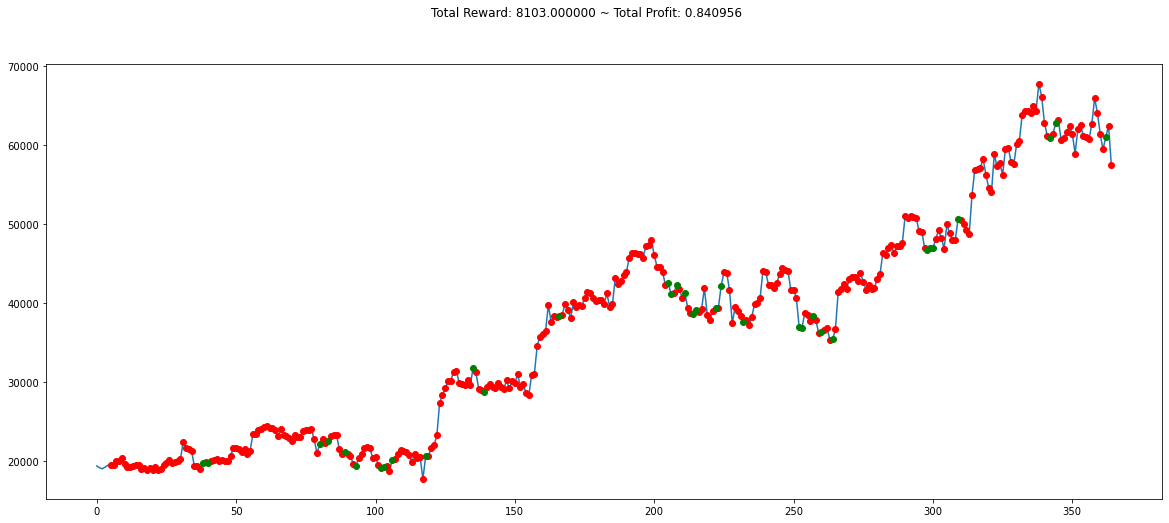

In [53]:
env = gym.make('stocks-v0', df=df1, frame_bound=(5,365), window_size=5)
obs = env.reset()

models_dir = "models/A2C"
model_path = f"{models_dir}/3200000.zip"
model = A2C.load(model_path, env=env)

while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(20,8))
plt.cla()
env.render_all()
plt.show()

PPO Model Training

In [37]:
from stable_baselines3 import PPO


model_dir = "models/PPO"
log_dir = "logs"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)


model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_dir)

TIMESTAMPS = 100000

for i in range(1,30):
    model.learn(total_timesteps=TIMESTAMPS, reset_num_timesteps=False, tb_log_name="PPO")
    model.save(f"{model_dir}/{TIMESTAMPS*i}")
    
env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs\PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 37       |
| time/              |          |
|    fps             | 1656     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19          |
|    ep_rew_mean          | 196         |
| time/                   |             |
|    fps                  | 1157        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012956612 |
|    clip_fraction        | 0.00898     |
|    clip_range           | 0.2         

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19          |
|    ep_rew_mean          | 313         |
| time/                   |             |
|    fps                  | 908         |
|    iterations           | 11          |
|    time_elapsed         | 24          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.011539516 |
|    clip_fraction        | 0.039       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.635      |
|    explained_variance   | 0.00625     |
|    learning_rate        | 0.0003      |
|    loss                 | 4.94e+05    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00499    |
|    value_loss           | 9.66e+05    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 19    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.19e+03     |
| time/                   |              |
|    fps                  | 885          |
|    iterations           | 21           |
|    time_elapsed         | 48           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0002009848 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.295       |
|    explained_variance   | 0.000412     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.57e+05     |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.000626    |
|    value_loss           | 7.23e+05     |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.38e+03      |
| time/                   |               |
|    fps                  | 870           |
|    iterations           | 31            |
|    time_elapsed         | 72            |
|    total_timesteps      | 63488         |
| train/                  |               |
|    approx_kl            | 0.00010992889 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.116        |
|    explained_variance   | 2.42e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 2.45e+05      |
|    n_updates            | 300           |
|    policy_gradient_loss | -0.000373     |
|    value_loss           | 4.62e+05      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.43e+03     |
| time/                   |              |
|    fps                  | 849          |
|    iterations           | 40           |
|    time_elapsed         | 96           |
|    total_timesteps      | 81920        |
| train/                  |              |
|    approx_kl            | 0.0001524052 |
|    clip_fraction        | 0.00425      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0468      |
|    explained_variance   | 5.54e-06     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.57e+05     |
|    n_updates            | 390          |
|    policy_gradient_loss | -0.000949    |
|    value_loss           | 3.3e+05      |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.42e+03      |
| time/                   |               |
|    fps                  | 848           |
|    iterations           | 49            |
|    time_elapsed         | 118           |
|    total_timesteps      | 100352        |
| train/                  |               |
|    approx_kl            | 0.00013025312 |
|    clip_fraction        | 0.000537      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0491       |
|    explained_variance   | 1.25e-06      |
|    learning_rate        | 0.0003        |
|    loss                 | 1.5e+05       |
|    n_updates            | 480           |
|    policy_gradient_loss | -7.57e-05     |
|    value_loss           | 3.72e+05      |
-------------------------------------------
Logging to logs\PPO_0
---------------------------------
| rollout/          

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.43e+03      |
| time/                   |               |
|    fps                  | 855           |
|    iterations           | 10            |
|    time_elapsed         | 23            |
|    total_timesteps      | 120832        |
| train/                  |               |
|    approx_kl            | 8.7102904e-05 |
|    clip_fraction        | 0.00103       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0231       |
|    explained_variance   | 3.58e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 1.1e+05       |
|    n_updates            | 580           |
|    policy_gradient_loss | -0.000413     |
|    value_loss           | 3.11e+05      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.47e+03      |
| time/                   |               |
|    fps                  | 849           |
|    iterations           | 20            |
|    time_elapsed         | 48            |
|    total_timesteps      | 141312        |
| train/                  |               |
|    approx_kl            | 5.3601107e-05 |
|    clip_fraction        | 0.00103       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0241       |
|    explained_variance   | 1.79e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 1.16e+05      |
|    n_updates            | 680           |
|    policy_gradient_loss | -0.000247     |
|    value_loss           | 2.7e+05       |
-------------------------------------------
-------------------------------------------
| rollout/                |     

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.42e+03      |
| time/                   |               |
|    fps                  | 850           |
|    iterations           | 29            |
|    time_elapsed         | 69            |
|    total_timesteps      | 159744        |
| train/                  |               |
|    approx_kl            | 0.00010213436 |
|    clip_fraction        | 0.000781      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0192       |
|    explained_variance   | 1.79e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 1.26e+05      |
|    n_updates            | 770           |
|    policy_gradient_loss | -0.000466     |
|    value_loss           | 2.62e+05      |
-------------------------------------------
------------------------------------------
| rollout/                |      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.42e+03     |
| time/                   |              |
|    fps                  | 858          |
|    iterations           | 38           |
|    time_elapsed         | 90           |
|    total_timesteps      | 178176       |
| train/                  |              |
|    approx_kl            | 3.340203e-05 |
|    clip_fraction        | 0.00122      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0202      |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.24e+05     |
|    n_updates            | 860          |
|    policy_gradient_loss | -0.000308    |
|    value_loss           | 2.35e+05     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.46e+03     |
| time/                   |              |
|    fps                  | 862          |
|    iterations           | 47           |
|    time_elapsed         | 111          |
|    total_timesteps      | 196608       |
| train/                  |              |
|    approx_kl            | 9.647192e-06 |
|    clip_fraction        | 4.88e-05     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0105      |
|    explained_variance   | 2.38e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 8.07e+04     |
|    n_updates            | 950          |
|    policy_gradient_loss | -0.00014     |
|    value_loss           | 2.32e+05     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.46e+03     |
| time/                   |              |
|    fps                  | 894          |
|    iterations           | 8            |
|    time_elapsed         | 18           |
|    total_timesteps      | 217088       |
| train/                  |              |
|    approx_kl            | 3.525871e-05 |
|    clip_fraction        | 0.000293     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.0146      |
|    explained_variance   | 0.0344       |
|    learning_rate        | 0.0003       |
|    loss                 | 1.27e+05     |
|    n_updates            | 1050         |
|    policy_gradient_loss | -2.76e-05    |
|    value_loss           | 2.26e+05     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 850           |
|    iterations           | 17            |
|    time_elapsed         | 40            |
|    total_timesteps      | 235520        |
| train/                  |               |
|    approx_kl            | 5.5151002e-05 |
|    clip_fraction        | 0.000488      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00609      |
|    explained_variance   | 0.0516        |
|    learning_rate        | 0.0003        |
|    loss                 | 1.07e+05      |
|    n_updates            | 1140          |
|    policy_gradient_loss | 7.24e-05      |
|    value_loss           | 1.99e+05      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.46e+03  |
| time/                   |           |
|    fps                  | 866       |
|    iterations           | 27        |
|    time_elapsed         | 63        |
|    total_timesteps      | 256000    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00488  |
|    explained_variance   | 0.0708    |
|    learning_rate        | 0.0003    |
|    loss                 | 7.78e+04  |
|    n_updates            | 1240      |
|    policy_gradient_loss | -6.29e-06 |
|    value_loss           | 1.93e+05  |
---------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.4

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 874           |
|    iterations           | 37            |
|    time_elapsed         | 86            |
|    total_timesteps      | 276480        |
| train/                  |               |
|    approx_kl            | 5.4486474e-05 |
|    clip_fraction        | 0.00117       |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00366      |
|    explained_variance   | 0.0832        |
|    learning_rate        | 0.0003        |
|    loss                 | 1.02e+05      |
|    n_updates            | 1340          |
|    policy_gradient_loss | -0.000251     |
|    value_loss           | 1.94e+05      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 879           |
|    iterations           | 47            |
|    time_elapsed         | 109           |
|    total_timesteps      | 296960        |
| train/                  |               |
|    approx_kl            | 1.8207851e-05 |
|    clip_fraction        | 0.000293      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00411      |
|    explained_variance   | 0.112         |
|    learning_rate        | 0.0003        |
|    loss                 | 8e+04         |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000134     |
|    value_loss           | 1.83e+05      |
-------------------------------------------
--------------------------------------
| rollout/                |          

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 940           |
|    iterations           | 8             |
|    time_elapsed         | 17            |
|    total_timesteps      | 317440        |
| train/                  |               |
|    approx_kl            | 3.2869866e-07 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0041       |
|    explained_variance   | 0.13          |
|    learning_rate        | 0.0003        |
|    loss                 | 7.87e+04      |
|    n_updates            | 1540          |
|    policy_gradient_loss | 1.5e-05       |
|    value_loss           | 1.81e+05      |
-------------------------------------------
--------------------------------------
| rollout/                |          

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 916           |
|    iterations           | 18            |
|    time_elapsed         | 40            |
|    total_timesteps      | 337920        |
| train/                  |               |
|    approx_kl            | 1.4968769e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00377      |
|    explained_variance   | 0.142         |
|    learning_rate        | 0.0003        |
|    loss                 | 7.54e+04      |
|    n_updates            | 1640          |
|    policy_gradient_loss | -1.54e-05     |
|    value_loss           | 1.8e+05       |
-------------------------------------------
---------------------------------------
| rollout/                |         

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.45e+03  |
| time/                   |           |
|    fps                  | 909       |
|    iterations           | 28        |
|    time_elapsed         | 63        |
|    total_timesteps      | 358400    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00306  |
|    explained_variance   | 0.156     |
|    learning_rate        | 0.0003    |
|    loss                 | 1.09e+05  |
|    n_updates            | 1740      |
|    policy_gradient_loss | -1.24e-06 |
|    value_loss           | 1.75e+05  |
---------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.47e+03  |
| time/                   |           |
|    fps                  | 905       |
|    iterations           | 38        |
|    time_elapsed         | 85        |
|    total_timesteps      | 378880    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00341  |
|    explained_variance   | 0.177     |
|    learning_rate        | 0.0003    |
|    loss                 | 8.62e+04  |
|    n_updates            | 1840      |
|    policy_gradient_loss | -4.91e-07 |
|    value_loss           | 1.71e+05  |
---------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.45e+03  |
| time/                   |           |
|    fps                  | 903       |
|    iterations           | 48        |
|    time_elapsed         | 108       |
|    total_timesteps      | 399360    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00354  |
|    explained_variance   | 0.197     |
|    learning_rate        | 0.0003    |
|    loss                 | 8.35e+04  |
|    n_updates            | 1940      |
|    policy_gradient_loss | -3.11e-07 |
|    value_loss           | 1.68e+05  |
---------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.45e+03  |
| time/                   |           |
|    fps                  | 947       |
|    iterations           | 9         |
|    time_elapsed         | 19        |
|    total_timesteps      | 419840    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00265  |
|    explained_variance   | 0.207     |
|    learning_rate        | 0.0003    |
|    loss                 | 6.49e+04  |
|    n_updates            | 2040      |
|    policy_gradient_loss | -1.74e-07 |
|    value_loss           | 1.67e+05  |
---------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.4

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.45e+03     |
| time/                   |              |
|    fps                  | 919          |
|    iterations           | 19           |
|    time_elapsed         | 42           |
|    total_timesteps      | 440320       |
| train/                  |              |
|    approx_kl            | 9.609736e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.00289     |
|    explained_variance   | 0.212        |
|    learning_rate        | 0.0003       |
|    loss                 | 9.14e+04     |
|    n_updates            | 2140         |
|    policy_gradient_loss | -9.32e-05    |
|    value_loss           | 1.68e+05     |
------------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean 

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.46e+03      |
| time/                   |               |
|    fps                  | 905           |
|    iterations           | 29            |
|    time_elapsed         | 65            |
|    total_timesteps      | 460800        |
| train/                  |               |
|    approx_kl            | 3.9623148e-05 |
|    clip_fraction        | 9.77e-05      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00532      |
|    explained_variance   | 0.222         |
|    learning_rate        | 0.0003        |
|    loss                 | 9.36e+04      |
|    n_updates            | 2240          |
|    policy_gradient_loss | -4.36e-05     |
|    value_loss           | 1.66e+05      |
-------------------------------------------
-------------------------------------------
| rollout/                |     

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.44e+03     |
| time/                   |              |
|    fps                  | 903          |
|    iterations           | 39           |
|    time_elapsed         | 88           |
|    total_timesteps      | 481280       |
| train/                  |              |
|    approx_kl            | 5.236853e-05 |
|    clip_fraction        | 0.000928     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.00652     |
|    explained_variance   | 0.232        |
|    learning_rate        | 0.0003       |
|    loss                 | 9.08e+04     |
|    n_updates            | 2340         |
|    policy_gradient_loss | -0.000172    |
|    value_loss           | 1.72e+05     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 890           |
|    iterations           | 49            |
|    time_elapsed         | 112           |
|    total_timesteps      | 501760        |
| train/                  |               |
|    approx_kl            | 5.9750164e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00381      |
|    explained_variance   | 0.248         |
|    learning_rate        | 0.0003        |
|    loss                 | 8.62e+04      |
|    n_updates            | 2440          |
|    policy_gradient_loss | -5.58e-08     |
|    value_loss           | 1.61e+05      |
-------------------------------------------
Logging to logs\PPO_0
---------------------------------
| rollout/          

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.44e+03  |
| time/                   |           |
|    fps                  | 874       |
|    iterations           | 10        |
|    time_elapsed         | 23        |
|    total_timesteps      | 522240    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00317  |
|    explained_variance   | 0.255     |
|    learning_rate        | 0.0003    |
|    loss                 | 8.94e+04  |
|    n_updates            | 2540      |
|    policy_gradient_loss | -3.83e-07 |
|    value_loss           | 1.59e+05  |
---------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 19           |
|    ep_rew_mean          | 1.44e+03     |
| time/                   |              |
|    fps                  | 850          |
|    iterations           | 20           |
|    time_elapsed         | 48           |
|    total_timesteps      | 542720       |
| train/                  |              |
|    approx_kl            | 1.538216e-05 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.00245     |
|    explained_variance   | 0.255        |
|    learning_rate        | 0.0003       |
|    loss                 | 7.14e+04     |
|    n_updates            | 2640         |
|    policy_gradient_loss | -0.000105    |
|    value_loss           | 1.59e+05     |
------------------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_l

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.45e+03  |
| time/                   |           |
|    fps                  | 849       |
|    iterations           | 30        |
|    time_elapsed         | 72        |
|    total_timesteps      | 563200    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00211  |
|    explained_variance   | 0.262     |
|    learning_rate        | 0.0003    |
|    loss                 | 7.15e+04  |
|    n_updates            | 2740      |
|    policy_gradient_loss | -5.33e-07 |
|    value_loss           | 1.57e+05  |
---------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.45e+03  |


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.45e+03  |
| time/                   |           |
|    fps                  | 850       |
|    iterations           | 40        |
|    time_elapsed         | 96        |
|    total_timesteps      | 583680    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.0022   |
|    explained_variance   | 0.284     |
|    learning_rate        | 0.0003    |
|    loss                 | 7.52e+04  |
|    n_updates            | 2840      |
|    policy_gradient_loss | -3.61e-07 |
|    value_loss           | 1.51e+05  |
---------------------------------------
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 19       |
|    ep_rew_mean          | 1.45e+03 |
| ti

Logging to logs\PPO_0
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 1.45e+03 |
| time/              |          |
|    fps             | 1610     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 604160   |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 19        |
|    ep_rew_mean          | 1.44e+03  |
| time/                   |           |
|    fps                  | 1132      |
|    iterations           | 2         |
|    time_elapsed         | 3         |
|    total_timesteps      | 606208    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.00268  |
|    explained_variance   | 0.294     |
|    learning_rate        | 0.0003    

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 1.45e+03      |
| time/                   |               |
|    fps                  | 919           |
|    iterations           | 11            |
|    time_elapsed         | 24            |
|    total_timesteps      | 624640        |
| train/                  |               |
|    approx_kl            | 1.1718948e-05 |
|    clip_fraction        | 0.000195      |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00284      |
|    explained_variance   | 0.299         |
|    learning_rate        | 0.0003        |
|    loss                 | 7.84e+04      |
|    n_updates            | 3040          |
|    policy_gradient_loss | -0.000172     |
|    value_loss           | 1.51e+05      |
-------------------------------------------
---------------------------------------
| rollout/                |         

KeyboardInterrupt: 

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
info {'total_reward': 38331.0, 'total_profit': 1.627111012012538, 'position': 1}


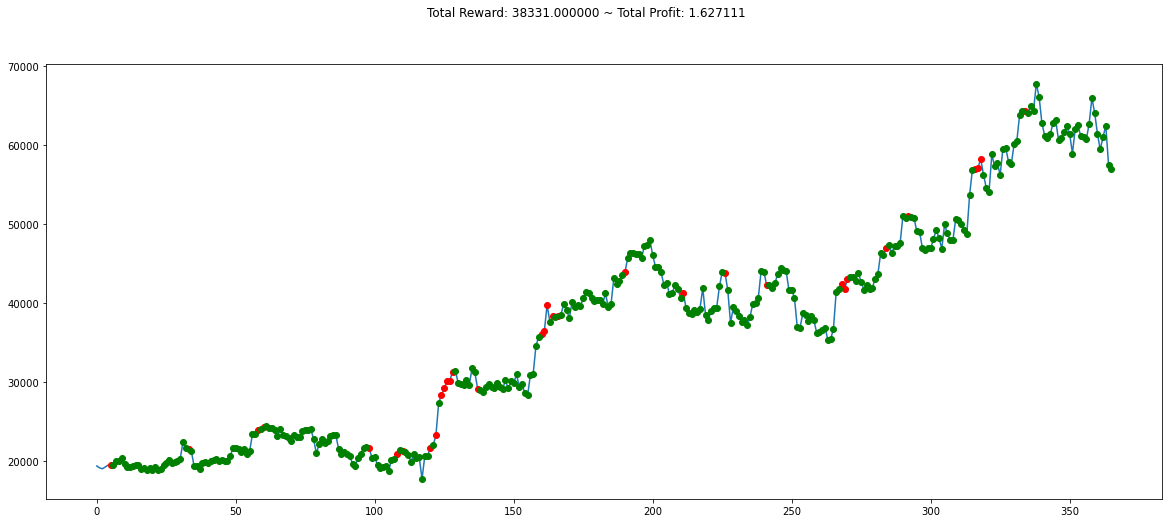

In [54]:
env = gym.make('stocks-v0', df=df1, frame_bound=(5,366), window_size=5)
obs = env.reset()

models_dir = "models/PPO"
model_path = f"{models_dir}/500000.zip"
model = PPO.load(model_path, env=env)

while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(20,8))
plt.cla()
env.render_all()
plt.show()